## About the dataset (Airbnb's  data for Los Angeles City)

**id**: Airbnb's unique identifier for the listing.<br>
**scrape_id**: Inside Airbnb "Scrape" this was part of.<br>
**last_scraped**: UTC. The date and time this listing was "scraped".<br>
**name**: Name of the listing.<br>
**description**: Detailed description of the listing.<br>
**neighborhood_overview**: Host's description of the neighbourhood.<br>
**picture_url**: URL to the Airbnb hosted regular sized image for the listing.<br>
**host_id**: Airbnb's unique identifier for the host/user.<br>
**host_url**: The Airbnb page for the host.<br>
**host_name**: Name of the host. Usually just the first name(s).<br>
**host_since**: The date the host/user was created. For hosts that are Airbnb guests this could be the date they registered as a guest.<br>
**host_location**: The host's self reported location.<br>
**host_acceptance_rate**: That rate at which a host accepts booking requests.<br>
**host_listings_count**: The number of listings the host has (per Airbnb calculations).<br>
**host_total_listings_count**: The number of listings the host has (per Airbnb calculations).<br>
**neighbourhood_cleansed**: The neighbourhood as geocoded using the latitude and longitude against neighborhoods as defined by open or public digital shapefiles.<br>
**neighbourhood_group_cleansed**: The neighbourhood group as geocoded using the latitude and longitude against neighborhoods as defined by open or public digital shapefiles.<br>
**latitude**: Uses the World Geodetic System (WGS84) projection for latitude and longitude.<br>
**longitude**: Uses the World Geodetic System (WGS84) projection for latitude and longitude.<br>
**property_type**: Self selected property type. Hotels and Bed and Breakfasts are described as such by their hosts in this field.<br>
**room_type**: "[Entire home/apt|Private room|Shared room|Hotel].<br>
**accommodates**: The maximum capacity of the listing.<br>
**bathrooms**: The number of bathrooms in the listing.<br>
**bathrooms_text**: "The number of bathrooms in the listing. On the Airbnb web-site, the bathrooms field has evolved from a number to a textual description. For older scrapes, bathrooms is used.".<br>
**bedrooms**: The number of bedrooms.<br>
**beds**: The number of bed(s).<br>
**price**: daily price in local currency.<br>
**minimum_nights**: minimum number of night stay for the listing (calendar rules may be different).<br>
**minimum_minimum_nights**: the smallest minimum_night value from the calender (looking 365 nights in the future).<br>
**maximum_minimum_nights**: the largest minimum_night value from the calender (looking 365 nights in the future).<br>
**maximum_maximum_nights**: the largest maximum_night value from the calender (looking 365 nights in the future).<br>
**minimum_nights_avg_ntm**: the average minimum_night value from the calender (looking 365 nights in the future).<br>
**maximum_nights_avg_ntm**: the average maximum_night value from the calender (looking 365 nights in the future).<br>
**has_availability**: [t=true; f=false].<br>
**availability_30**: avaliability_x. The availability of the listing x days in the future as determined by the calendar. Note a listing may not be available because it has been booked by a guest or blocked by the host.<br>
**availability_60**: avaliability_x. The availability of the listing x days in the future as determined by the calendar. Note a listing may not be available because it has been booked by a guest or blocked by the host.<br>
**availability_90**: avaliability_x. The availability of the listing x days in the future as determined by the calendar. Note a listing may not be available because it has been booked by a guest or blocked by the host.<br>
**availability_365**: avaliability_x. The availability of the listing x days in the future as determined by the calendar. Note a listing may not be available because it has been booked by a guest or blocked by the host.<br>
**number_of_reviews**: The number of reviews the listing has.<br>
**number_of_reviews_ltm**: The number of reviews the listing has (in the last 12 months).<br>
**number_of_reviews_l30d**: The number of reviews the listing has (in the last 30 days).<br>
**first_review**: The date of the first/oldest review.<br>
**last_review**: The date of the last/newest review.<br>
**license**: The licence/permit/registration number.<br>
**instant_bookable**: [t=true; f=false]. Whether the guest can automatically book the listing without the host requiring to accept their booking request. An indicator of a commercial listing.<br>
**calculated_host_listings_count**: The number of listings the host has in the current scrape, in the city/region geography.<br>
**calculated_host_listings_count_entire_homes**: The number of Entire home/apt listings the host has in the current scrape, in the city/region geography.<br>
**calculated_host_listings_count_private_rooms**: The number of Private room listings the host has in the current scrape, in the city/region geography.<br>
**calculated_host_listings_count_shared_rooms**: The number of Shared room listings the host has in the current scrape, in the city/region geography.<br>
**reviews_per_month**: The number of reviews the listing has over the lifetime of the listing.<br>

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import 'stats'
from scipy import stats

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


# import function to perform linear regression
from sklearn.linear_model import LinearRegression

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

from sklearn.feature_selection import RFE

# import SGDRegressor from sklearn to perform linear regression with stochastic gradient descent
from sklearn.linear_model import SGDRegressor

# import function for ridge regression
from sklearn.linear_model import Ridge

# import function for lasso regression
from sklearn.linear_model import Lasso

# import function for elastic net regression
from sklearn.linear_model import ElasticNet

# import function to perform GridSearchCV
from sklearn.model_selection import GridSearchCV

# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score
from scipy.special import boxcox, inv_boxcox
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel

<a id="prep"></a>
#  Data Preparation

<a id="read"></a>
##  Read the Data

## Los Angeles

In [2]:
df_LA=pd.read_csv("listings_LA.csv")
df_LA.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,109,https://www.airbnb.com/rooms/109,20211102175612,2021-11-03,Amazing bright elegant condo park front *UPGRA...,"*** Unit upgraded with new bamboo flooring, br...",NaN,https://a0.muscache.com/pictures/4321499/1da98...,521,https://www.airbnb.com/users/show/521,Paolo,2008-06-27,"San Francisco, California, United States","Paolo Privitera, CEO Evensi\n\nPaolo, MIT MBA ...",NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/e704a...,https://a0.muscache.com/im/pictures/user/e704a...,Culver City,1.000000,1.000000,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,NaN,Culver City,Other Cities,33.983010,-118.386070,Entire condominium (condo),Entire home/apt,6,NaN,2 baths,2.000000,3.000000,"[""Shampoo"", ""Free parking on premises"", ""Cable...",$115.00,30,730,30.000000,30.000000,730.000000,730.000000,30.000000,730.000000,NaN,t,0,0,0,193,2021-11-03,2,0,0,2011-08-15,2016-05-15,4.000000,5.000000,5.000000,3.000000,4.000000,5.000000,4.000000,NaN,f,1,1,0,0,0.020000
1,2708,https://www.airbnb.com/rooms/2708,20211102175612,2021-11-03,Runyon Canyon | Beau Furn Mirror Mini-Suite Fi...,"Run Runyon Canyon, Our Gym & Sauna Open <br />...","Walk and run to Runyon Canyon, it is open!<br ...",https://a0.muscache.com/pictures/miso/Hosting-...,3008,https://www.airbnb.com/users/show/3008,Chas.,2008-09-16,"Los Angeles, California, United States",Writer.\r\nLiterary Manager.\r\nPhotographer.\...,within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/d17cf...,https://a0.muscache.com/im/pictures/user/d17cf...,Hollywood,2.000000,2.000000,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,"Los Angeles, California, United States",Hollywood,City of Los Angeles,34.096250,-118.346050,Private room in rental unit,Private room,1,NaN,1 shared bath,1.000000,1.000000,"[""Coffee maker"", ""Shampoo"", ""Free parking on p...",$89.00,30,366,30.000000,30.000000,1125.000000,1125.000000,30.000000,1125.000000,NaN,t,6,7,25,300,2021-11-03,33,6,1,2017-12-29,2021-11-01,4.820000,4.790000,4.910000,5.000000,4.970000,5.000000,4.850000,NaN,t,2,0,2,0,0.700000
2,2732,https://www.airbnb.com/rooms/2732,20211102175612,2021-11-03,Zen Life at the Beach,An oasis of tranquility awaits you.<br /><br /...,"This is the best part of Santa Monica. Quiet, ...",https://a0.muscache.com/pictures/1082974/0f74c...,3041,https://www.airbnb.com/users/show/3041,Yoga Priestess,2008-09-17,"Santa Monica, California, United States",I have been teaching yoga and meditation for 3...,within an hour,100%,33%,t,https://a0.muscache.com/im/users/3041/profile_...,https://a0.muscache.com/im/users/3041/profile_...,Santa Monica,2.000000,2.000000,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Sa

## Check the dimensions of both datasets

In [3]:
df_LA.shape

(32877, 74)

**Interpretation:** The data has 37713 observations and 74 variables.

In [4]:
df_LA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32877 entries, 0 to 32876
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            32877 non-null  int64  
 1   listing_url                                   32877 non-null  object 
 2   scrape_id                                     32877 non-null  int64  
 3   last_scraped                                  32877 non-null  object 
 4   name                                          32875 non-null  object 
 5   description                                   31769 non-null  object 
 6   neighborhood_overview                         19955 non-null  object 
 7   picture_url                                   32877 non-null  object 
 8   host_id                                       32877 non-null  int64  
 9   host_url                                      32877 non-null 

In [5]:
df_LA.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
description                                      object
neighborhood_overview                            object
picture_url                                      object
host_id                                           int64
host_url                                         object
host_name                                        object
host_since                                       object
host_location                                    object
host_about                                       object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                             object
host_is_superhost                               

**Interpretation** <br> Datatypes for Price,host_response_rate ,host_acceptance_rate are initially available in object datatype.
Since price is our target variable,it is converted into float.Also for further analysis,other two variables are also changed in to float datatype

In [6]:
df_LA.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,32877.000000,32877.000000,32877.000000,32851.000000,32851.000000,32877.000000,32877.000000,32877.000000,0.000000,29109.000000,30843.000000,32877.000000,32877.000000,32873.000000,32873.000000,32873.000000,32873.000000,32873.000000,32873.000000,0.000000,32877.000000,32877.000000,32877.000000,32877.000000,32877.000000,32877.000000,32877.000000,24958.000000,24621.000000,24622.000000,24611.000000,24620.000000,24608.000000,24606.000000,32877.000000,32877.000000,32877.000000,32877.000000,24958.000000
mean,32177005.654013,20211102175615.781250,122088264.427198,41.401753,41.401753,34.049468,-118.318362,3.648599,NaN,1.687004,2.062640,20.216291,655.394075,20.466644,28.845770,262125.034101,523440.308308,28.115752,514361.984407,NaN,10.630714,25.889011,44.173647,174.886151,34.293153,7.371749,0.711744,4.669772,4.771330,4.696678,4.843819,4.829116,4.798580,4.678347,17.021596,13.930225,2.795024,0.244882,2.399320
std,16308872.969021,3.781308,125510429.646177,221.140853,221.140853,0.134409,0.167972,2.562002,NaN,1.134238,1.572461,34.105992,501.096583,37.935930,80.916009,23687553.451548,33497220.799985,78.602255,32943878.281248,NaN,11.840544,23.606292,35.019742,140.832795,69.248578,16.818226,1.679529,0.700772,0.465418,0.505626,0.408954,0.434856,0.403270,0.491156,55.542988,53.160870,18.007863,2.130631,5.853897
min,109.000000,20211102175612.000000,521.000000,0.000000,0.000000,33.338480,-118.934830,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,18977532.000000,20211102175612.000000,17740218.000000,1.000000,1.000000,33.996660,-118.423020,2.000000,NaN,1.000000,1.000000,2.000000,90.000000,2.000000,2.000000,365.000000,365.000000,2.000000,365.000000,NaN,0.000000,0.000000,0.000000,30.000000,1.000000,0.000000,0.000000,4.670000,4.750000,4.630000,4.860000,4.840000,4.760000,4.600000,1.000000,0.000000,0.000000,0.000000,0.250000
50%,35063528.000000,20211102175612.000000,72202842.000000,2.000000,2.000000,34.060320,-118.345540,3.000000,NaN,1.000000,2.000000,30.000000,1125.000000,30.000000,30.000000,1125.000000,1125.000000,30.000000,1125.000000,NaN,5.000000,23.000000,47.000000,160.000000,6.000000,1.000000,0.000000,4.870000,4.920000,4.860000,4.970000,4.970000,4.920000,4.810000,2.000000,1.000000,0.000000,0.000000,0.890000
75%,47499397.000000,20211102175612.000000,198255538.000000,7.000000,7.000000,34.104855,-118.250850,4.000000,NaN,2.000000,3.000000,30.000000,1125.000000,30.000000,30.000000,1125.000000,1125.000000,30.000000,1125.000000,NaN,23.000000,51.000000,80.000000,328.000000,34.000000,6.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.960000,7.000000,3.000000,1.000000,0.000000,2.650000
max,53121319.000000,20211102175612.000000,429820461.000000,2232.000000,2232.000000,34.811130,-117.647890,16.000000,NaN,50.000000,50.000000,1125.000000,3650.000000,1125.000000,1125.000000,2147483647.000000,2147483647.000000,1125.000000,2147483647.000000,NaN,30.000000,60.000000,90.000000,365.000000,998.000000,760.000000,68.000000,5.000000,5.000000,5.000000,5

In [7]:
df_LA.describe(include=np.object)

,listing_url,last_scraped,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
count,32877,32877,32875,31769,19955,32877,32877,32851,32851,32776,19408,22218,22218,22612,32851,32851,32851,26335,32877,32851,32851,19956,32877,32877,32877,32877,32815,32877,32877,32877,32877,24958,24958,8180,32877
unique,32877,3,31595,29448,16781,31386,18456,7097,3959,1048,10298,4,70,101,2,18308,18308,587,489,2,2,297,265,3,106,4,49,30020,1289,2,3,2939,2120,5075,2
top,https://www.airbnb.com/rooms/12428036,2021-11-03,Comfortable place to call home | 2 BR in Los A...,<b>License number</b><br />Exempt - This listi...,The neighborhood of Sherman Oaks is a very aff...,https://a0.muscache.com/pictures/18ab9b05-c4a9...,https://www.airbnb.com/users/show/359066913,Raquel,2020-07-28,"Los Angeles, California, United States",Why take a chance picking & choosing between s...,within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/72eaa...,https://a0.muscache.com/im/pictures/user/72eaa...,Venice,"['email', 'phone']",t,t,"Los Angeles, California, United States",Venice,City of Los Angeles,Entire rental unit,Entire home/apt,1 bath,"[""Coffee maker"", ""Shampoo"", ""Dishes and silver...",$100.00,t,2021-11-03,2021-10-03,2021-10-31,Exempt - This listing is a transient occupancy...,f
freq,1,27979,64,82,198,36,362,367,378,13854,342,14976,15541,6146,22888,362,362,1345,4109,32659,27221,10323,1565,17967,8177,22341,14325,171,720,31914,27979,77,685,903,21258


In [8]:
## Remove special symbol from Price column,host response rate & host acceptance rate column

df_LA['price']=df_LA['price'].str.replace('$','').str.replace(',','')

df_LA['host_response_rate']=df_LA['host_response_rate'].str.replace('%','').str.replace(',','')

df_LA['host_acceptance_rate']=df_LA['host_acceptance_rate'].str.replace('%','').str.replace(',','')


In [9]:
for i in df_LA[['price','host_response_rate','host_acceptance_rate']] :
     df_LA[i]=df_LA[i].astype('float')

In [10]:
## Shifting the Price column to last position

last_col=df_LA.pop('price')
df_LA.insert(loc=len(df_LA.columns),column='price',value=last_col)

In [11]:
df_LA['price'].describe()

count   32877.000000
mean      260.460383
std       722.505994
min         0.000000
25%        79.000000
50%       125.000000
75%       225.000000
max     25000.000000
Name: price, dtype: float64

In [12]:
# Remove the zero value from the price column as it will affect our analysis and also logically not correct

df_LA.drop(df_LA[df_LA['price']==0].index,inplace=True)

In [13]:
df_LA.shape

(32861, 74)

## Data Cleaning

### Dropping Irrelevant columns for analysis

In [17]:
unique_val=df_LA.nunique()
d_types=df_LA.dtypes
data = pd.concat([unique_val, d_types], axis = 1, keys = ['unique_val', 'd_types'])    
data.sort_values(by='unique_val',ascending=False)

,unique_val,d_types
id,31115,int64
listing_url,31115,object
name,29883,object
picture_url,29661,object
amenities,28365,object
description,27889,object
longitude,22431,float64
latitude,19827,float64
host_id,17662,int64
host_url,17662,object


In [18]:
df_LA=df_LA.drop(['id','listing_url','picture_url','name','description','amenities','host_url','host_id','host_thumbnail_url',
                  'host_picture_url','neighborhood_overview','latitude','host_about','longitude','host_name','host_since',
                  'first_review','last_review','host_location','host_verifications','host_neighbourhood','neighbourhood_cleansed',
                  'neighbourhood','property_type','bathrooms_text','host_total_listings_count','calendar_last_scraped',
                  'last_scraped','host_has_profile_pic','host_identity_verified','scrape_id'],axis=1)

In [19]:
df_LA.shape

(31115, 43)

In [20]:
unique_val=df_LA.nunique()
d_types=df_LA.dtypes
data = pd.concat([unique_val, d_types], axis = 1, keys = ['unique_val', 'd_types'])    
data.sort_values(by='unique_val',ascending=False)

,unique_val,d_types
license,4517,object
reviews_per_month,1484,float64
price,646,float64
number_of_reviews,514,int64
maximum_nights_avg_ntm,465,float64
minimum_nights_avg_ntm,397,float64
availability_365,366,int64
maximum_nights,256,int64
maximum_maximum_nights,231,float64
minimum_maximum_nights,230,float64


### Missing Value Treatment

In [21]:
Total = df_LA.isnull().sum().sort_values(ascending=False)          
Total_n=Total[Total!=0]

# calculate percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df_LA.isnull().sum()*100/df_LA.isnull().count()).sort_values(ascending=False)  
Percent_n=Percent[Percent!=0]

# concat the 'Total' and 'Percent' columns using 'concat' function
# pass a list of column names in parameter 'keys' 
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total_n, Percent_n], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
calendar_updated,31115,100.000000
bathrooms,31115,100.000000
license,23741,76.300820
host_response_time,10135,32.572714
host_response_rate,10135,32.572714
host_acceptance_rate,9741,31.306444
review_scores_value,7466,23.994858
review_scores_location,7464,23.988430
review_scores_checkin,7461,23.978788
review_scores_communication,7454,23.956291


**Interpretation :** bathrooms,calendar_updated,license columns are empty columns which are removed from the datasets

In [22]:
# Removing columns with no values present

df_LA=df_LA.drop(['calendar_updated','bathrooms','license'],axis=1)

In [23]:
df_LA.shape

(31115, 40)

In [24]:
Total = df_LA.isnull().sum().sort_values(ascending=False)          
Total_n=Total[Total!=0]

d_types=df_LA.dtypes

# calculate percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df_LA.isnull().sum()*100/df_LA.isnull().count()).sort_values(ascending=False)  
Percent_n=Percent[Percent!=0]

# concat the 'Total' and 'Percent' columns using 'concat' function
# pass a list of column names in parameter 'keys' 
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total_n, Percent_n], axis = 1, keys = ['Total', '% of Missing Values'])    
missing_data['Datatypes']=d_types
missing_data

,Total,% of Missing Values,Datatypes
host_response_time,10135,32.572714,object
host_response_rate,10135,32.572714,float64
host_acceptance_rate,9741,31.306444,float64
review_scores_value,7466,23.994858,float64
review_scores_location,7464,23.988430,float64
review_scores_checkin,7461,23.978788,float64
review_scores_communication,7454,23.956291,float64
review_scores_accuracy,7453,23.953077,float64
review_scores_cleanliness,7452,23.949863,float64
reviews_per_month,7164,23.024265,float64


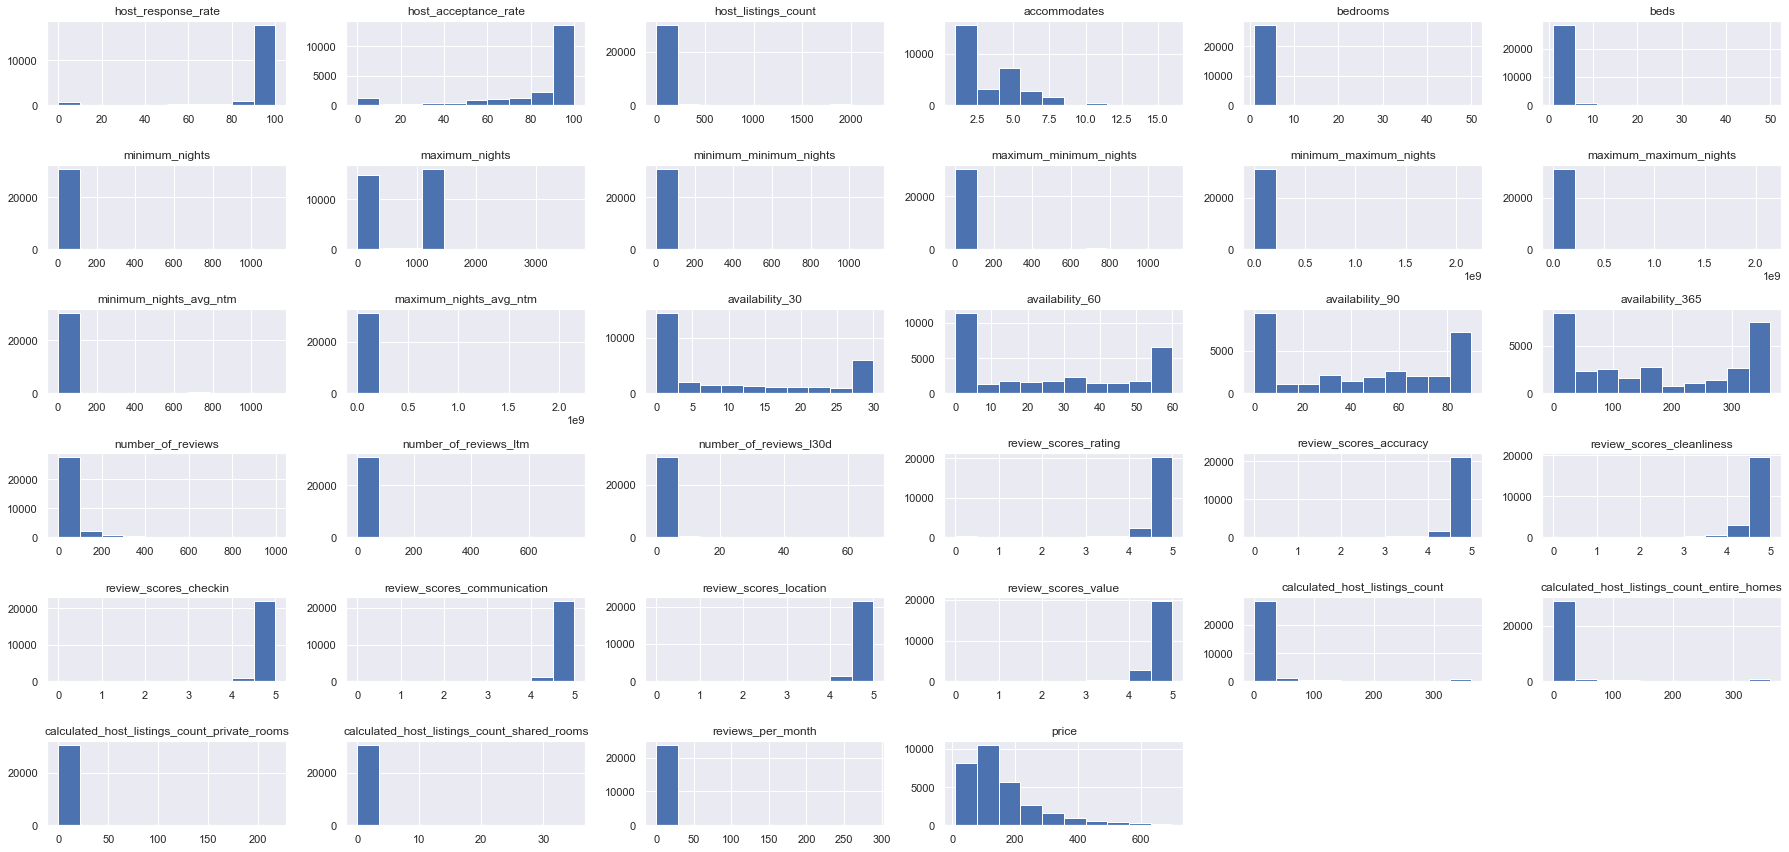

In [25]:
sns. set(font_scale = 1) 
df_LA.select_dtypes(exclude = ['object']).hist(figsize = (25,12))
plt.tight_layout()
plt.show()

In [26]:
## Replacing missing value columns with respective median values for numerical and with mode for categorical

df_LA.fillna(df_LA['host_response_time'].mode() , inplace = True)
df_LA.fillna(df_LA['host_response_rate'].median() , inplace = True)
df_LA.fillna(df_LA['host_acceptance_rate'].median() , inplace = True)
df_LA.fillna(df_LA['review_scores_location'].median() , inplace = True)
df_LA.fillna(df_LA['review_scores_value'].median() , inplace = True)
df_LA.fillna(df_LA['review_scores_checkin'].median() , inplace = True)
df_LA.fillna(df_LA['review_scores_accuracy'].median() , inplace = True)
df_LA.fillna(df_LA['review_scores_communication'].median() , inplace = True)
df_LA.fillna(df_LA['review_scores_cleanliness'].median() , inplace = True)
df_LA.fillna(df_LA['review_scores_rating'].median() , inplace = True)
df_LA.fillna(df_LA['reviews_per_month'].median() , inplace = True)

In [27]:
Total = df_LA.isnull().sum().sort_values(ascending=False)          
Total_n=Total[Total!=0]

d_types=df_LA.dtypes

# calculate percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df_LA.isnull().sum()*100/df_LA.isnull().count()).sort_values(ascending=False)  
Percent_n=Percent[Percent!=0]

# concat the 'Total' and 'Percent' columns using 'concat' function
# pass a list of column names in parameter 'keys' 
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total_n, Percent_n], axis = 1, keys = ['Total', '% of Missing Values'])    
missing_data['Datatypes']=d_types
missing_data

,Total,% of Missing Values,Datatypes
host_response_time,NaN,NaN,object
host_response_rate,NaN,NaN,float64
host_acceptance_rate,NaN,NaN,float64
host_is_superhost,NaN,NaN,object
host_listings_count,NaN,NaN,float64
neighbourhood_group_cleansed,NaN,NaN,object
room_type,NaN,NaN,object
accommodates,NaN,NaN,int64
bedrooms,NaN,NaN,float64
beds,NaN,NaN,float64


**Interpretation :** All missing values are removed

In [28]:
df_LA.shape

(31115, 40)

### Imputing Noise values in the Data

In [29]:
df_LA['host_response_time'].value_counts()

within an hour        14245
100.0                 10135
within a few hours     3610
within a day           1996
a few days or more     1129
Name: host_response_time, dtype: int64

In [30]:
# Replace the 100.0  with 'Immediately'

df_LA['host_response_time'] = df_LA['host_response_time'].replace(to_replace=100,value='Immediately')

In [31]:
df_LA['host_response_time'].value_counts()

within an hour        14245
Immediately           10135
within a few hours     3610
within a day           1996
a few days or more     1129
Name: host_response_time, dtype: int64

In [32]:
df_LA['host_is_superhost'].value_counts()

f        21578
t         9516
100.0       21
Name: host_is_superhost, dtype: int64

In [33]:
# Replace the 100.0  with 'Immediately'

df_LA['host_is_superhost'] = df_LA['host_is_superhost'].replace(to_replace=100,value='t')

In [34]:
df_LA['host_is_superhost'].value_counts()

f    21578
t     9537
Name: host_is_superhost, dtype: int64

### Outlier Treatment

<Figure size 1440x720 with 0 Axes>

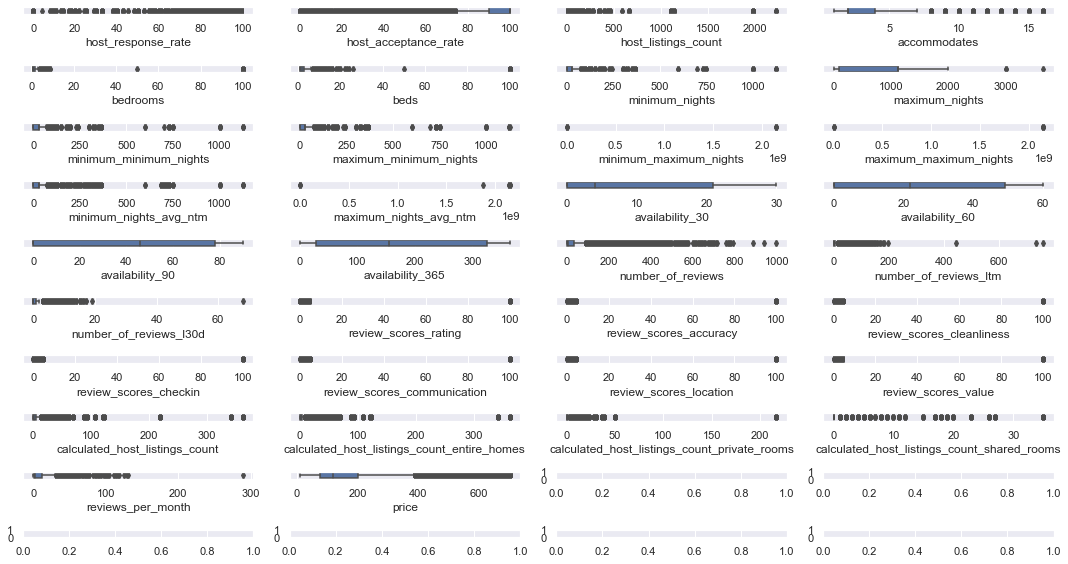

In [35]:
plt.figure(figsize=(20,10))
fig,ax = plt.subplots(nrows= 10, ncols= 4)
for i, j in zip(df_LA.select_dtypes(include = np.number).columns, ax.flatten()):
    sns.boxplot(df_LA.select_dtypes(include = np.number)[i], ax= j)
plt.tight_layout()
plt.show()    

In [36]:
# # # Outlier treatment

# q1= df_LA.quantile(0.25)
# q3= df_LA.quantile(0.75)

# iqr = q3-q1

# # # # for i in range(1,100):
# # # #     ul= q3 + (i*iqr)
# # # #     ll= q1 - (i*iqr)
# # # #     df_LA_out= df_LA[~((df_LA<ll)|(df_LA>ul)).aLA(axis= 1)]
# # # #     print(df_LA_out.shape,i)


# ul= q3 + (1.5*iqr)
# ll= q1 - (1.5*iqr)
# df_LA_out= df_LA[~((df_LA<ll)|(df_LA>ul)).any(axis= 1)]
# print(df_LA_out.shape)

**Interpretation :**
####  Shape of original data :  (31115, 40) <br> Shape of data after outlier removal :(4003, 40) <br> As we are losing almost 90% of data by IQR method with 1.5*IQR as threshold,we decided to skip outlier treatment bsed on IQR method from  our dataset.<br>Instead boxplot of each columns plotted separately and removed outliers columnwise

In [37]:
df_LA.shape

(31115, 40)

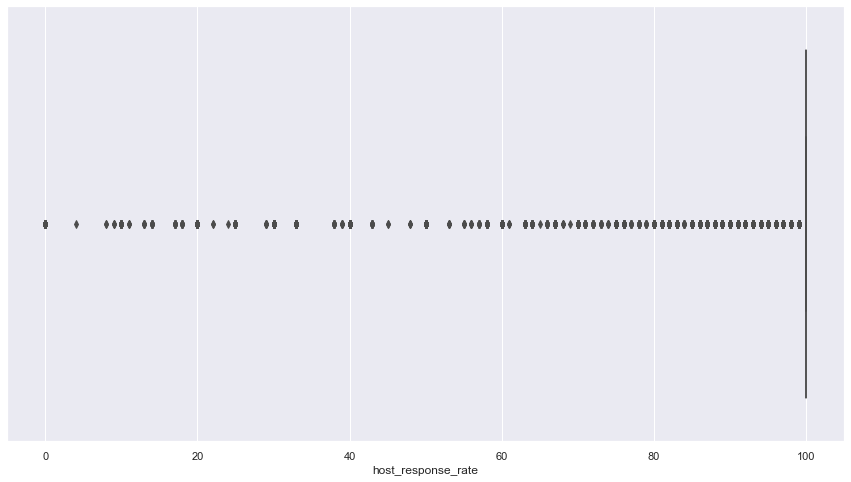

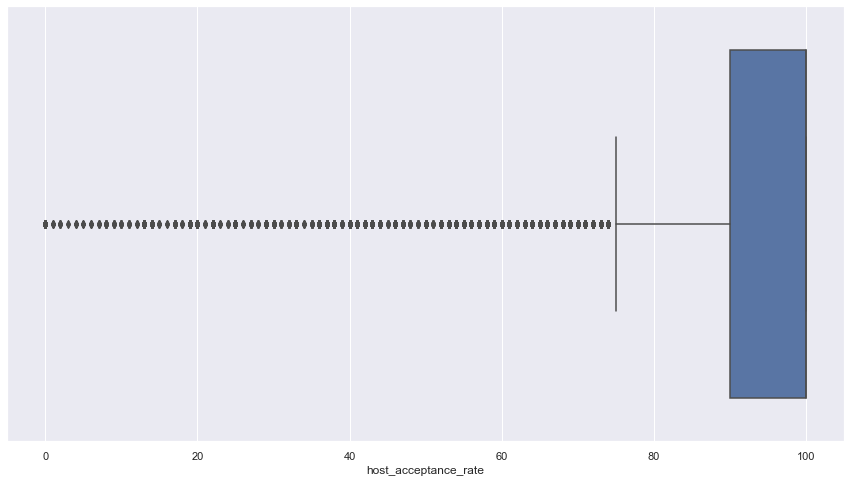

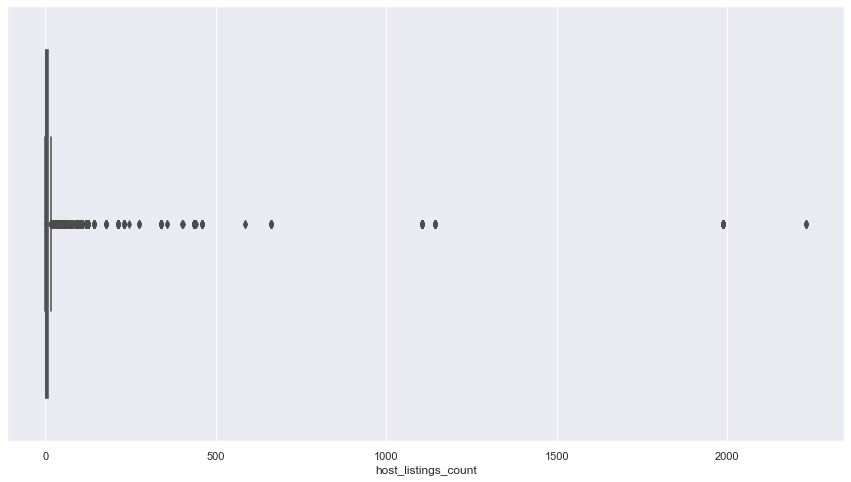

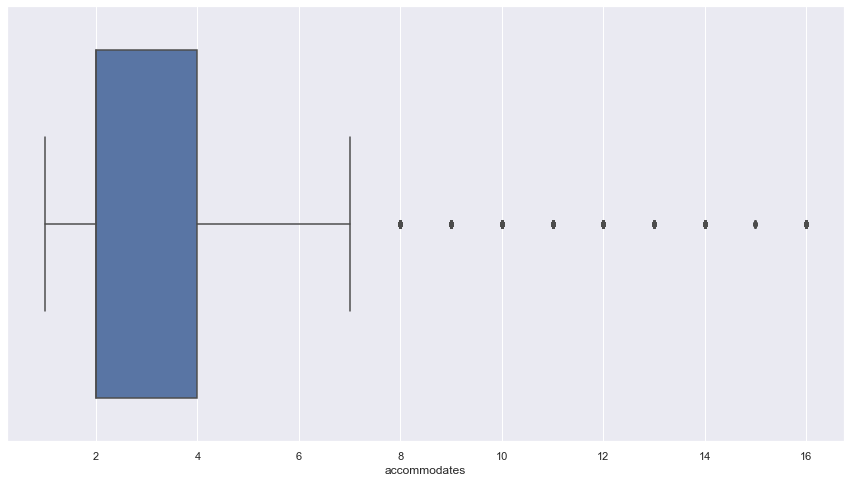

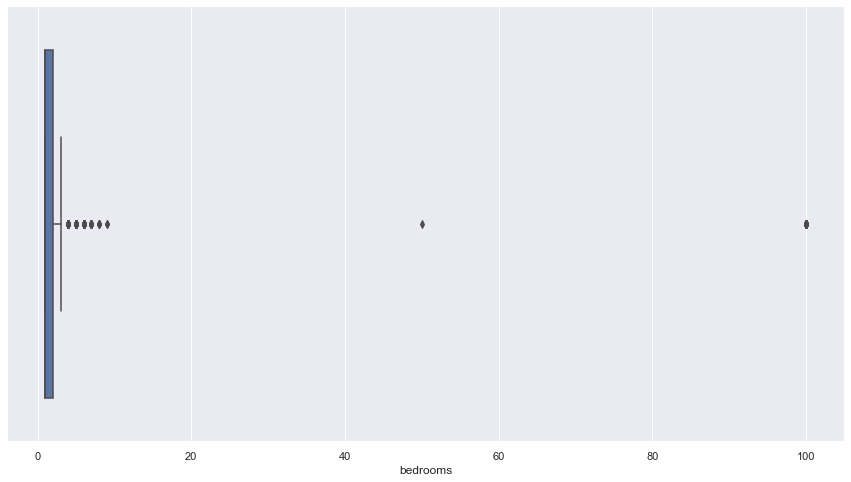

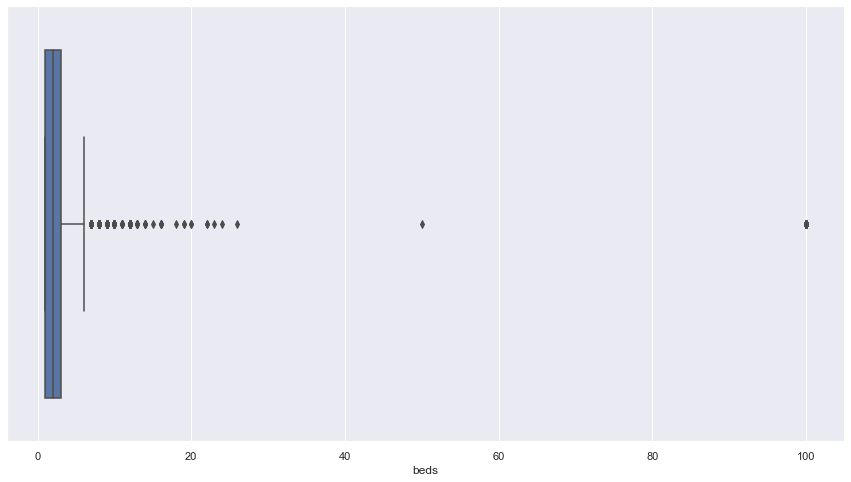

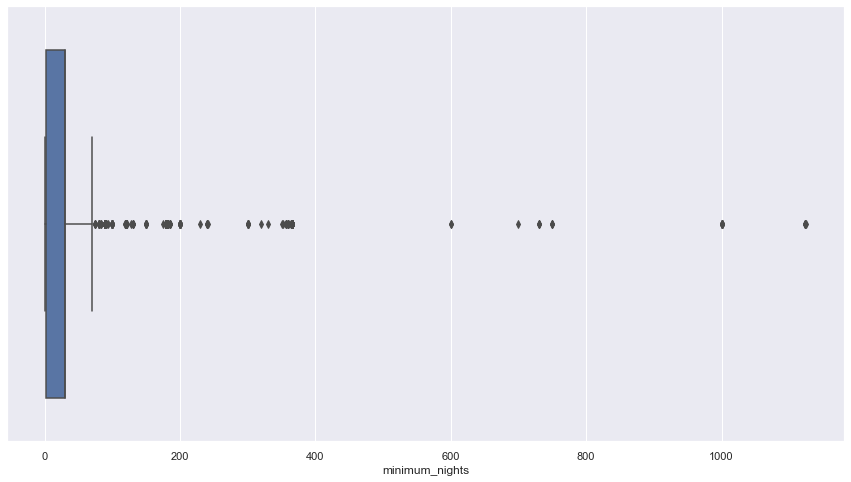

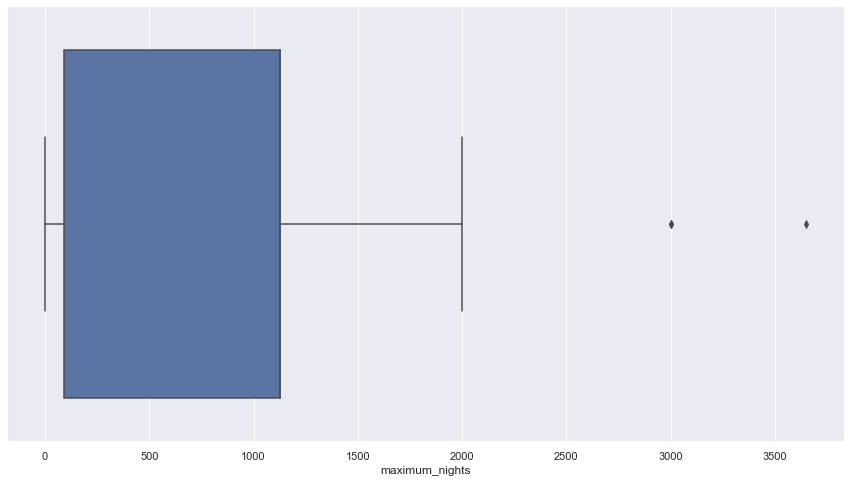

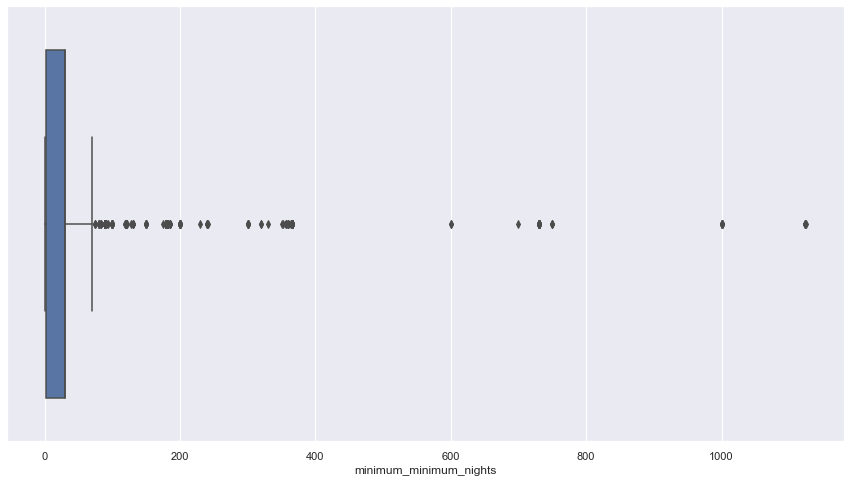

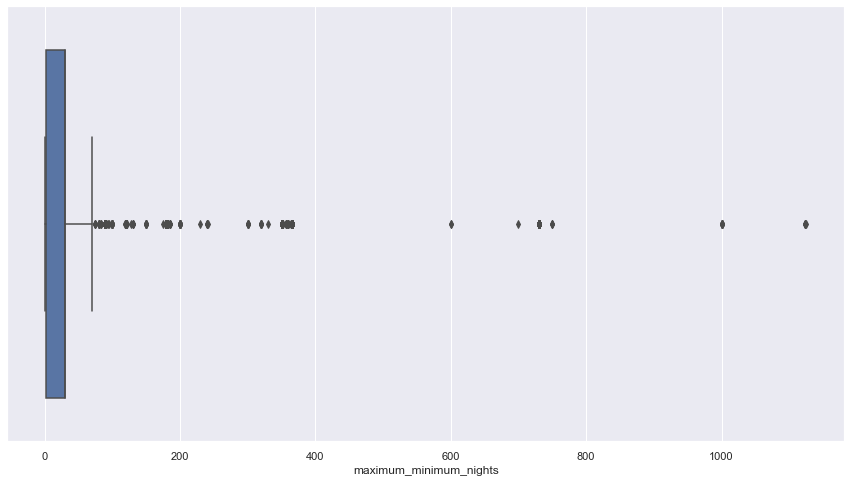

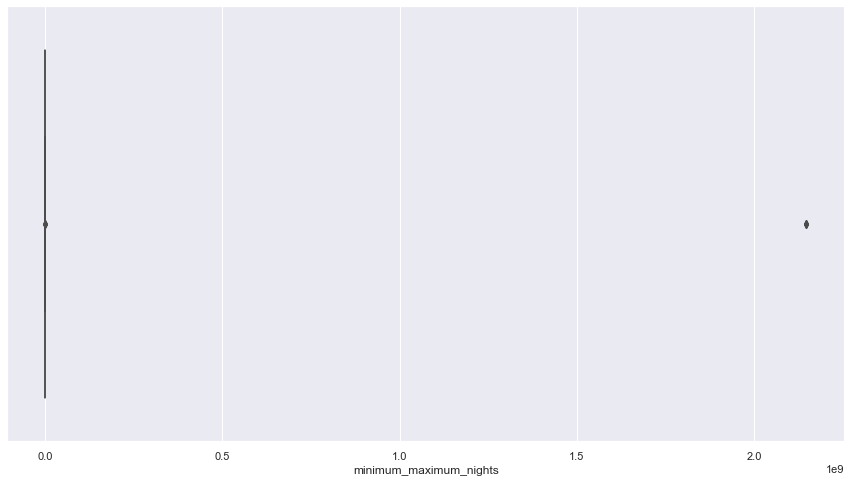

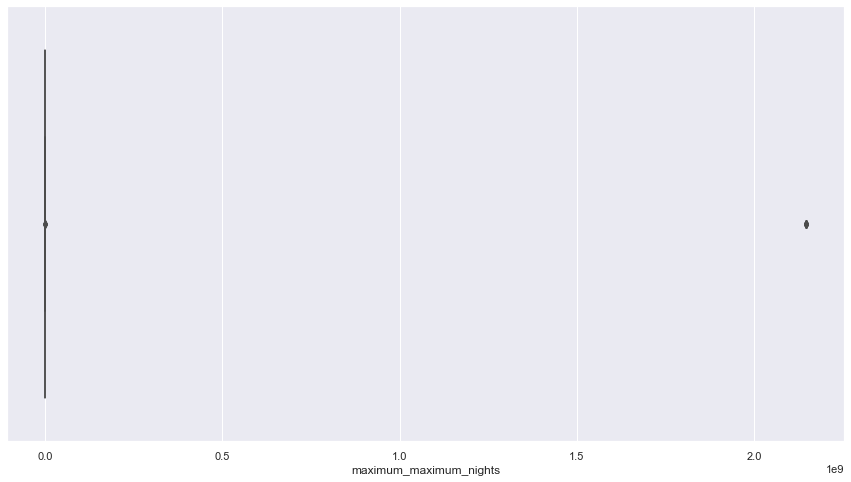

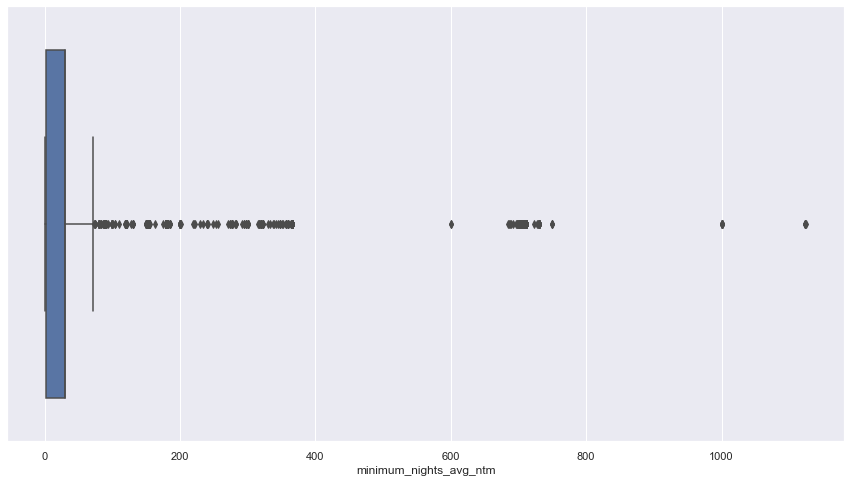

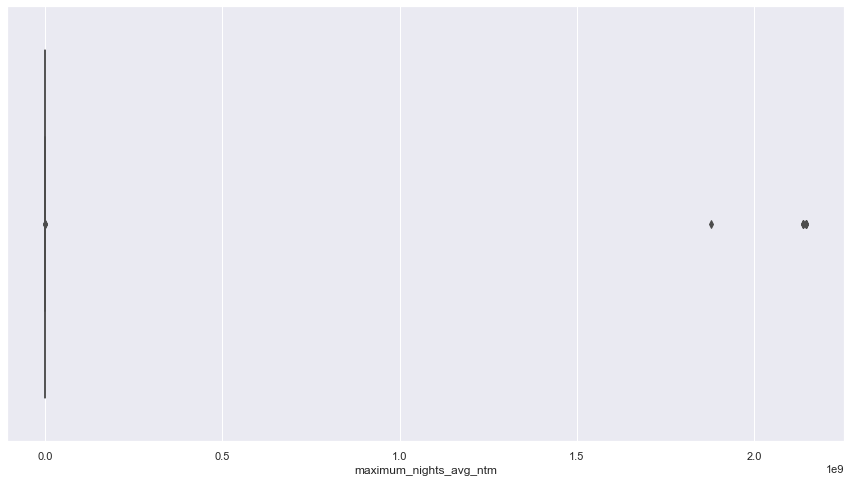

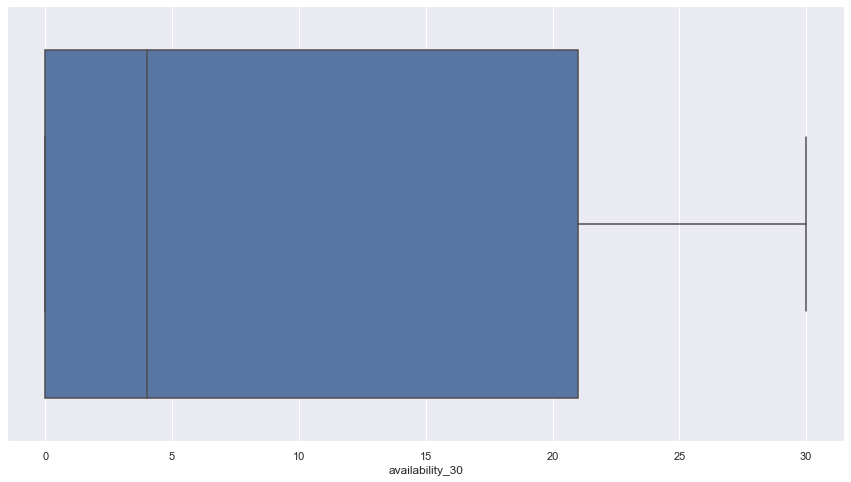

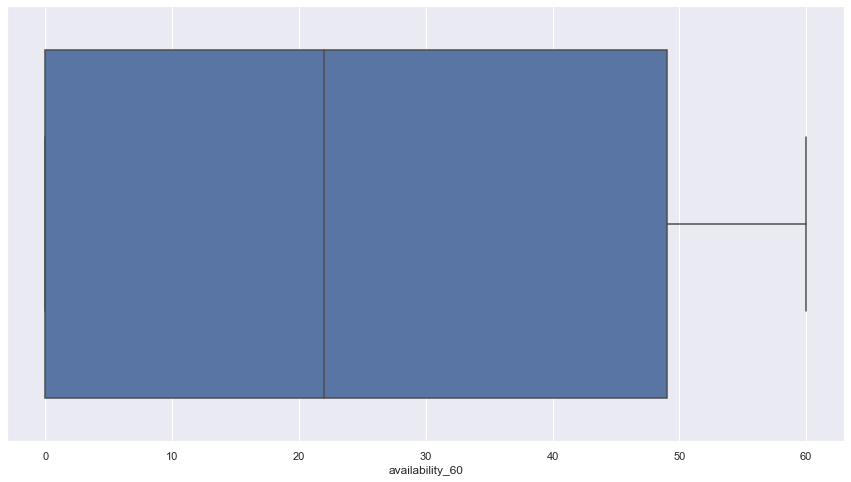

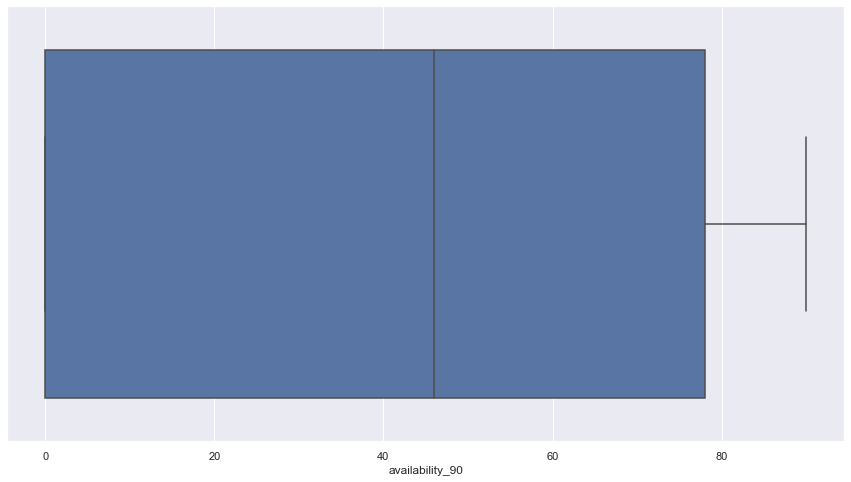

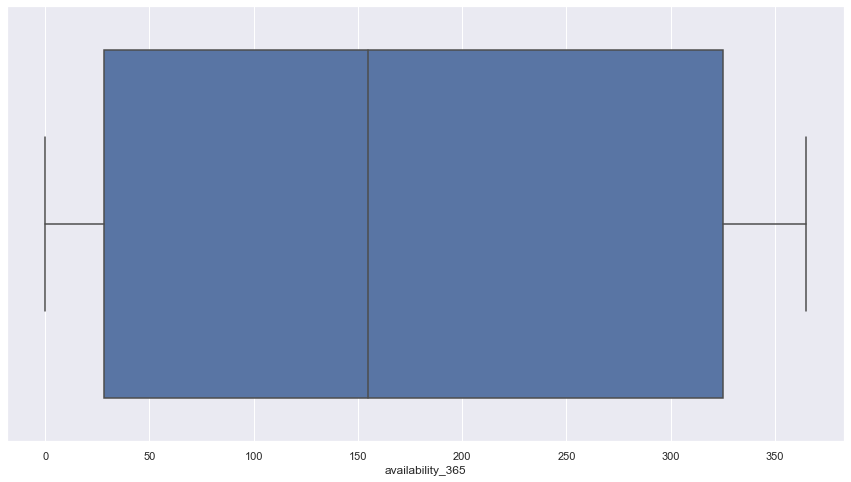

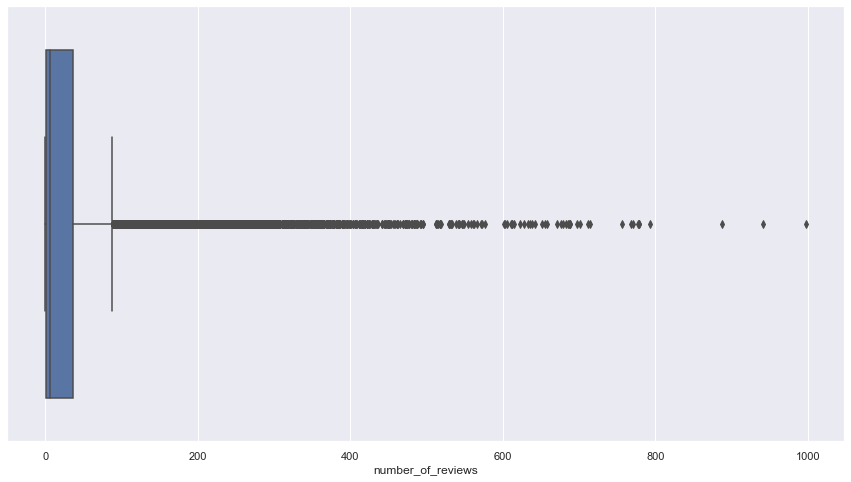

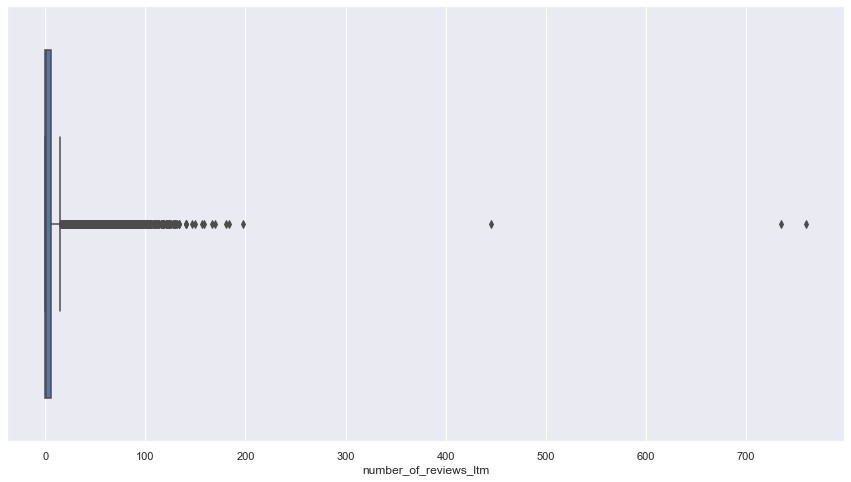

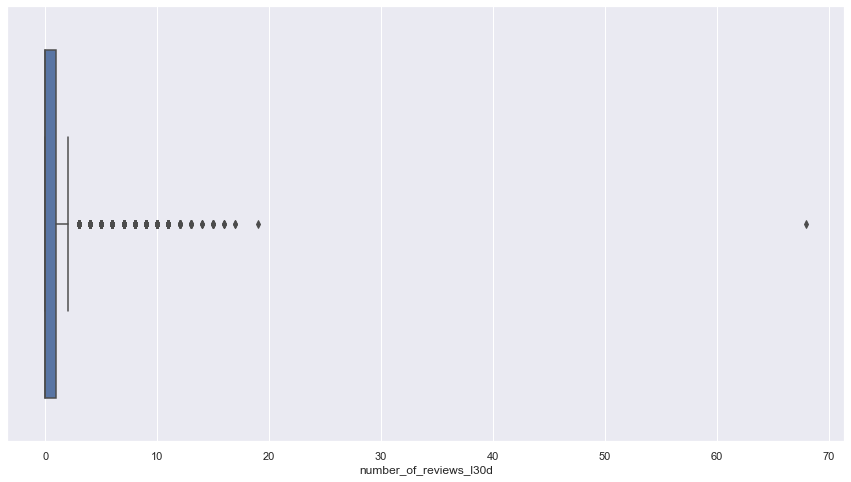

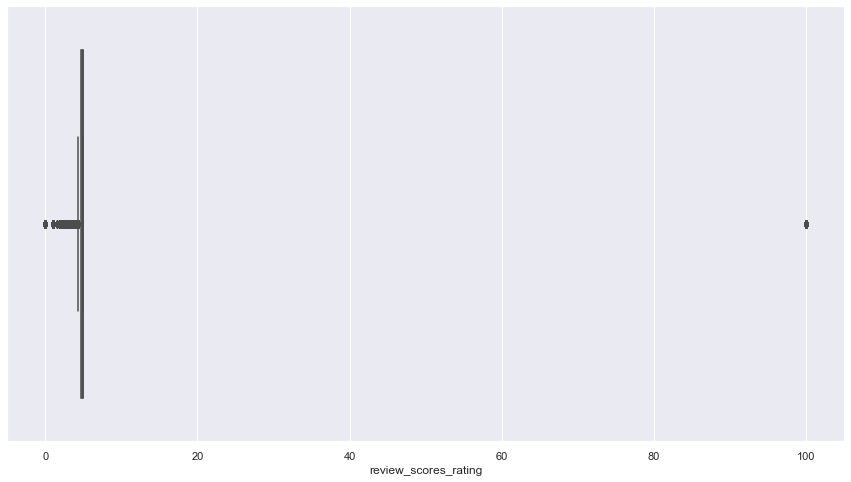

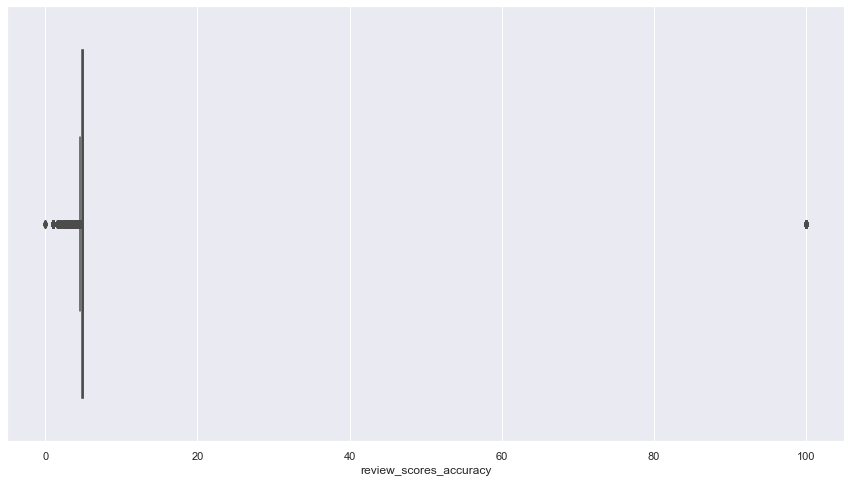

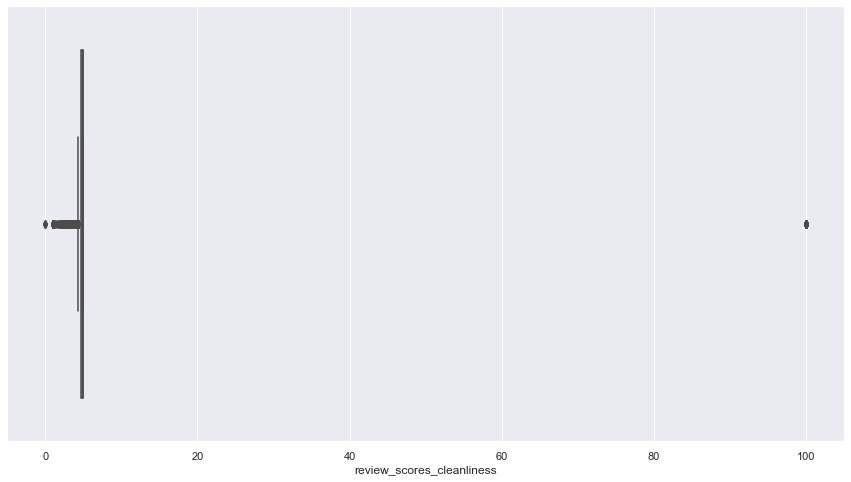

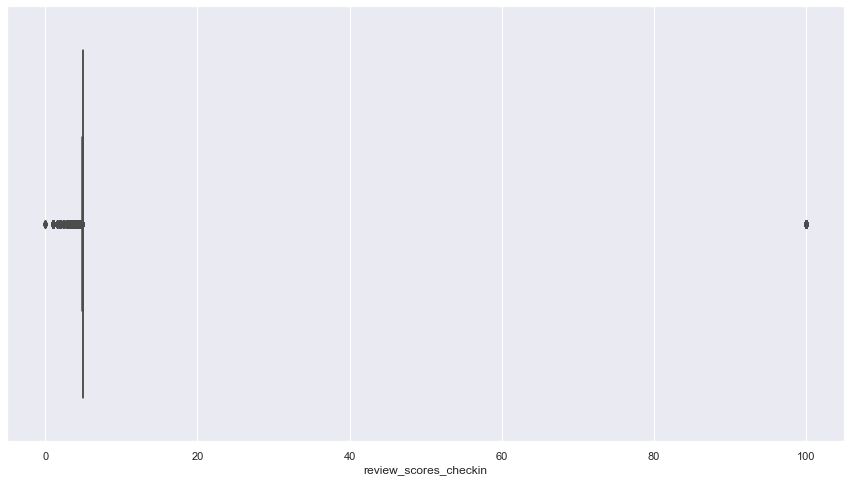

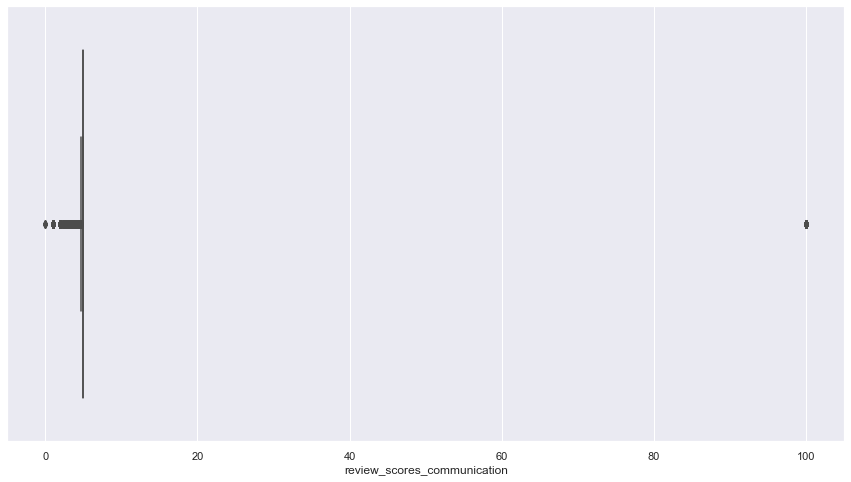

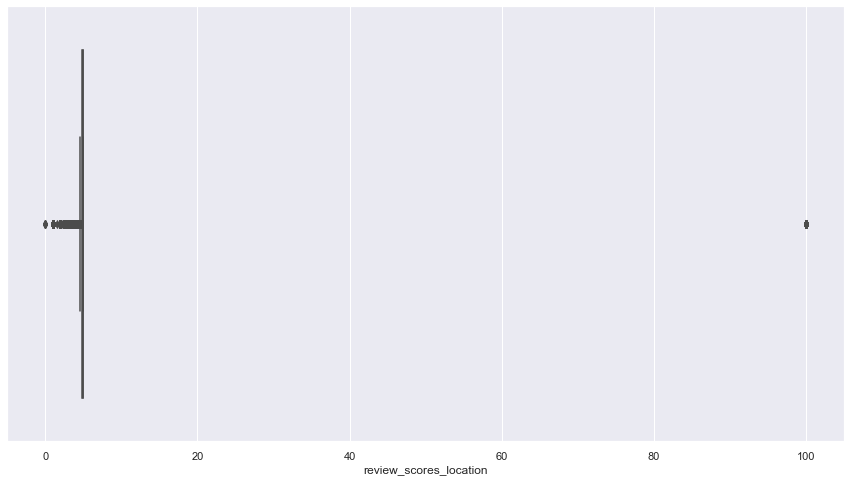

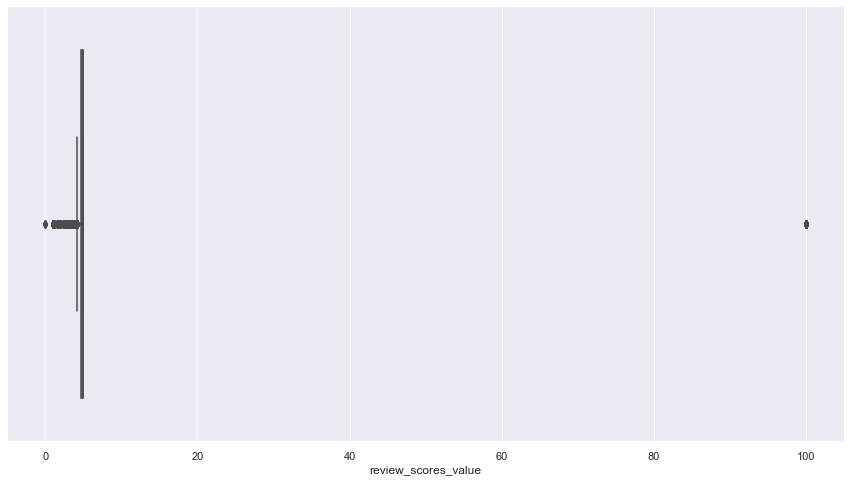

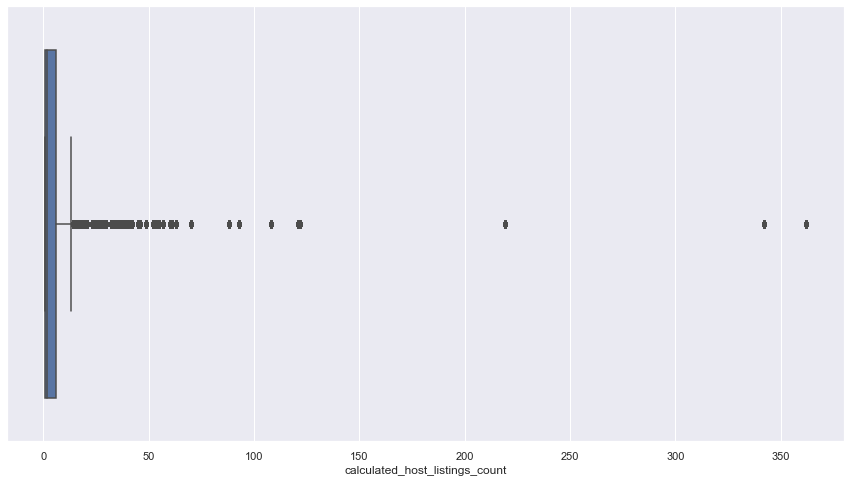

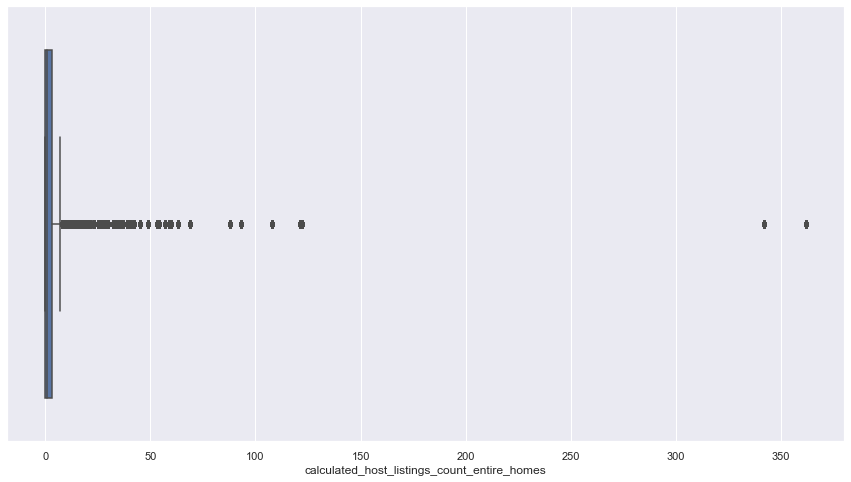

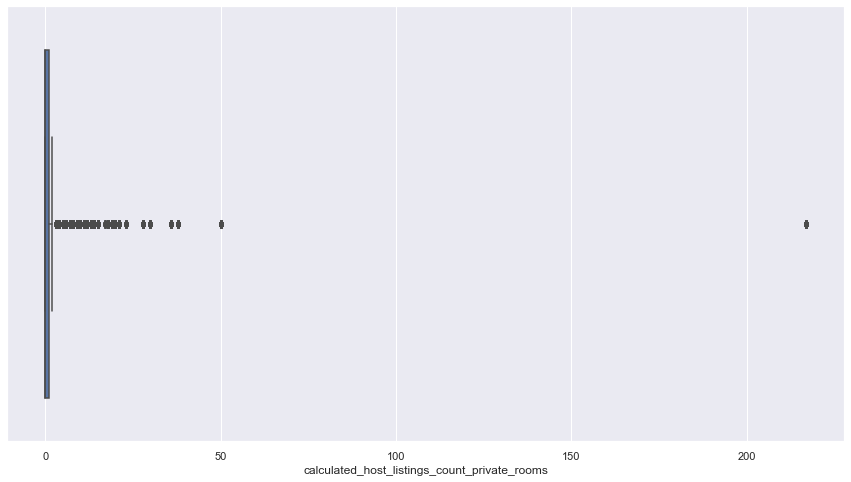

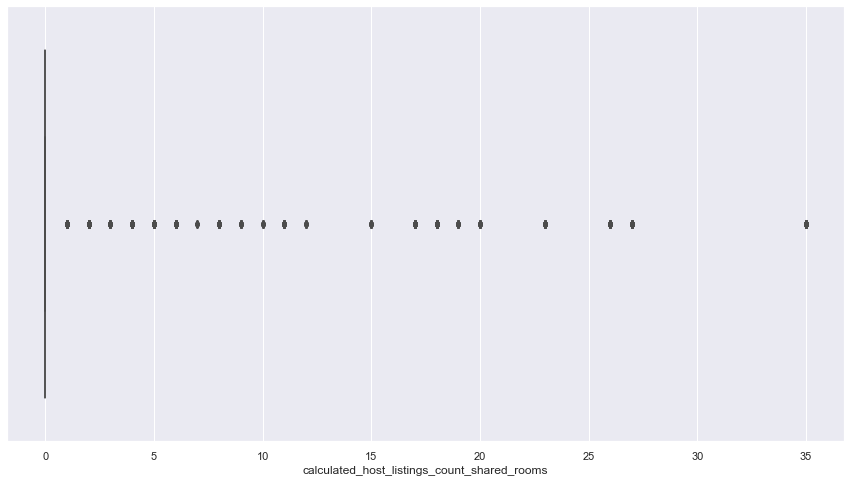

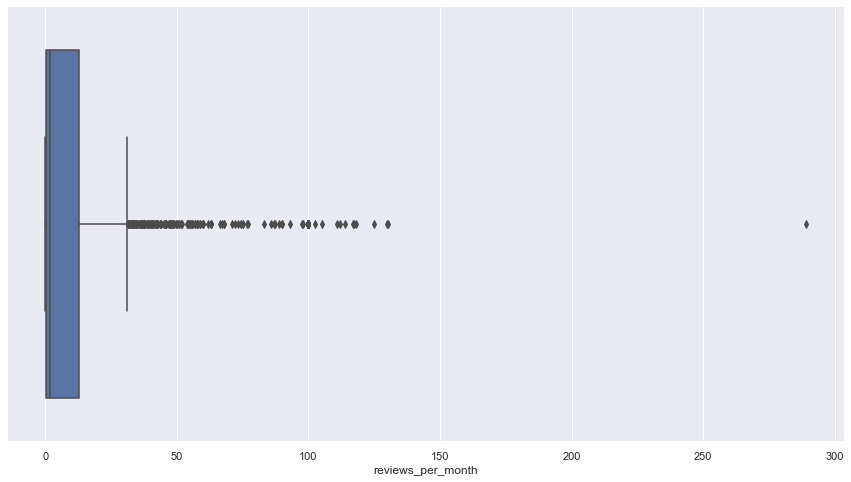

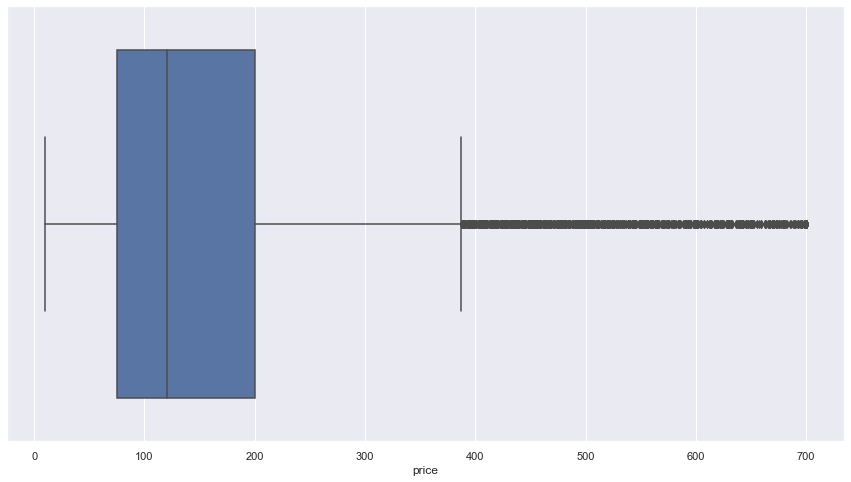

In [38]:
for i in df_LA.select_dtypes(exclude=np.object):
    sns.boxplot(df_LA.select_dtypes(exclude=np.object)[i])
    plt.show()
    

In [39]:
# df_LA['calculated_host_listings_count'].sort_values(ascending=False)
# df_LA['reviews_per_month'].value_counts().sort_index(ascending=False)

In [40]:
# Remove outliers for each column separately,based on the above boxplot

df_LA.drop(df_LA[df_LA['host_listings_count']>2000].index,inplace=True)
df_LA.drop(df_LA[df_LA['accommodates']>12].index,inplace=True)
df_LA.drop(df_LA[df_LA['bedrooms']==100].index,inplace=True)
df_LA.drop(df_LA[df_LA['beds']==100].index,inplace=True)
df_LA.drop(df_LA[df_LA['minimum_nights']>400].index,inplace=True)
df_LA.drop(df_LA[df_LA['maximum_nights']>10000].index,inplace=True)
df_LA.drop(df_LA[df_LA['maximum_minimum_nights']>400].index,inplace=True)
df_LA.drop(df_LA[df_LA['minimum_minimum_nights']>400].index,inplace=True)
df_LA.drop(df_LA[df_LA['minimum_maximum_nights']>10000].index,inplace=True)
df_LA.drop(df_LA[df_LA['maximum_maximum_nights']>10000].index,inplace=True)
df_LA.drop(df_LA[df_LA['minimum_nights_avg_ntm']>400].index,inplace=True)
df_LA.drop(df_LA[df_LA['maximum_nights_avg_ntm']>10000].index,inplace=True)
df_LA.drop(df_LA[df_LA['number_of_reviews']>600].index,inplace=True)
df_LA.drop(df_LA[df_LA['number_of_reviews_ltm']>300].index,inplace=True)
df_LA.drop(df_LA[df_LA['number_of_reviews_l30d']>30].index,inplace=True)
df_LA.drop(df_LA[df_LA['review_scores_rating']>300].index,inplace=True)
df_LA.drop(df_LA[df_LA['calculated_host_listings_count']>100].index,inplace=True)
df_LA.drop(df_LA[df_LA['calculated_host_listings_count_entire_homes']>100].index,inplace=True)
df_LA.drop(df_LA[df_LA['calculated_host_listings_count_private_rooms']>100].index,inplace=True)
df_LA.drop(df_LA[df_LA['reviews_per_month']>100].index,inplace=True)

In [41]:
df_LA.shape

(24774, 40)

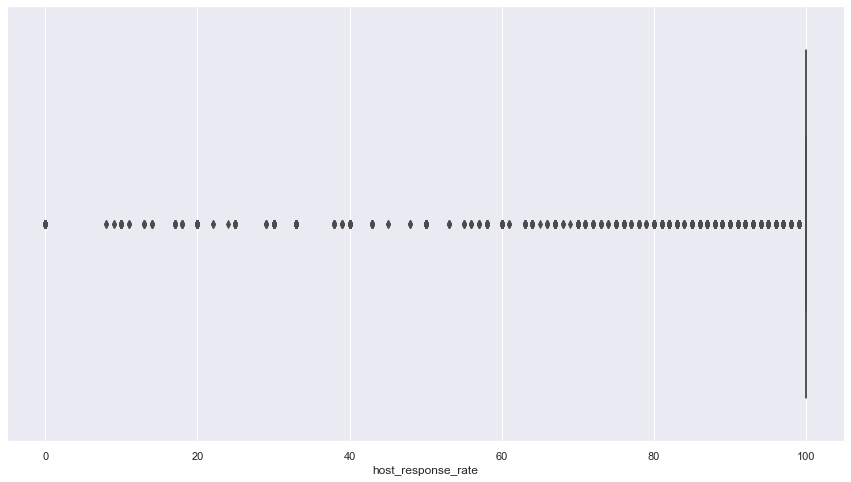

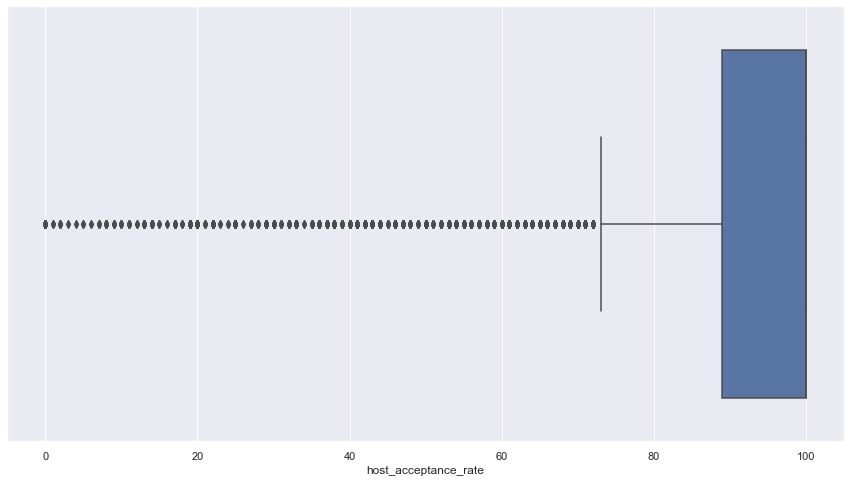

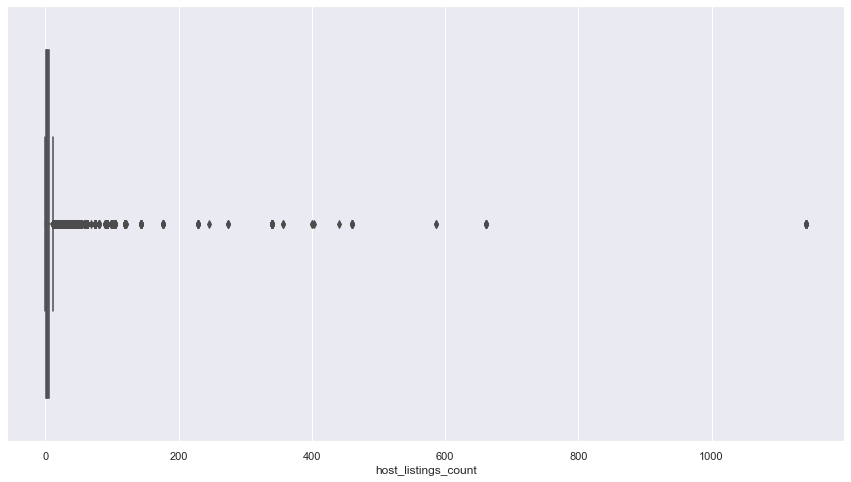

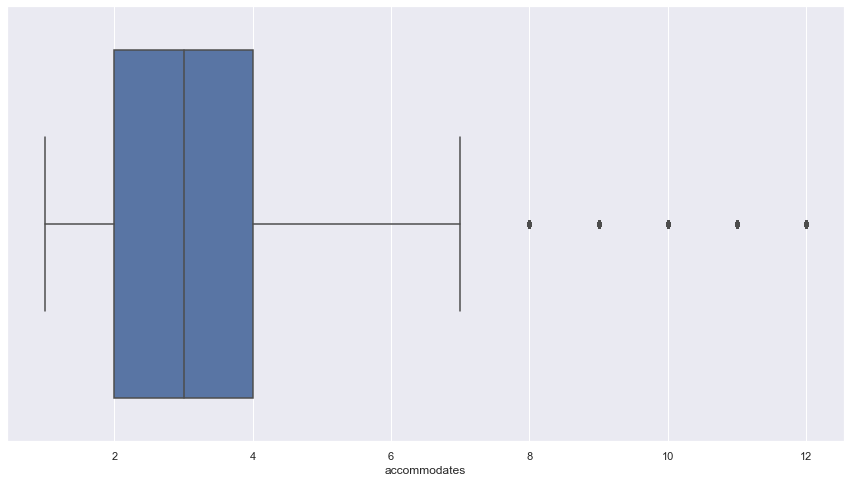

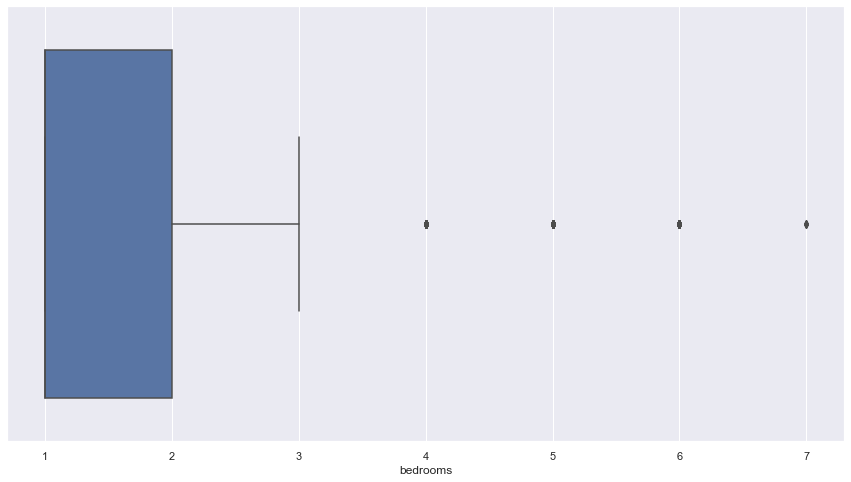

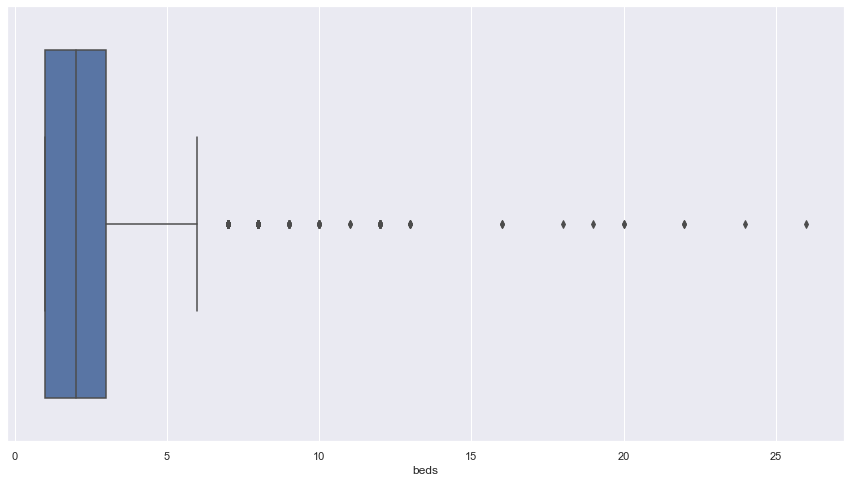

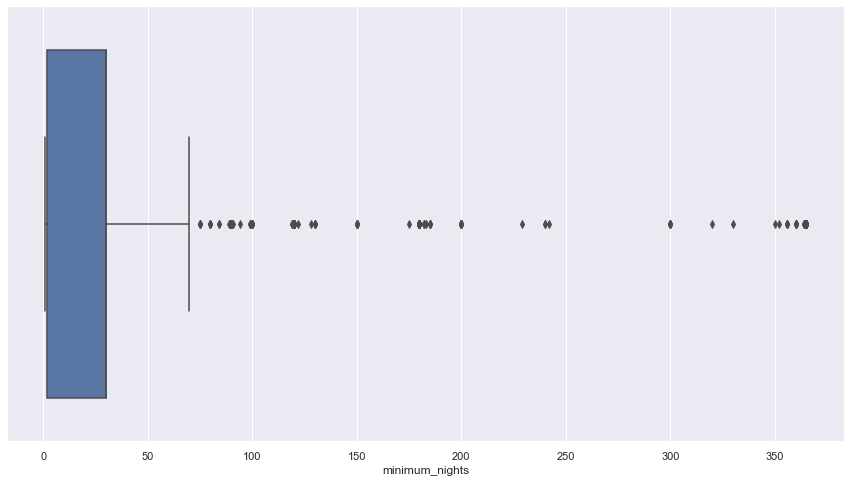

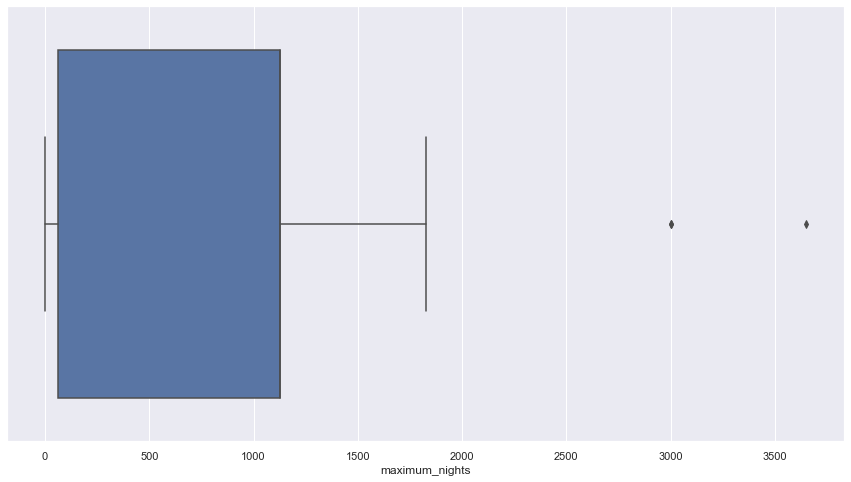

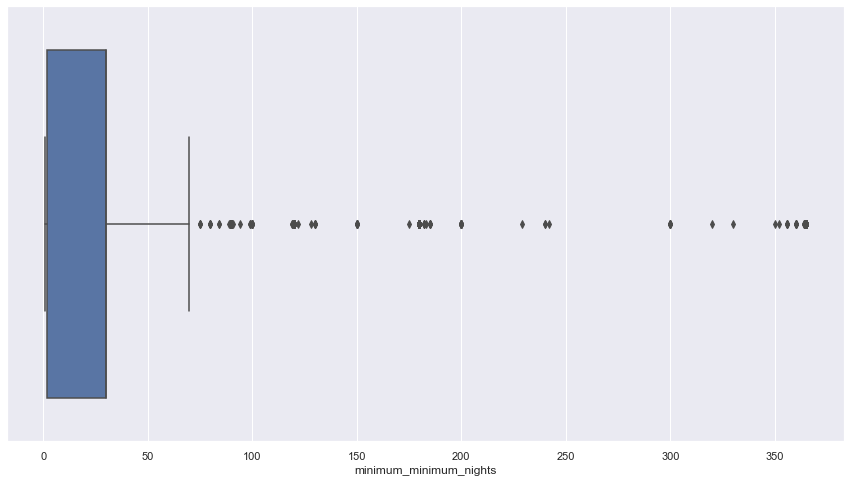

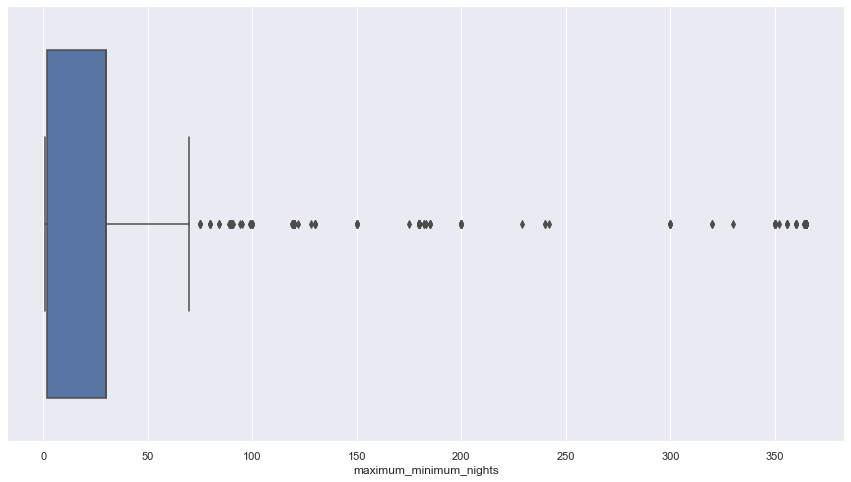

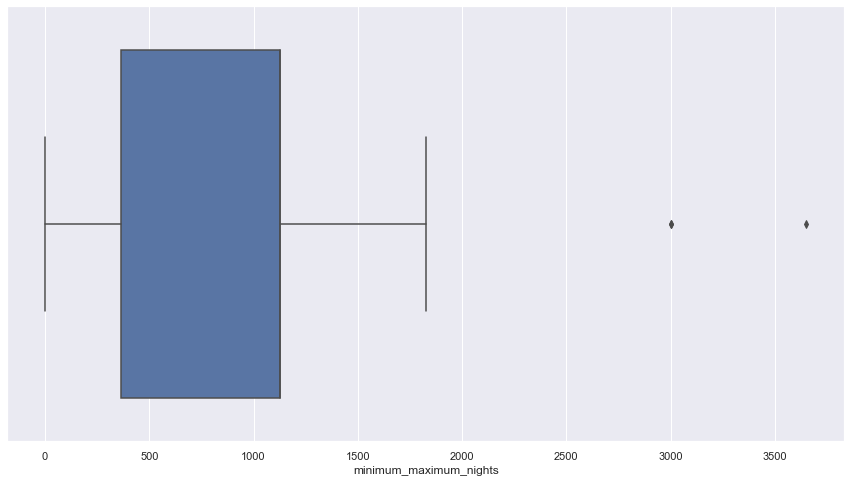

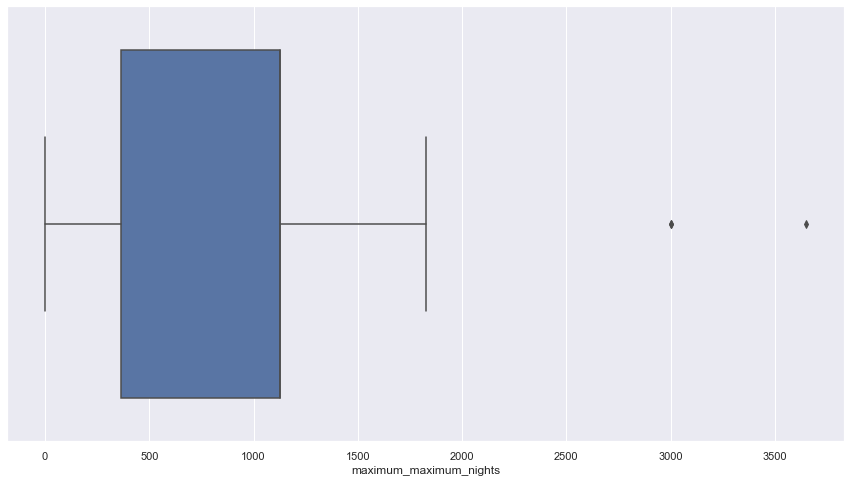

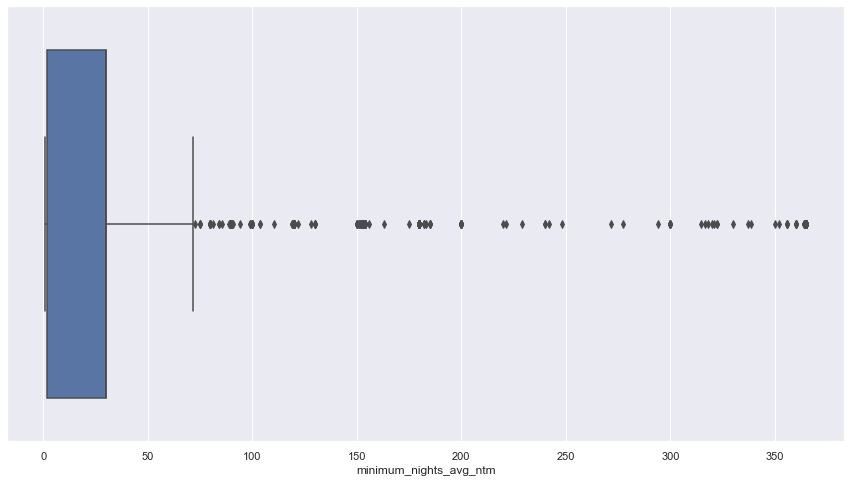

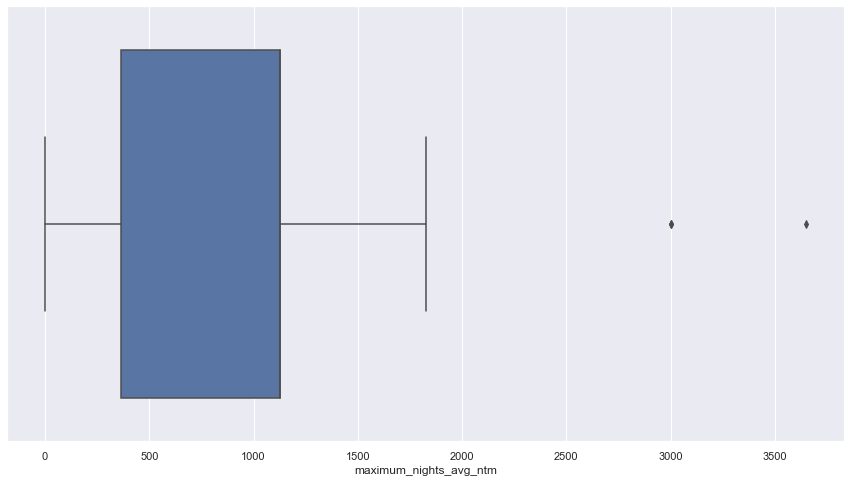

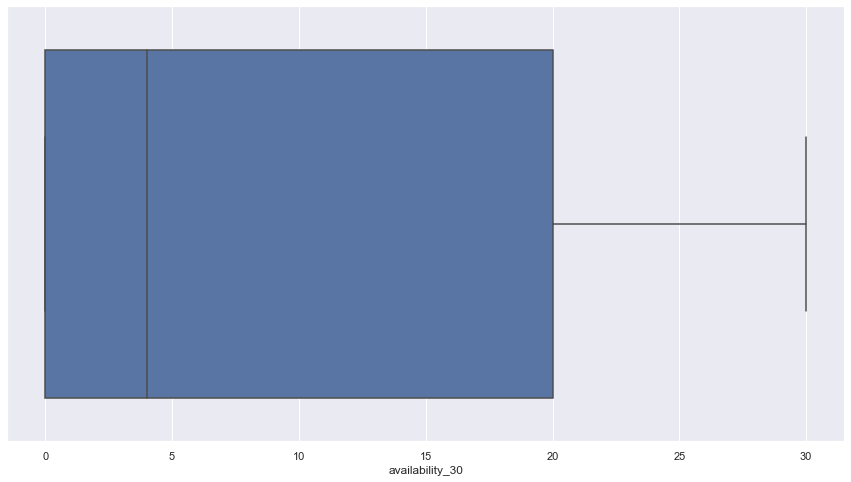

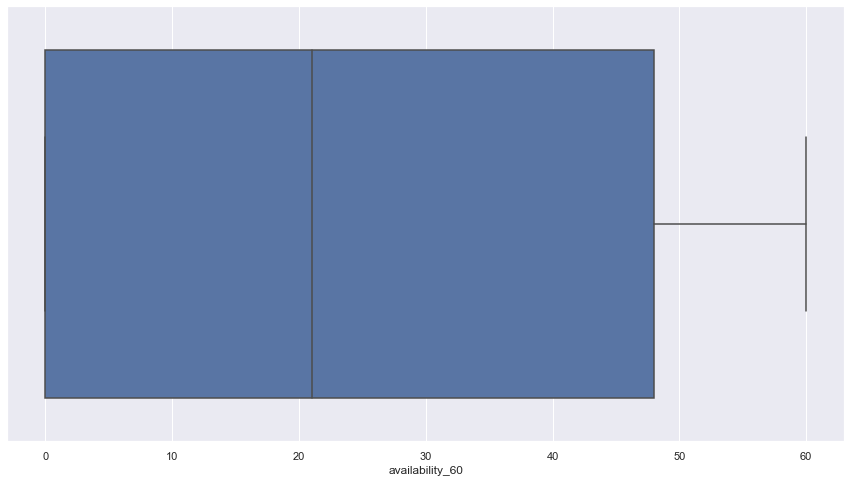

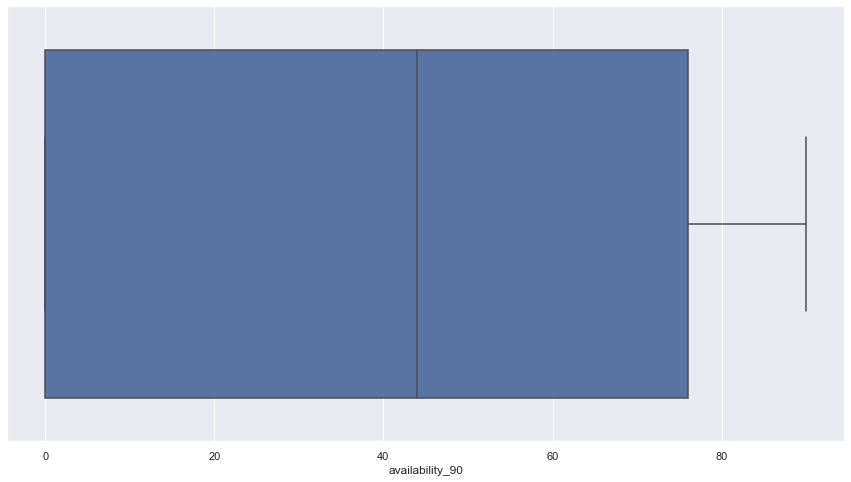

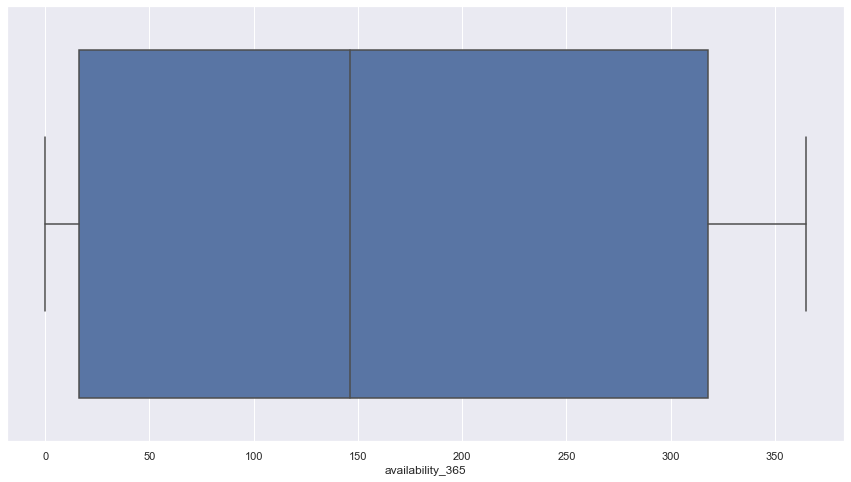

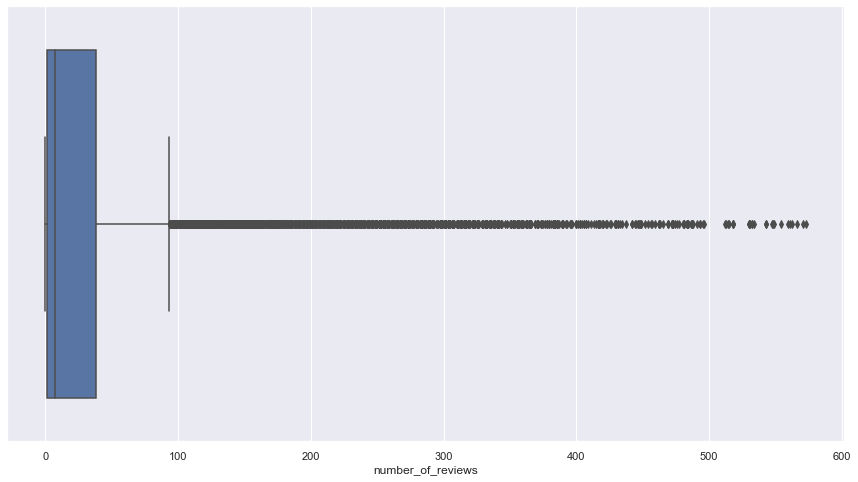

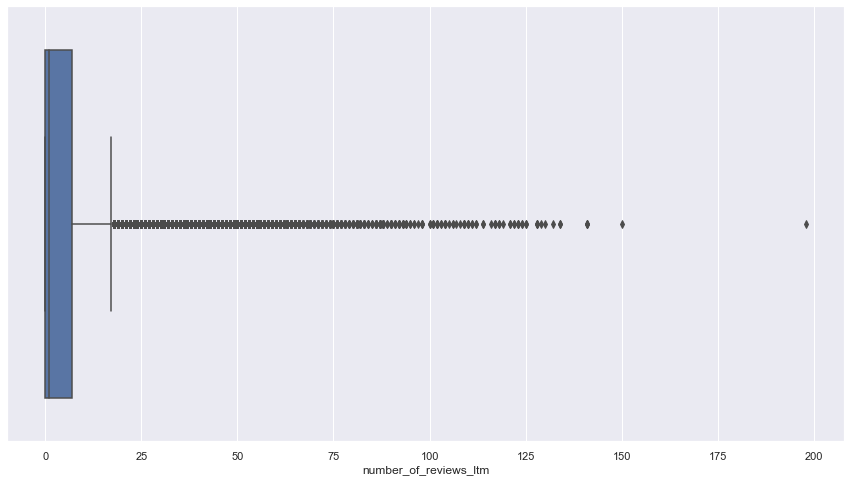

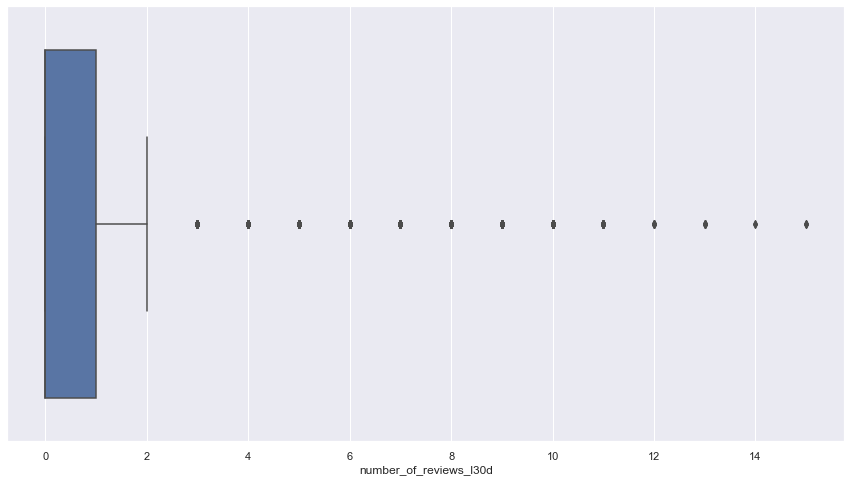

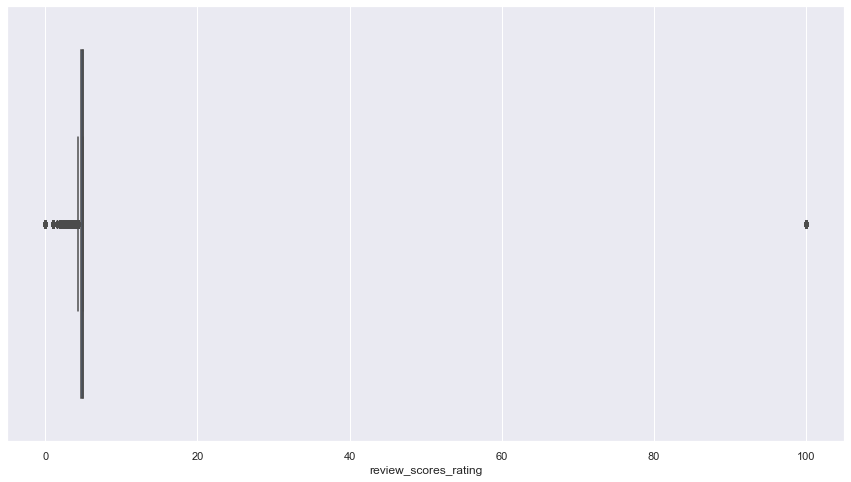

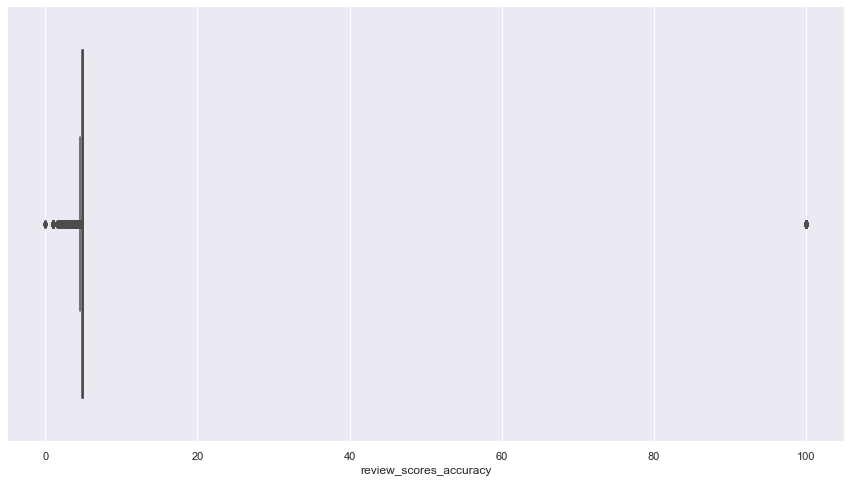

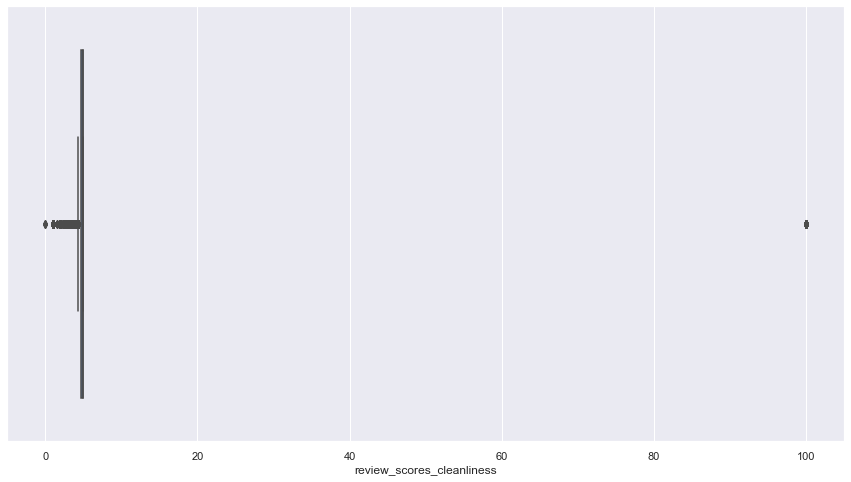

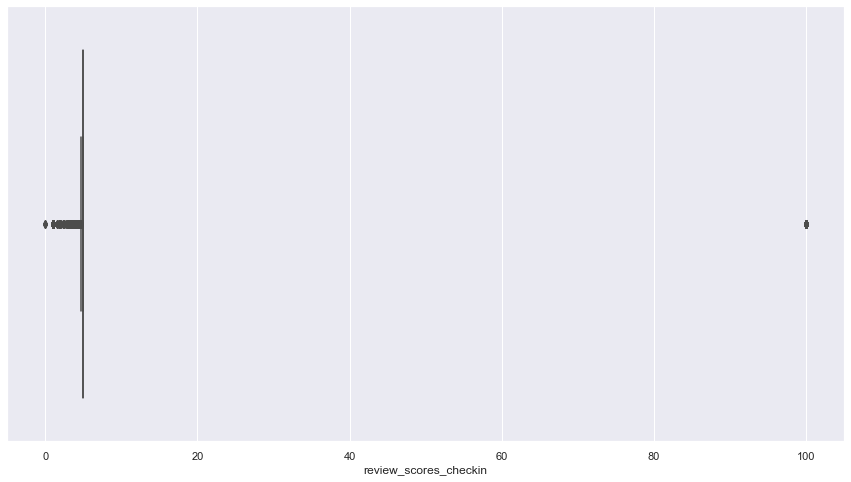

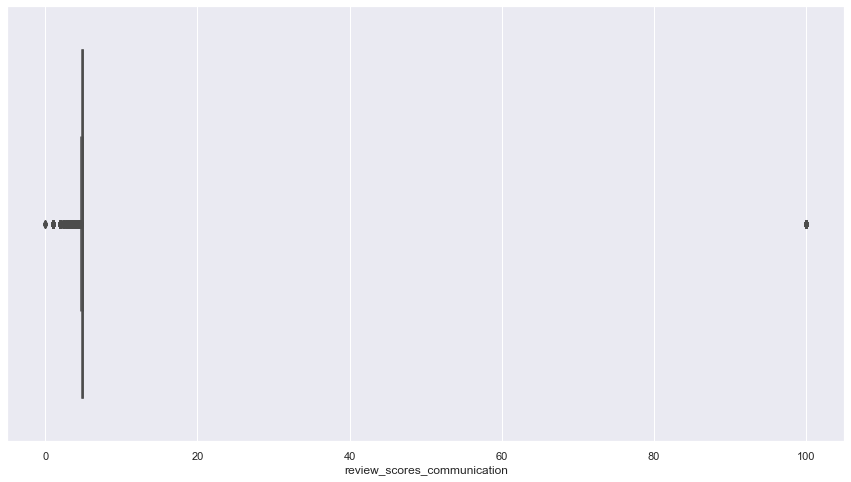

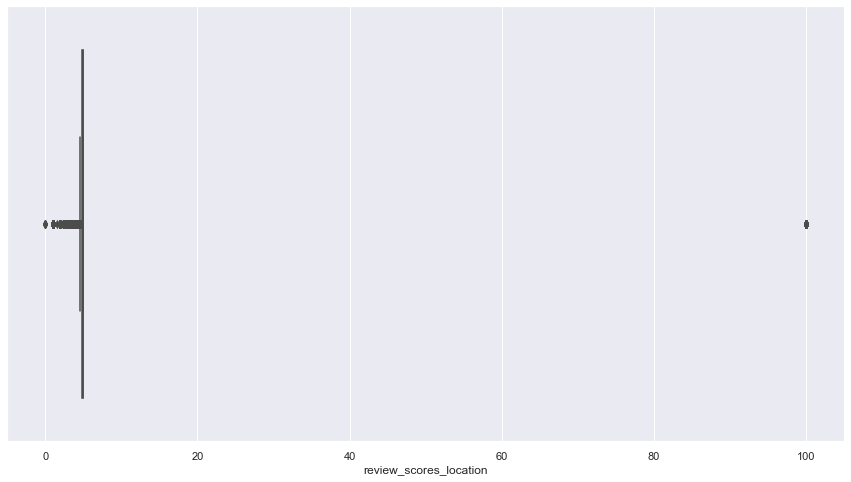

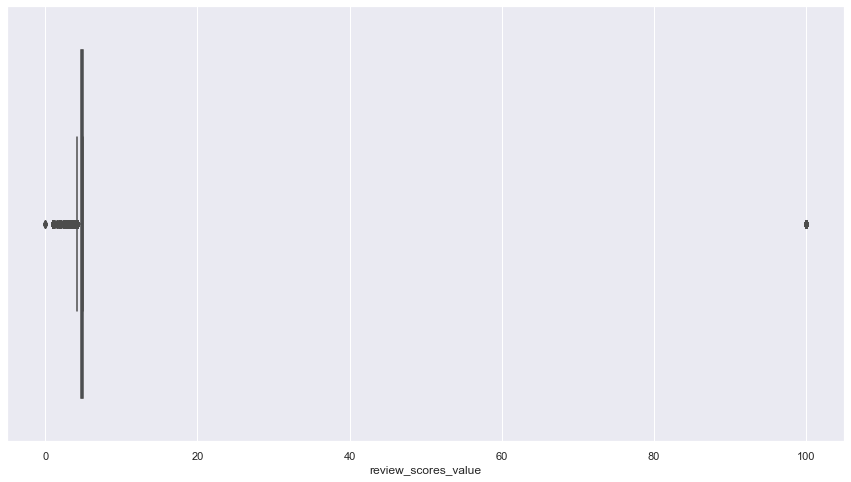

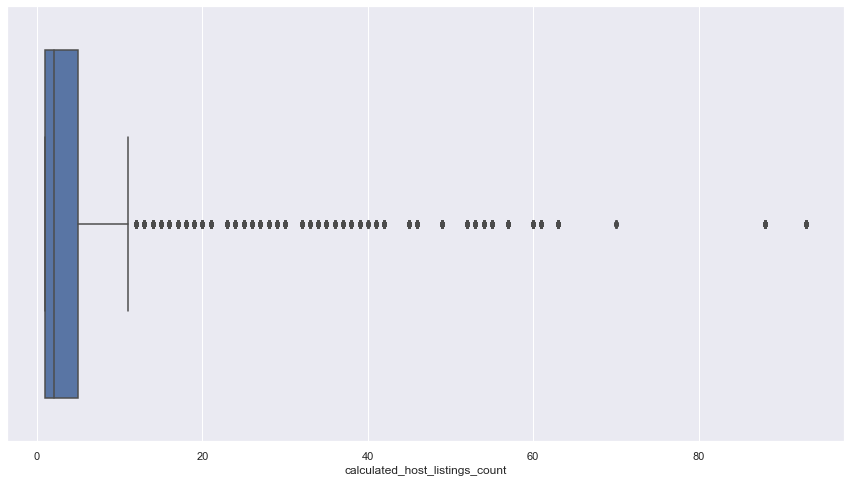

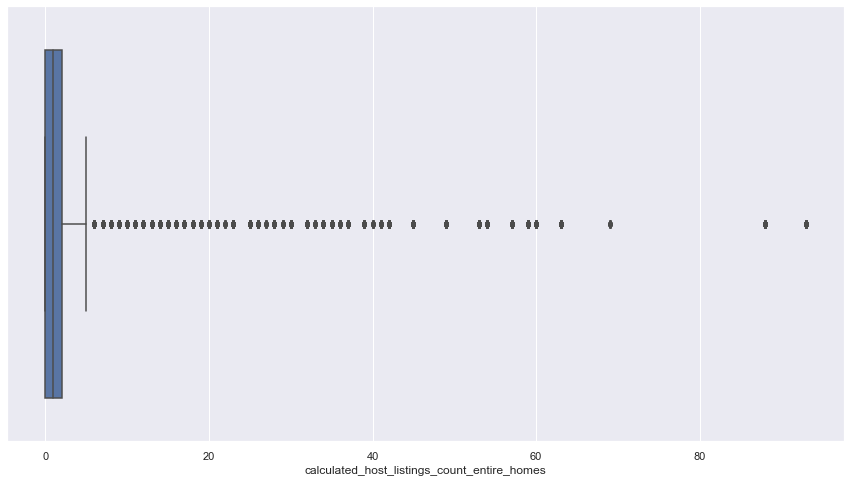

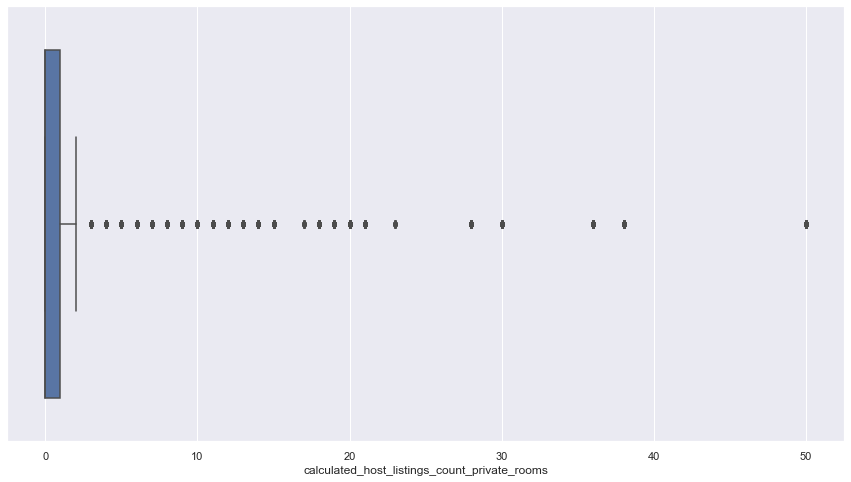

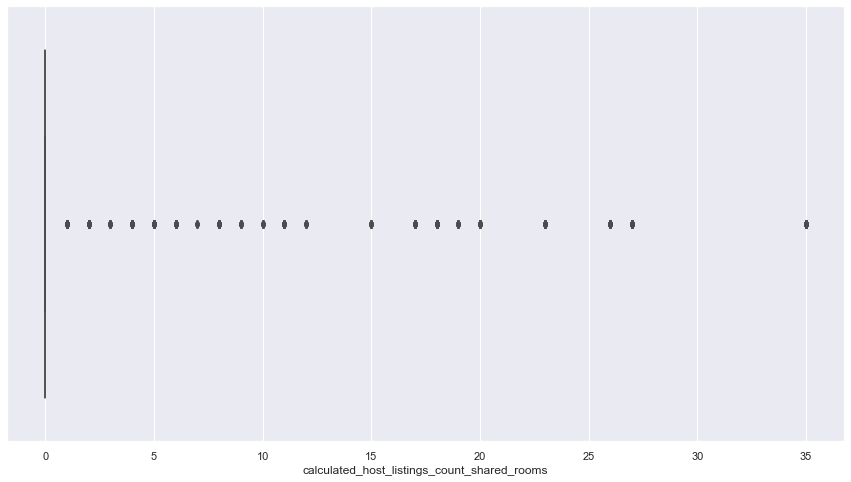

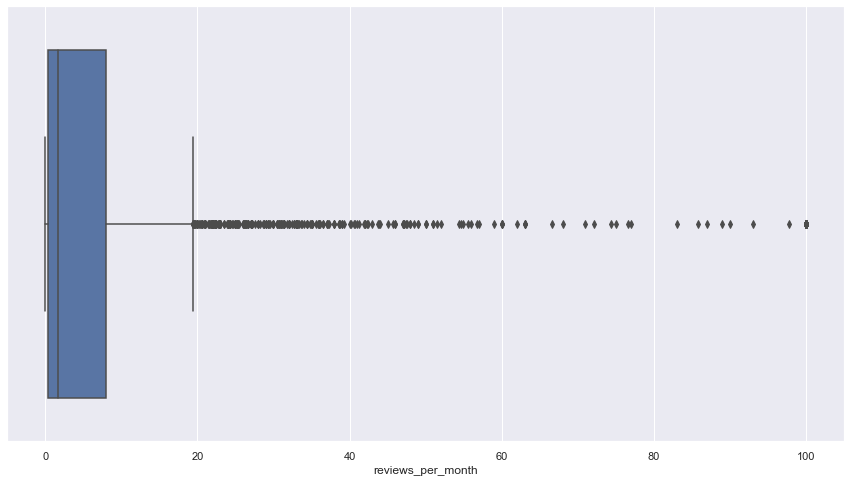

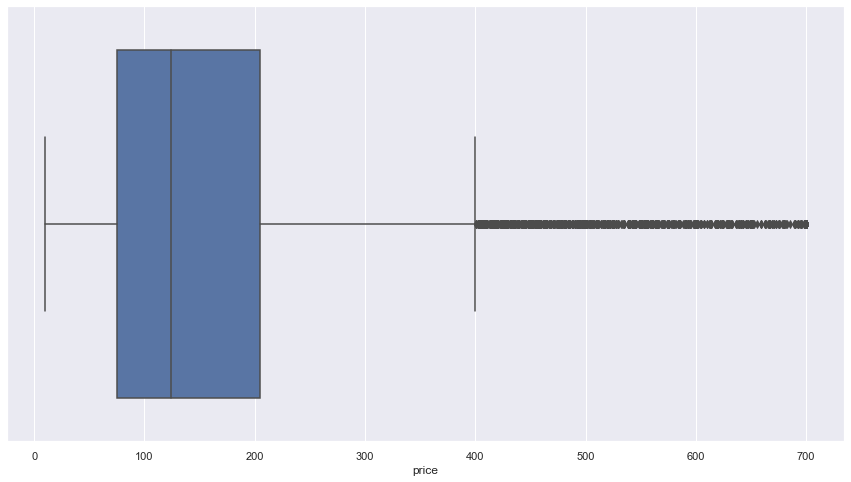

In [42]:
for i in df_LA.select_dtypes(exclude=np.object):
    sns.boxplot(df_LA.select_dtypes(exclude=np.object)[i])
    plt.show()

In [43]:
df_LA_out = df_LA.copy()

In [44]:
df_LA_out = df_LA_out.reset_index(drop=True)
df_LA_out.head()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,neighbourhood_group_cleansed,room_type,accommodates,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price
0,Immediately,100.000000,100.000000,f,1.000000,Other Cities,Entire home/apt,6,2.000000,3.000000,30,730,30.000000,30.000000,730.000000,730.000000,30.000000,730.000000,t,0,0,0,193,2,0,0,4.000000,5.000000,5.000000,3.000000,4.000000,5.000000,4.000000,f,1,1,0,0,0.020000,115.000000
1,within an hour,100.000000,100.000000,t,2.000000,City of Los Angeles,Private room,1,1.000000,1.000000,30,366,30.000000,30.000000,1125.000000,1125.000000,30.000000,1125.000000,t,6,7,25,300,33,6,1,4.820000,4.790000,4.910000,5.000000,4.970000,5.000000,4.850000,t,2,0,2,0,0.700000,89.000000
2,within an hour,100.000000,33.000000,t,2.000000,Other Cities,Private room,1,1.000000,1.000000,7,28,7.000000,7.000000,28.000000,28.000000,7.000000,28.000000,t,22,52,82,357,21,0,0,4.680000,4.450000,4.570000,4.650000,4.700000,4.900000,4.400000,f,2,1,1,0,0.360000,167.000000
3,Immediately,100.000000,100.000000,f,1.000000,Other Cities,Entire home/apt,2,1.000000,1.000000,30,730,30.000000,30.000000,1125.000000,1125.000000,30.000000,1125.000000,t,0,0,0,0,0,0,0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,t,1,1,0,0,100.000000,50.000000
4,within a few hours,100.000000,57.000000,f,6.000000,City of Los Angeles,Entire home/apt,2,1.000000,2.000000,31,730,31.000000,31.000000,730.000000,730.000000,31.000000,730.000000,t,0,0,0,274,23,0,0,4.040000,4.040000,3.830000,3.960000,4.300000,4.640000,4.000000,f,4,1,3,0,0.390000,118.000000


# EDA

## Univariate Analysis

## Numeric Variables description

In [45]:
df_LA_out.select_dtypes(exclude = np.object).describe()

,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price
count,24774.000000,24774.000000,24774.000000,24774.000000,24774.000000,24774.000000,24774.000000,24774.000000,24774.000000,24774.000000,24774.000000,24774.000000,24774.000000,24774.000000,24774.000000,24774.000000,24774.000000,24774.000000,24774.000000,24774.000000,24774.000000,24774.000000,24774.000000,24774.000000,24774.000000,24774.000000,24774.000000,24774.000000,24774.000000,24774.000000,24774.000000,24774.000000,24774.000000,24774.000000
mean,94.512634,87.723379,8.460079,3.500565,1.550456,1.978768,18.947606,645.405223,18.776338,20.088843,817.460200,826.406071,19.600218,824.560725,9.907564,24.417979,42.045209,165.210503,35.612134,7.624284,0.750868,24.525466,25.540152,25.475359,25.623963,25.591202,25.597887,25.519900,6.058408,4.155082,1.545491,0.303867,22.692230,163.573222
std,18.521371,24.097780,37.709630,2.163423,0.870365,1.366465,24.291659,505.355441,24.204021,26.916978,464.093895,459.122162,26.050174,459.509121,11.512551,23.224827,34.691831,139.738914,66.721760,15.500140,1.654689,38.712620,39.322666,39.352666,39.310441,39.300053,39.338147,39.389428,11.529712,10.618617,4.372940,2.406383,39.890053,126.387412
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000,10.000000
25%,100.000000,89.000000,1.000000,2.000000,1.000000,1.000000,2.000000,60.000000,2.000000,2.000000,365.000000,365.000000,2.000000,365.000000,0.000000,0.000000,0.000000,16.000000,1.000000,0.000000,0.000000,4.730000,4.810000,4.710000,4.900000,4.890000,4.820000,4.690000,1.000000,0.000000,0.000000,0.000000,0.350000,75.000000
50%,100.000000,100.000000,2.000000,3.000000,1.000000,2.000000,30.000000,1125.000000,30.000000,30.000000,1125.000000,1125.000000,30.000000,1125.000000,4.000000,21.000000,44.000000,146.000000,7.000000,1.000000,0.000000,4.930000,4.970000,4.940000,5.000000,5.000000,4.980000,4.890000,2.000000,1.000000,0.000000,0.000000,1.640000,124.000000
75%,100.000000,100.000000,5.000000,4.000000,2.000000,3.000000,30.000000,1125.000000,30.000000,30.000000,1125.000000,1125.000000,30.000000,1125.000000,20.000000,48.000000,76.000000,318.000000,38.000000,7.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.000000,1.000000,0.000000,7.960000,205.000000
max,100.000000,100.000000,1142.000000,12.000000,7.000000,26.000000,365.000000,3650.000000,365.000000,365.000000,3650.000000,3650.000000,365.000000,3650.000000,30.000000,60.000000,90.000000,365.000000,573.000000,198.000000,15.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,93.000000,93.000000,50.000000,35.000000,100.000000,700.000000


## Categorical Variables description

In [46]:
df_LA_out.select_dtypes(include = np.object).describe()

,host_response_time,host_is_superhost,neighbourhood_group_cleansed,room_type,has_availability,instant_bookable
count,24774,24774,24774,24774,24774,24774
unique,5,2,3,4,2,2
top,within an hour,f,City of Los Angeles,Entire home/apt,t,f
freq,10957,17063,12870,15715,23977,16719


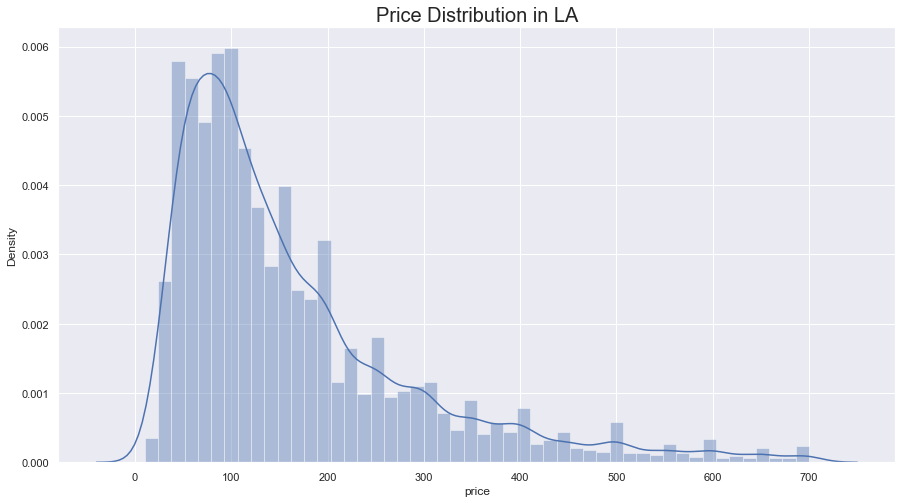

In [47]:
sns.distplot(df_LA_out['price'])
plt.title('Price Distribution in LA', fontsize = 20)
plt.show()

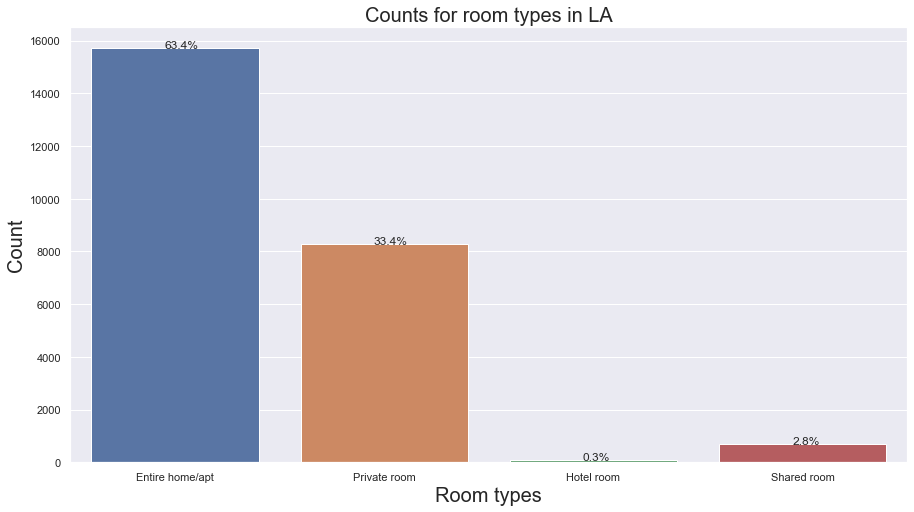

In [48]:
ax = sns.countplot(x = df_LA_out['room_type'])
plt.title('Counts for room types in LA' , fontsize = 20)
plt.xlabel('Room types' , fontsize = 20)
plt.ylabel("Count" , fontsize = 20)
total = len(df_LA_out['room_type'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y),size = 12)

**Interpretation:**
63.4% of room types are of Entire home/apt followed by Private rooms with 33.4% occupancy.

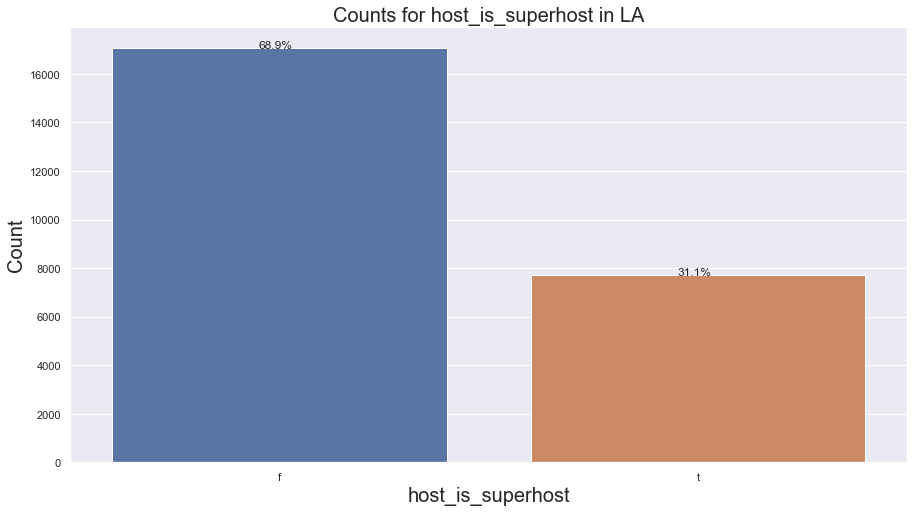

In [49]:
ax = sns.countplot(x = df_LA_out['host_is_superhost'])
plt.title('Counts for host_is_superhost in LA' , fontsize = 20)
plt.xlabel('host_is_superhost' , fontsize = 20)
plt.ylabel("Count" , fontsize = 20)
total = len(df_LA_out['host_is_superhost'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y),size = 12)

**Interpretation:**
68.9% of hosts are not superhosts,they are normal hosts

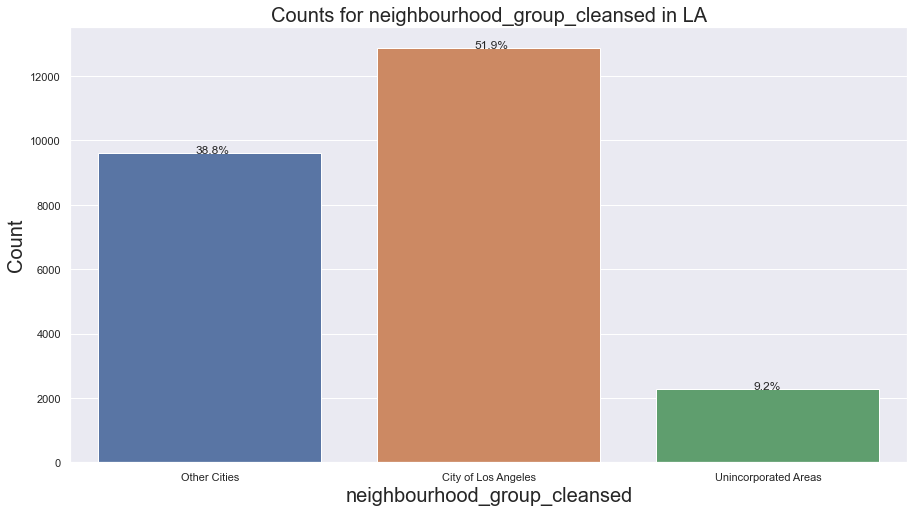

In [50]:
ax = sns.countplot(x = df_LA_out['neighbourhood_group_cleansed'])
plt.title('Counts for neighbourhood_group_cleansed in LA' , fontsize = 20)
plt.xlabel('neighbourhood_group_cleansed' , fontsize = 20)
plt.ylabel("Count" , fontsize = 20)
total = len(df_LA_out['neighbourhood_group_cleansed'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y),size = 12)

**Interpretation:**
City of Los Angeles holds 51.9% of neighbourhood

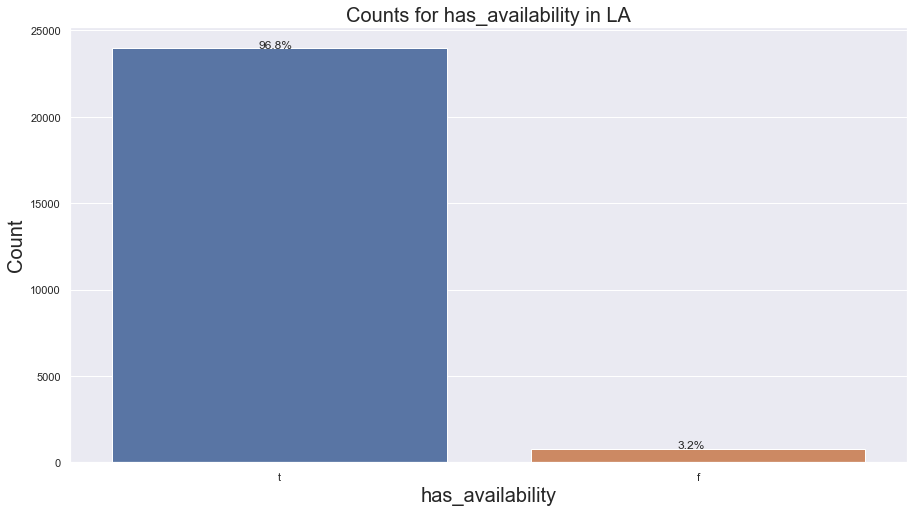

In [51]:
ax = sns.countplot(x = df_LA_out['has_availability'])
plt.title('Counts for has_availability in LA' , fontsize = 20)
plt.xlabel('has_availability' , fontsize = 20)
plt.ylabel("Count" , fontsize = 20)
total = len(df_LA_out['has_availability'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y),size = 12)

**Interpretation:**
96.8% of listings have availability

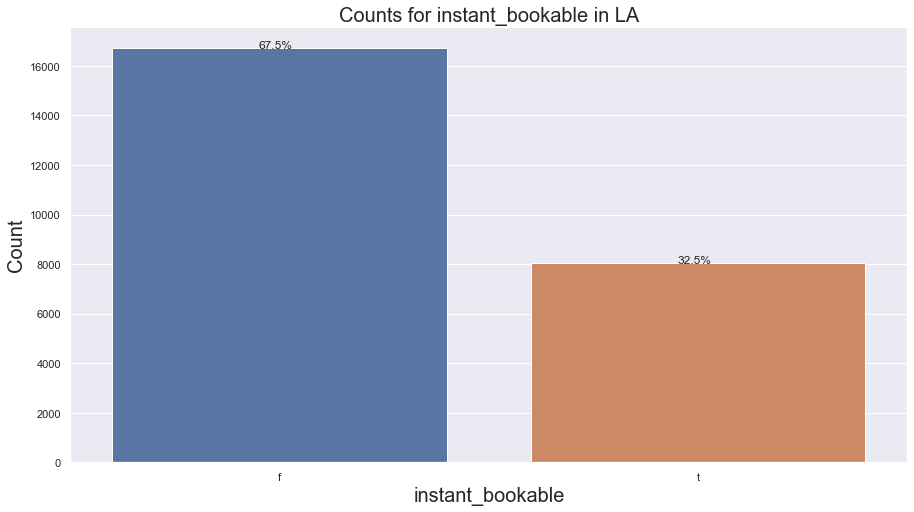

In [52]:
ax = sns.countplot(x = df_LA_out['instant_bookable'])
plt.title('Counts for instant_bookable in LA' , fontsize = 20)
plt.xlabel('instant_bookable' , fontsize = 20)
plt.ylabel("Count" , fontsize = 20)
total = len(df_LA_out['instant_bookable'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y),size = 12)

**Interpretation:**
Only 32.5% of listings are instantly bookable

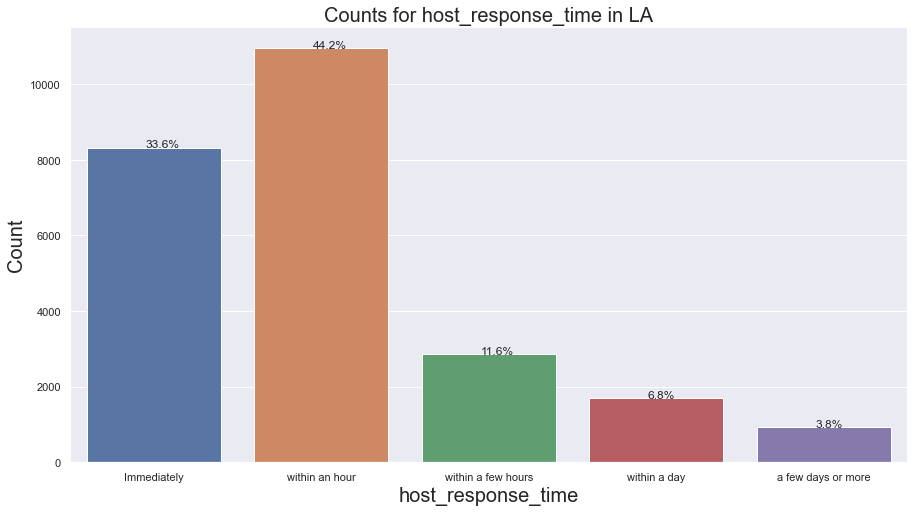

In [53]:
ax = sns.countplot(x = df_LA_out['host_response_time'])
plt.title('Counts for host_response_time in LA' , fontsize = 20)
plt.xlabel('host_response_time' , fontsize = 20)
plt.ylabel("Count" , fontsize = 20)
total = len(df_LA_out['host_response_time'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y),size = 12)

**Interpretation:**
44.2% of hosts responds within an hour

## Room Type distribution based on Neighbourhood groups - New York

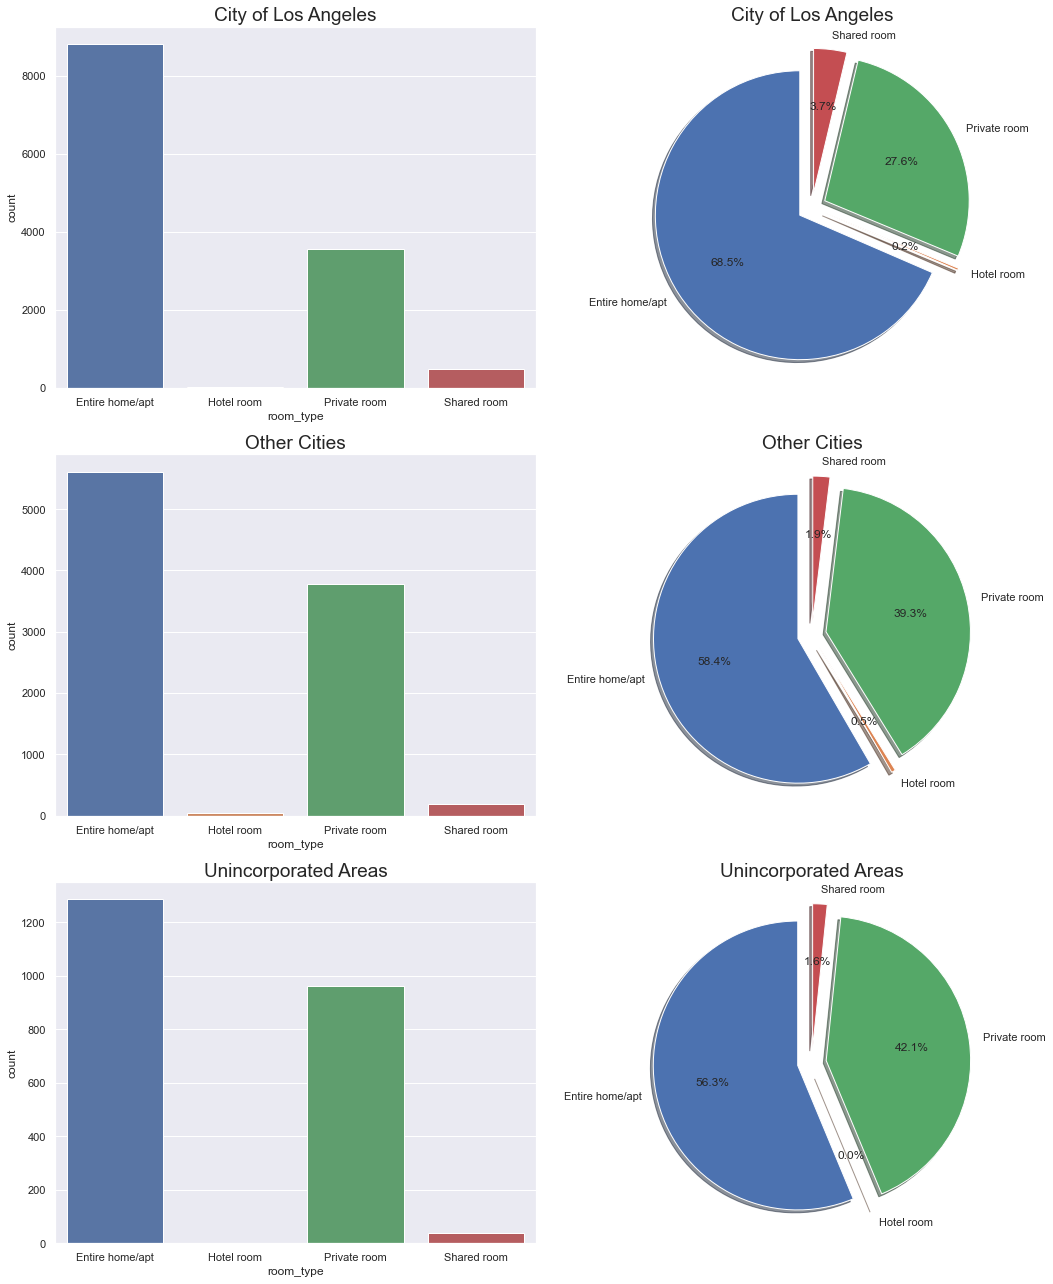

In [54]:
fig,ax=plt.subplots(3,2,figsize=(15,18));
cols=np.unique(df_LA_out["neighbourhood_group_cleansed"])
labels=np.unique(df_LA_out["room_type"])
index=0
explode=[0.1]*4

for i in range(3):
  ax[i][0].set_title(cols[index],fontsize=19);
  ax[i][1].set_title(cols[index],fontsize=19);
  df_ngc=df_LA_out.loc[df_LA_out["neighbourhood_group_cleansed"]==cols[index]]
  sns.countplot(df_ngc["room_type"],ax=ax[i][0],order=labels)
  total_room_types=df_ngc["room_type"].shape[0]
  sizes=[df_ngc.loc[df_ngc["room_type"]==i].shape[0]/total_room_types for i in labels]
  ax[i][1].pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)  

  index+=1


fig.tight_layout();


# Bivariate

In [55]:
df_LA_out.select_dtypes(include = np.object).columns

Index(['host_response_time', 'host_is_superhost',
       'neighbourhood_group_cleansed', 'room_type', 'has_availability',
       'instant_bookable'],
      dtype='object')

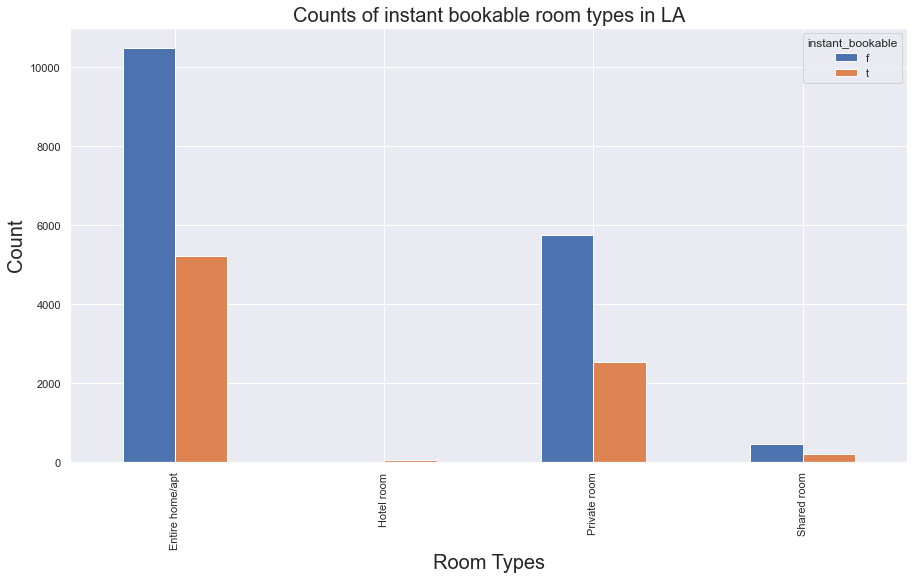

In [56]:
pd.crosstab(df_LA_out['room_type'],df_LA_out['instant_bookable']).plot(kind='bar')
plt.title('Counts of instant bookable room types in LA' , fontsize = 20)
plt.xlabel('Room Types' , fontsize = 20)
plt.ylabel("Count" , fontsize = 20)
plt.show()

**Interpretation:**
Instant booking facility ratio is very low for all room types except Hotel room 

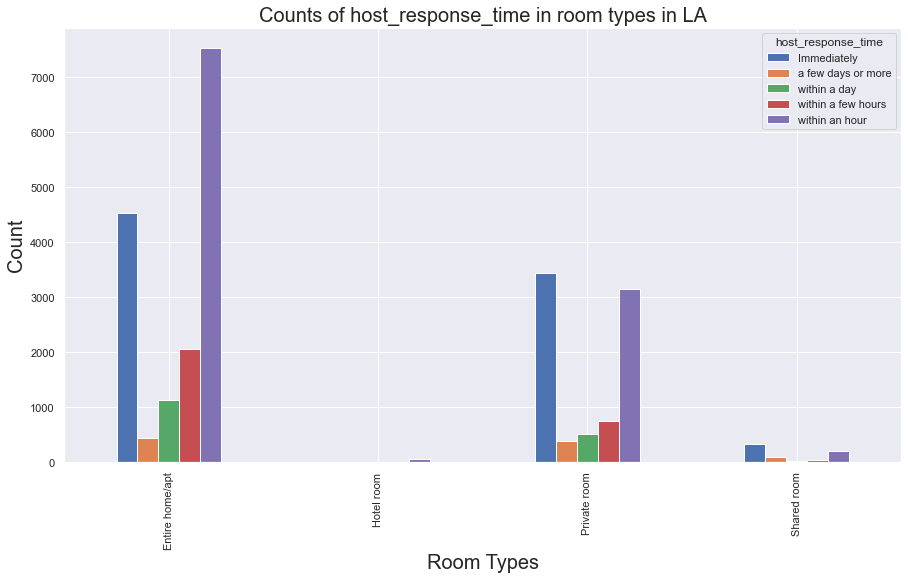

In [57]:
pd.crosstab(df_LA_out['room_type'],df_LA_out['host_response_time']).plot(kind='bar')
plt.title('Counts of host_response_time in room types in LA' , fontsize = 20)
plt.xlabel('Room Types' , fontsize = 20)
plt.ylabel("Count" , fontsize = 20)
plt.show()

**Interpretation:**
Hosts respond superquick in all room types

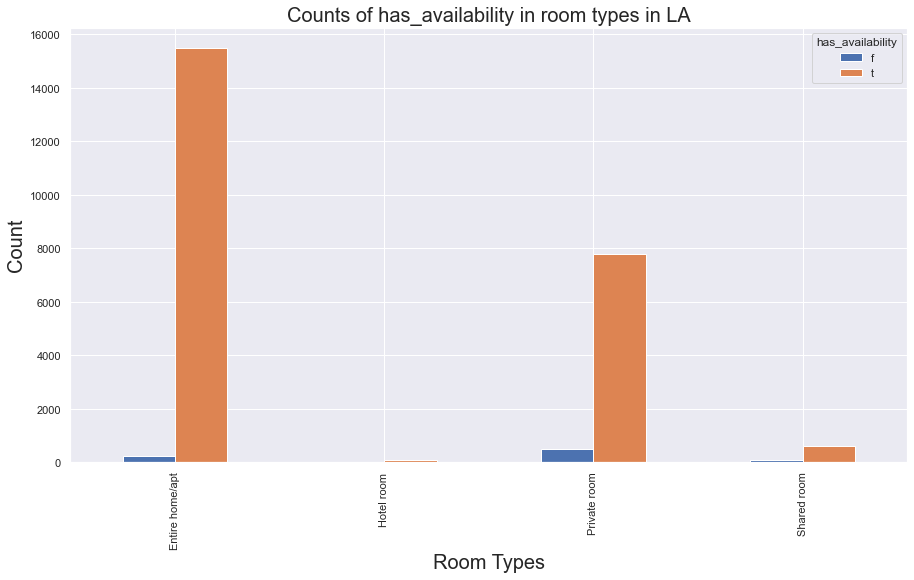

In [58]:
pd.crosstab(df_LA_out['room_type'],df_LA_out['has_availability']).plot(kind='bar')
plt.title('Counts of has_availability in room types in LA' , fontsize = 20)
plt.xlabel('Room Types' , fontsize = 20)
plt.ylabel("Count" , fontsize = 20)
plt.show()

**Interpretation:**
Availability ratio is very high for all room types

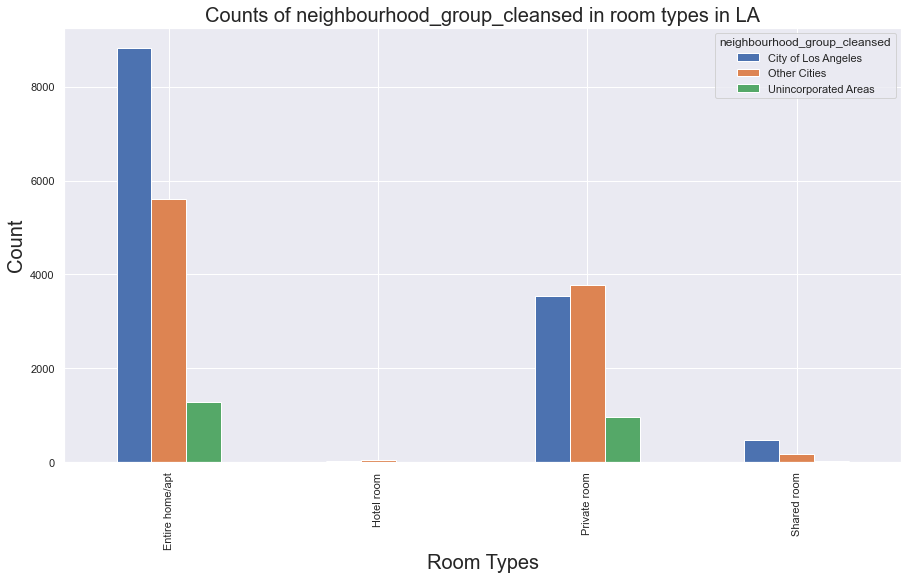

In [59]:
pd.crosstab(df_LA_out['room_type'],df_LA_out['neighbourhood_group_cleansed']).plot(kind='bar')
plt.title('Counts of neighbourhood_group_cleansed in room types in LA' , fontsize = 20)
plt.xlabel('Room Types' , fontsize = 20)
plt.ylabel("Count" , fontsize = 20)
plt.show()

**Interpretation:**<br>
Hotel rooms are available only in Other cities<br>
Entire home/apt type is more seen in City of Los Angeles,whereas Private rooms are seen more in Other cities

## Multivariate

In [60]:
df_LA_feature=df_LA_out.drop('price',axis=1)
df_LA_target=df_LA_out['price']


df_LA_cat=df_LA_feature.select_dtypes(include = np.object)
df_LA_num=df_LA_feature.select_dtypes(exclude = np.object)

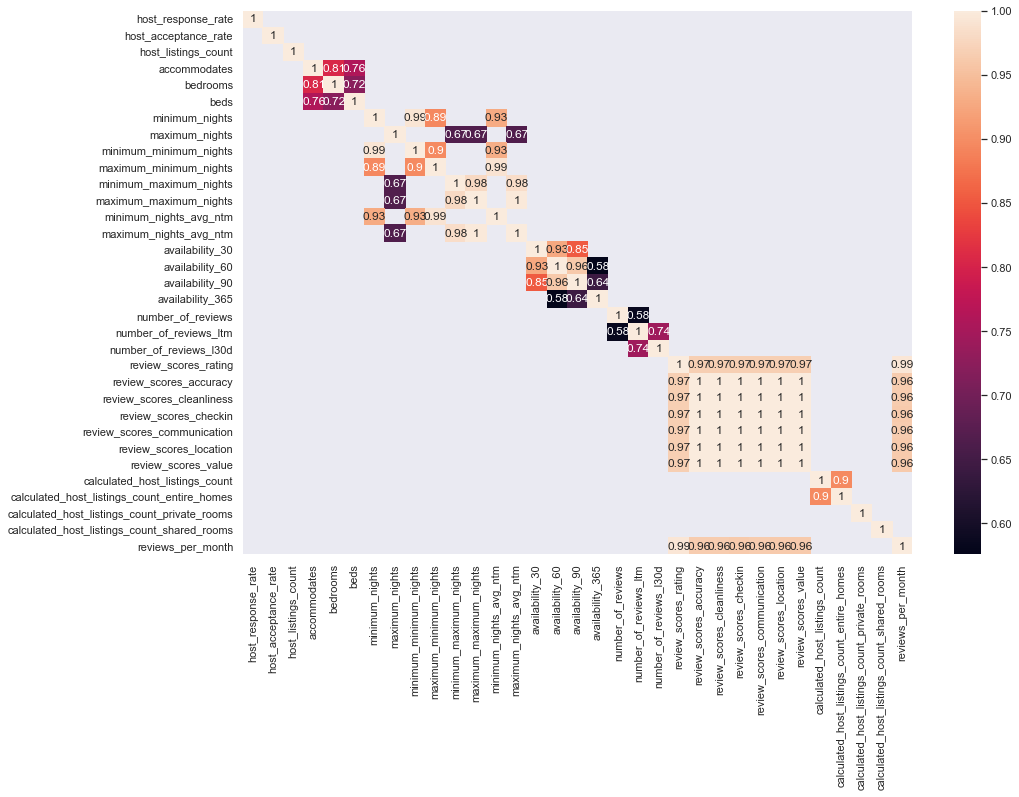

In [61]:
plt.figure(figsize=(15,10))
sns.heatmap(df_LA_num.corr()[np.abs(df_LA_num.corr())>0.5],annot=True)
plt.show()

## Assumptions before MLR model 

### 1.Mutlicollinearity

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
for ind in range(len(df_LA_num.columns)):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(df_LA_num.values, i) for i in range(df_LA_num.shape[1])]
    vif["Features"] = df_LA_num.columns
    multi = vif[vif['VIF_Factor'] > 10]
    if(multi.empty == False):
        df_sorted = multi.sort_values(by = 'VIF_Factor', ascending = False)
    else:
        print(vif)
        break
    if (df_sorted.empty == False):
        df_LA_num = df_LA_num.drop(df_sorted.Features.iloc[0], axis=1)
    else:
        print(vif)

    VIF_Factor                                      Features
0     6.401282                          host_acceptance_rate
1     1.225833                           host_listings_count
2     8.671206                                      bedrooms
3     6.803465                                          beds
4     8.361903                                minimum_nights
5     4.984720                                maximum_nights
6     8.088254                        maximum_minimum_nights
7     7.636395                        minimum_maximum_nights
8     2.397407                               availability_30
9     3.253525                              availability_365
10    2.030088                             number_of_reviews
11    3.632050                         number_of_reviews_ltm
12    2.770186                        number_of_reviews_l30d
13    1.386682   calculated_host_listings_count_entire_homes
14    1.237326  calculated_host_listings_count_private_rooms
15    1.081824   calcula

In [63]:
df_LA_num_sign = df_LA_num[vif['Features'].unique()]                           

In [64]:
df_LA_num_sign.shape

(24774, 17)

In [65]:
df_LA_cat.shape

(24774, 6)

In [66]:
df_LA_clean = pd.concat([df_LA_num_sign,df_LA_cat,df_LA_target],axis=1)

In [67]:
df_LA_clean.head()

,host_acceptance_rate,host_listings_count,bedrooms,beds,minimum_nights,maximum_nights,maximum_minimum_nights,minimum_maximum_nights,availability_30,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_response_time,host_is_superhost,neighbourhood_group_cleansed,room_type,has_availability,instant_bookable,price
0,100.000000,1.000000,2.000000,3.000000,30,730,30.000000,730.000000,0,193,2,0,0,1,0,0,0.020000,Immediately,f,Other Cities,Entire home/apt,t,f,115.000000
1,100.000000,2.000000,1.000000,1.000000,30,366,30.000000,1125.000000,6,300,33,6,1,0,2,0,0.700000,within an hour,t,City of Los Angeles,Private room,t,t,89.000000
2,33.000000,2.000000,1.000000,1.000000,7,28,7.000000,28.000000,22,357,21,0,0,1,1,0,0.360000,within an hour,t,Other Cities,Private room,t,f,167.000000
3,100.000000,1.000000,1.000000,1.000000,30,730,30.000000,1125.000000,0,0,0,0,0,1,0,0,100.000000,Immediately,f,Other Cities,Entire home/apt,t,t,50.000000
4,57.000000,6.000000,1.000000,2.000000,31,730,31.000000,730.000000,0,274,23,0,0,1,3,0,0.390000,within a few hours,f,City of Los Angeles,Entire home/apt,t,f,118.000000


In [68]:
df_LA_feature=df_LA_clean.drop('price',axis=1)
df_LA_target=df_LA_clean['price']


df_LA_cat=df_LA_feature.select_dtypes(include = np.object)
df_LA_num=df_LA_feature.select_dtypes(exclude = np.object)

# Feature Engineering

## Dummy Encode the Categorical Variables

In [69]:
dummy_var_LA = pd.get_dummies(data = df_LA_cat, drop_first = True)
dummy_var_LA = dummy_var_LA.reset_index(drop=True)

## Scale the Data

We scale the variables to get all the variables in the same range. With this, we can avoid a problem in which some features come to dominate solely because they tend to have larger values than others.

In [70]:
# initialize the standard scalar
X_scaler = StandardScaler()

# scale all the numeric variables
# standardize all the columns of the dataframe 'df_LA_num'
num_scaled_LA = X_scaler.fit_transform(df_LA_num)

# create a dataframe of scaled numerical variables
# pass the required column names to the parameter 'columns'
df_num_scaled_LA = pd.DataFrame(num_scaled_LA, columns = df_LA_num.columns)

# standardize the target variable explicitly and store it in a new variable 'y_LA_scaled'
y_LA_scaled = (df_LA_target - df_LA_target.mean()) / df_LA_target.std()
y_LA_scaled = y_LA_scaled.reset_index(drop=True)

## Concatenate scaled numerical and dummy encoded categorical variables.

In [71]:
# concat the dummy variables with numeric features to create a dataframe of all independent variables
# 'axis=1' concats the dataframes along columns 
X_LA = pd.concat([df_num_scaled_LA, dummy_var_LA], axis = 1)

# display first five observations
X_LA.head()

,host_acceptance_rate,host_listings_count,bedrooms,beds,minimum_nights,maximum_nights,maximum_minimum_nights,minimum_maximum_nights,availability_30,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_is_superhost_t,neighbourhood_group_cleansed_Other Cities,neighbourhood_group_cleansed_Unincorporated Areas,room_type_Hotel room,room_type_Private room,room_type_Shared room,has_availability_t,instant_bookable_t
0,0.509461,-0.197834,0.516511,0.747368,0.454996,0.167400,0.368220,-0.188457,-0.860605,0.198871,-0.503776,-0.491895,-0.453791,-0.297133,-0.353429,-0.126278,-0.568379,0,0,0,0,0,1,0,0,0,0,1,0
1,0.509461,-0.171315,-0.632455,-0.716292,0.454996,-0.552900,0.368220,0.662681,-0.339425,0.964600,-0.039150,-0.104794,0.150564,-0.391310,0.103939,-0.126278,-0.551332,0,0,0,1,1,0,0,0,1,0,1,1
2,-2.270935,-0.171315,-0.632455,-0.716292,-0.491850,-1.221749,-0.486277,-1.701113,1.050391,1.372512,-0.219005,-0.491895,-0.453791,-0.297133,-0.124745,-0.126278,-0.559856,0,0,0,1,1,1,0,0,1,0,1,0
3,0.509461,-0.197834,-0.632455,-0.716292,0.454996,0.167400,0.368220,0.662681,-0.860605,-1.182304,-0.533752,-0.491895,-0.453791,-0.297133,-0.353429,-0.126278,1.938060,0,0,0,0,0,1,0,0,0,0,1,1
4,-1.274972,-0.065239,-0.632455,0.015538,0.496164,0.167400,0.405372,-0.188457,-0.860605,0.778535,-0.189030,-0.491895,-0.453791,-0.297133,0.332622,-0.126278,-0.559104,0,0,1,0,0,0,0,0,0,0,1,0


## Train-Test Split

In [72]:
# set of independent variables
# create a copy of 'df_reimb_dummy' and store in the dataframe 'X_full_LA'
X_full_LA = X_LA.copy()

# dependent variable
# create a copy of 'df_target' and store in the dataframe 'y_full_LA'
y_full_LA = y_LA_scaled.copy()

# to estimate the regression coefficient, a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
X_full_LA = sm.add_constant(X_full_LA)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full_LA, y_full_LA, random_state=1, test_size = 0.3)

# checking the dimensions of the train & test subset
# print dimension of train set
print('X_train_full', X_train_full.shape)
print('y_train_full', y_train_full.shape)

# print dimension of test set
print('X_test_full', X_test_full.shape)
print('y_test_full', y_test_full.shape)

X_train_full (17341, 30)
y_train_full (17341,)
X_test_full (7433, 30)
y_test_full (7433,)


## Multiple Linear Regression (OLS) - LA

In [73]:
MLR_model_LA = sm.OLS(y_train_full, X_train_full).fit()
print(MLR_model_LA.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     574.6
Date:                Thu, 17 Mar 2022   Prob (F-statistic):               0.00
Time:                        09:12:16   Log-Likelihood:                -18822.
No. Observations:               17341   AIC:                         3.770e+04
Df Residuals:                   17311   BIC:                         3.794e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

**Interpretation:**<br>
Here it is inferred that R2 value is  - 49.0% <br>
So model has to be improved

In [74]:
y_pred_MLR_LA = MLR_model_LA.predict(X_train_full)

## Assumptions after MLR model 

### 1. Multicollinearity

Using VIF we filtered out columns which has multicollinearity

###  2. Linear Relationship

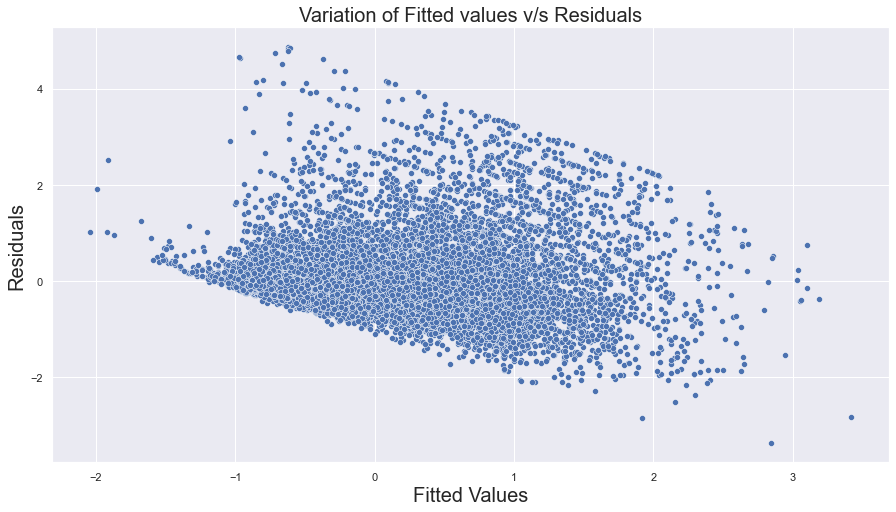

In [75]:
sns.scatterplot(x=y_pred_MLR_LA,y=MLR_model_LA.resid)
plt.title('Variation of Fitted values v/s Residuals' , fontsize = 20)
plt.xlabel('Fitted Values' , fontsize = 20)
plt.ylabel("Residuals" , fontsize = 20)
plt.show()

**Interpretation:** <br>
Scatterplot shows that there is a linear relationship between residuals and fitted values <br>
This implies that there is no linear relationship between dependent and independent variables

###  3. Autocorrelation

**Interpretation:** <br>
From the above OLS summary, we can observe that the value obtained from the `Durbin-Watson` test statistic is close to 2 (= 2.006). Thus, we conclude that there is no autocorrelation.

### 4. Homoscedasticity

Breusch-Pagan is one of the tests for detecting heteroskedasticity in the residuals.<br>
The test hypothesis for the Breusch-Pagan test is given as:
<p style='text-indent:25em'> <strong> H<sub>o</sub>:  There is homoscedasticity present in the data </strong> </p>
<p style='text-indent:25em'> <strong> H<sub>1</sub>:  There is a heteroscedasticity present in the data </strong> </p>

In [76]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

# create vector of result parmeters
name = ['f-value','p-value']

# perform Breusch-Pagan test using residuals and independent variables
# compute residuals using 'resid'
# 'exog' returns the independent variables in the model alng with the intercept
test = sms.het_breuschpagan(MLR_model_LA.resid, MLR_model_LA.model.exog)

# print the output
# use 'lzip' to zip the column names and test results
# use 'test[2:]' to retrieve the F-statistic and its corresponding p-value 
lzip(name, test[2:])

[('f-value', 46.42093212516458), ('p-value', 7.493106268354477e-255)]

In [77]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
name = ['f-value','p-value']
test = sms.het_breuschpagan(MLR_model_LA.resid, MLR_model_LA.model.exog)
lzip(name, test[2:])

[('f-value', 46.42093212516458), ('p-value', 7.493106268354477e-255)]

**Interpretation:** <br> We observe that the p-value is less than 0.05; thus, we conclude that there is heteroskedasticity present in the data.

### 5. Test for Normality

#### a. Q-Q Plot

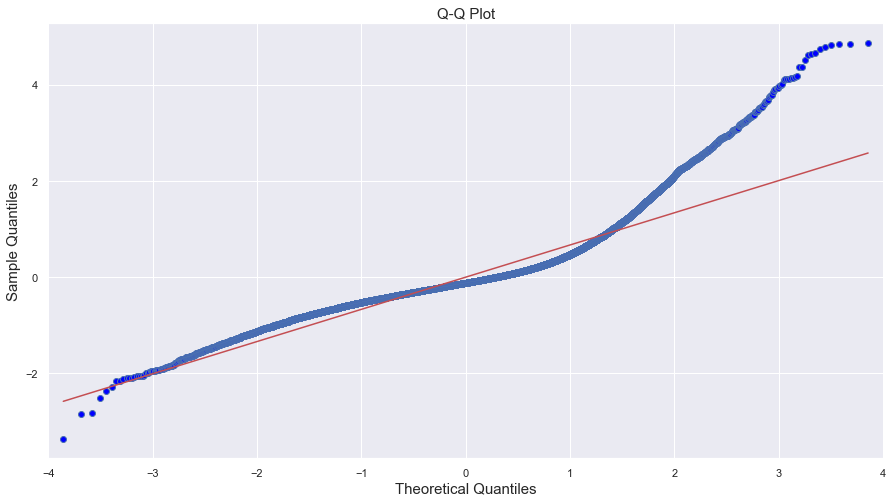

In [78]:
from statsmodels.graphics.gofplots import qqplot

# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

# plot the Q-Q plot
# 'r' represents the regression line
qqplot(MLR_model_LA.resid, line = 'r')

# set plot and axes labels
# set text size using 'fontsize'
plt.title('Q-Q Plot', fontsize = 15)
plt.xlabel('Theoretical Quantiles', fontsize = 15)
plt.ylabel('Sample Quantiles', fontsize = 15)

# display the plot
plt.show()

**Interpretation:** <br> The diagonal line (red line) is the regression line and the blue points are the cumulative distribution of the residuals. As some of the points are away from the diagonal line, we conclude that the residuals do not follow a `normal distribution`.

#### b. Jarque-Bera test

The Jarque-Bera test is used to check the normality of the residuals. The test hypothesis is given as:<br>

<p style='text-indent:25em'> <strong> H<sub>o</sub>:  Residuals are normally distributed </strong> </p>
<p style='text-indent:25em'> <strong> H<sub>1</sub>:  Residuals are not normally distributed </strong> </p>

In [79]:
from scipy.stats import jarque_bera

# perform Jarque-Bera test using 'jarque_bera()' from scipy library
# shapiro() returns a tuple having the values of test statistics and the corresponding p-value
# 'resid' returns the residuals in the model
# pass the residuals to 'jarque_bera()'
stat, p_value = jarque_bera(MLR_model_LA.resid)

# print the test statistic and corresponding p-value 
print('Test statistic:', stat)
print('P-Value:', p_value)

Test statistic: 30870.620680736083
P-Value: 0.0


**Interpretation:** <br> From the above test we can see that the p-value is 0.0 (less than 0.05), thus we can say that the residuals are not normally distributed.

#### Since normality condition is failed we have to apply transformation on the target column

## Logarithmic Transformation

In [80]:
df_LA_clean['price_box']=np.log(df_LA_clean[['price']])

In [81]:
df_LA_feature=df_LA_clean.drop(['price_box','price'],axis=1)
df_LA_target=df_LA_clean['price_box']


df_LA_cat=df_LA_feature.select_dtypes(include = np.object)
df_LA_num=df_LA_feature.select_dtypes(exclude = np.object)

df_LA_num_sign = df_LA_num[vif['Features'].unique()]             

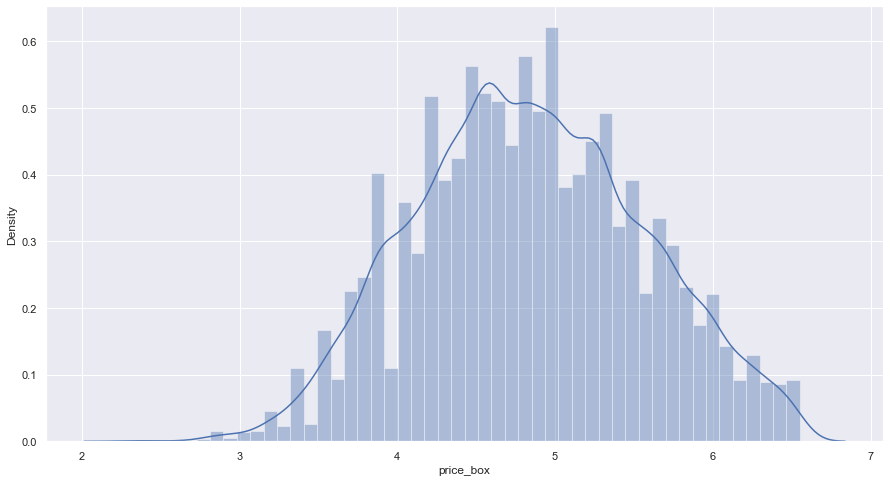

In [82]:
sns.distplot(df_LA_clean['price_box'])
plt.show()

In [83]:
print('Skewness before transformation for LA : ',df_LA_clean['price'].skew())
print('Skewness after transformation for LA : ',df_LA_clean['price_box'].skew())

Skewness before transformation for LA :  1.6728853657230882
Skewness after transformation for LA :  0.05883277201742937


**Interpretation:** <br>
From the above transformation it is observed that skewness of the data reached almost zero value,which means data distribution
is almost normal

## Dummy Encode the Categorical Variables

In [84]:
dummy_var_LA = pd.get_dummies(data = df_LA_cat, drop_first = True)
dummy_var_LA = dummy_var_LA.reset_index(drop=True)

## Scale the Data

We scale the variables to get all the variables in the same range. With this, we can avoid a problem in which some features come to dominate solely because they tend to have larger values than others.

In [85]:
# initialize the standard scalar
X_scaler = StandardScaler()

# scale all the numeric variables
# standardize all the columns of the dataframe 'df_LA_num'
num_scaled_LA = X_scaler.fit_transform(df_LA_num)

# create a dataframe of scaled numerical variables
# pass the required column names to the parameter 'columns'
df_num_scaled_LA = pd.DataFrame(num_scaled_LA, columns = df_LA_num.columns)

# standardize the target variable explicitly and store it in a new variable 'y_LA_scaled'
y_LA_scaled = (df_LA_target - df_LA_target.mean()) / df_LA_target.std()
y_LA_scaled = y_LA_scaled.reset_index(drop=True)

## Concatenate scaled numerical and dummy encoded categorical variables.

In [86]:
# concat the dummy variables with numeric features to create a dataframe of all independent variables
# 'axis=1' concats the dataframes along columns 
X_LA = pd.concat([df_num_scaled_LA, dummy_var_LA], axis = 1)

# display first five observations
X_LA.head()

,host_acceptance_rate,host_listings_count,bedrooms,beds,minimum_nights,maximum_nights,maximum_minimum_nights,minimum_maximum_nights,availability_30,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_is_superhost_t,neighbourhood_group_cleansed_Other Cities,neighbourhood_group_cleansed_Unincorporated Areas,room_type_Hotel room,room_type_Private room,room_type_Shared room,has_availability_t,instant_bookable_t
0,0.509461,-0.197834,0.516511,0.747368,0.454996,0.167400,0.368220,-0.188457,-0.860605,0.198871,-0.503776,-0.491895,-0.453791,-0.297133,-0.353429,-0.126278,-0.568379,0,0,0,0,0,1,0,0,0,0,1,0
1,0.509461,-0.171315,-0.632455,-0.716292,0.454996,-0.552900,0.368220,0.662681,-0.339425,0.964600,-0.039150,-0.104794,0.150564,-0.391310,0.103939,-0.126278,-0.551332,0,0,0,1,1,0,0,0,1,0,1,1
2,-2.270935,-0.171315,-0.632455,-0.716292,-0.491850,-1.221749,-0.486277,-1.701113,1.050391,1.372512,-0.219005,-0.491895,-0.453791,-0.297133,-0.124745,-0.126278,-0.559856,0,0,0,1,1,1,0,0,1,0,1,0
3,0.509461,-0.197834,-0.632455,-0.716292,0.454996,0.167400,0.368220,0.662681,-0.860605,-1.182304,-0.533752,-0.491895,-0.453791,-0.297133,-0.353429,-0.126278,1.938060,0,0,0,0,0,1,0,0,0,0,1,1
4,-1.274972,-0.065239,-0.632455,0.015538,0.496164,0.167400,0.405372,-0.188457,-0.860605,0.778535,-0.189030,-0.491895,-0.453791,-0.297133,0.332622,-0.126278,-0.559104,0,0,1,0,0,0,0,0,0,0,1,0


## Train-Test Split

In [87]:
# set of independent variables
# create a copy of 'df_reimb_dummy' and store in the dataframe 'X_full_LA'
X_full_LA = X_LA.copy()

# dependent variable
# create a copy of 'df_target' and store in the dataframe 'y_full_LA'
y_full_LA = y_LA_scaled.copy()

# to estimate the regression coefficient, a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
# X_full_LA = sm.add_constant(X_full_LA)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full_LA, y_full_LA, random_state=1, test_size = 0.3)

# checking the dimensions of the train & test subset
# print dimension of train set
print('X_train_full', X_train_full.shape)
print('y_train_full', y_train_full.shape)

# print dimension of test set
print('X_test_full', X_test_full.shape)
print('y_test_full', y_test_full.shape)

X_train_full (17341, 29)
y_train_full (17341,)
X_test_full (7433, 29)
y_test_full (7433,)


# Generalising functions for measure of performances

In [88]:
# create a generalized function to calculate the RMSE values for train set
def get_train_rmse(model):   
    
     # predict the output of the target variable from the train data 
    train_pred = model.predict(X_train_full)

    # calculate the MSE using the "mean_squared_error" function

    # MSE for the train data
    mse_train = mean_squared_error(y_train_full,train_pred)

    # take the square root of the MSE to calculate the RMSE
    # round the value upto 4 digits using 'round()'
    rmse_train = round(np.sqrt(mse_train), 4)
    
    # return the training RMSE
    return(rmse_train)

In [89]:
# create a generalized function to calculate the RMSE values test set
def get_test_rmse(model):

    # predict the output of the target variable from the test data
    test_pred = model.predict(X_test_full)


    # MSE for the test data
    mse_test = mean_squared_error(y_test_full,test_pred)

    # take the square root of the MSE to calculate the RMSE
    # round the value upto 4 digits using 'round()'
    rmse_test = round(np.sqrt(mse_test), 4)

    # return the test RMSE
    return(rmse_test)

In [90]:
# define a function to get R-squared and adjusted R-squared value
def get_train_score(model):      
    
    # score() returns the R-squared value
    r_sq = model.score(X_train_full, y_train_full)    # r2 is on the train data
    
    # calculate adjusted R-squared value
    # 'n' denotes number of observations in train set
    # 'shape[0]' returns number of rows 
    n = X_train_full.shape[0]
    
    # 'k' denotes number of variables in train set
    # 'shape[1]' returns number of columns
    k = X_train_full.shape[1]
    
    # calculate adjusted R-squared using the formula
    r_sq_adj = 1 - ((1-r_sq)*(n-1)/(n-k-1))
    
    # return the R-squared and adjusted R-squared value 
    return ([r_sq, r_sq_adj])    #returns a list of 2 values 

In [91]:
# define a function to get R-squared and adjusted R-squared value
def get_test_score(model):   
    
    # score() returns the R-squared value
    r_sq = model.score(X_test_full, y_test_full)    # r2 is on the test data
    
    # calculate adjusted R-squared value
    # 'n' denotes number of observations in train set
    # 'shape[0]' returns number of rows 
    n = X_test_full.shape[0]
    
    # 'k' denotes number of variables in train set
    # 'shape[1]' returns number of columns
    k = X_test_full.shape[1]
    
    # calculate adjusted R-squared using the formula
    r_sq_adj = 1 - ((1-r_sq)*(n-1)/(n-k-1))
    
    # return the R-squared and adjusted R-squared value 
    return ([r_sq, r_sq_adj])    #returns a list of 2 values 

In [92]:
# create an empty dataframe to store the scores for various algorithms
score_card = pd.DataFrame(columns=['Model_Name','Train_R_Squared','Test_R_Squared','Difference_R_Squared',
                                   'Train RMSE','Test_RMSE',"Difference_RMSE"])

# create a function to update the score card for comparision of the scores from different algorithms

def update_score_card(algorithm_name, model):
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Model_Name': algorithm_name,
                                    'Train_R_Squared': get_train_score(model)[0],
                                    'Test_R_Squared': get_test_score(model)[0],
                                    'Difference_R_Squared' :get_train_score(model)[0]-get_test_score(model)[0],
                                    'Train RMSE': get_train_rmse(model),
                                    'Test_RMSE': get_test_rmse(model), 
                                     'Difference_RMSE': get_train_rmse(model)-get_test_rmse(model)} , ignore_index = True)

# Creating different models

## 1. Linear Regression

In [93]:
# initiate linear regression model
linreg = LinearRegression()

# build the model using X_train and y_train
# use fit() to fit the regression model
MLR_model = linreg.fit(X_train_full, y_train_full)

# print the R-squared value for the model
# score() returns the R-squared value

print(MLR_model.score(X_train_full, y_train_full))
print(MLR_model.coef_)
MLR_model.intercept_

0.5970052289250285
[ 1.09056965e-03  3.77833768e-02  3.83986719e-01  2.01313477e-02
  7.07803091e-02  2.18849524e-02 -1.65911027e-01 -3.66252983e-02
  1.95305159e-01 -2.40956388e-03 -2.76692322e-02  3.83179575e-02
 -1.97502881e-02 -2.85413093e-02 -4.94191739e-02 -7.90539168e-02
  5.49921089e-02 -1.13597791e-01  1.81251864e-02 -7.99088232e-03
 -4.61090284e-03  1.28726445e-01 -2.10066908e-02 -1.28073766e-01
 -4.88028262e-01 -8.67071510e-01 -1.53780180e+00 -1.20238627e-01
 -5.53324815e-03]


0.44067551148897893

In [94]:
# print training RMSE
print('RMSE on train set: ', get_train_rmse(MLR_model))

# print training RMSE
print('RMSE on test set: ', get_test_rmse(MLR_model))

# calculate the difference between train and test set RMSE
difference = abs(get_test_rmse(MLR_model) - get_train_rmse(MLR_model))

# print the difference between train and test set RMSE
print('Difference between RMSE on train and test set: ', difference)

RMSE on train set:  0.6362
RMSE on test set:  0.6356
Difference between RMSE on train and test set:  0.0005999999999999339


In [95]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'Linear Regression', model = MLR_model)

# print the dataframe
score_card

,Model_Name,Train_R_Squared,Test_R_Squared,Difference_R_Squared,Train RMSE,Test_RMSE,Difference_RMSE
0,Linear Regression,0.597005,0.591822,0.005183,0.636200,0.635600,0.000600


## 2. Ridge Regression(Using Gridsearch CV)

In [96]:
# create a dictionary with hyperparameters and its values
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run
# tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 1e-4,1e-3, 1e-2, 0.1, 1, 5, 10, 20, 40, 60, 80, 100]}]
tuned_paramaters = [{'alpha':range(70,91)}]

# initiate the ridge regression model
ridge = Ridge()       #no parameters

# use GridSearchCV() to find the optimal value of alpha
# estimator: pass the ridge regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10

# to compare the algorithms for different values of alpha it needs a validation data
# so it evaluates the performance measure on each of the patch of validation data and takes the average
# for every value of alpha an average r2score is found by default else we need to give scoring function
# will return the Mean cross-validated score of the best_estimator


ridge_grid = GridSearchCV(estimator = ridge, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
ridge_grid.fit(X_train_full, y_train_full)     # after doing grid_search when we call fit it is done with the optimal parameters

# get the best parameters
print('Best parameters for Ridge Regression: ', ridge_grid.best_params_, '\n')

Best parameters for Ridge Regression:  {'alpha': 70} 



In [97]:
# update the dataframe 'score_card'

update_score_card(algorithm_name = 'Ridge Regression (using GridSearchCV)', 
                  model = ridge_grid)

#ridge_grid.best_params_['alpha']

# print the datarframe
score_card

,Model_Name,Train_R_Squared,Test_R_Squared,Difference_R_Squared,Train RMSE,Test_RMSE,Difference_RMSE
0,Linear Regression,0.597005,0.591822,0.005183,0.636200,0.635600,0.000600
1,Ridge Regression (using GridSearchCV),0.595006,0.590398,0.004607,0.637700,0.636700,0.001000


## 3. Lasso Regression(Using Gridsearch CV)

In [98]:
# create a dictionary with hyperparameters and its values
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20]}]
                     

# initiate the lasso regression model 
lasso = Lasso()

# use GridSearchCV() to find the optimal value of alpha
# estimator: pass the lasso regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
lasso_grid = GridSearchCV(estimator = lasso, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
lasso_grid.fit(X_train_full, y_train_full)

# get the best parameters
print('Best parameters for Lasso Regression: ', lasso_grid.best_params_, '\n')


Best parameters for Lasso Regression:  {'alpha': 0.0001} 



In [99]:
# update the dataframe 'score_card'

update_score_card(algorithm_name = 'Lasso Regression (using GridSearchCV)', 
                  model = lasso_grid)

# print the datarframe
score_card
#dir(lasso_grid)

,Model_Name,Train_R_Squared,Test_R_Squared,Difference_R_Squared,Train RMSE,Test_RMSE,Difference_RMSE
0,Linear Regression,0.597005,0.591822,0.005183,0.636200,0.635600,0.000600
1,Ridge Regression (using GridSearchCV),0.595006,0.590398,0.004607,0.637700,0.636700,0.001000
2,Lasso Regression (using GridSearchCV),0.596999,0.591886,0.005114,0.636200,0.635500,0.000700


## 4. Elastic Net Regression(Using Gridsearch CV)

In [100]:
# create a dictionary with hyperparameters and its values
# 'alpha' assigns the regularization strength to the model
# 'l1_ratio' is the ElasticNet mixing parameter
# 'max_iter' assigns maximum number of iterations for the model to run
tuned_paramaters = [{'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 5, 10,12, 15,25, 35, 20, 40, 60],
                      'l1_ratio':[0.0001, 0.0002, 0.001, 0.01, 0.1, 0.2]}]

# initiate the elastic net regression model  
enet = ElasticNet()     #dont assign hyperparameters here

# use GridSearchCV() to find the optimal value of alpha and l1_ratio
# estimator: pass the elastic net regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
enet_grid = GridSearchCV(estimator = enet, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
enet_grid.fit(X_train_full, y_train_full)

# get the best parameters
print('Best parameters for Elastic Net Regression: ', enet_grid.best_params_, '\n')

Best parameters for Elastic Net Regression:  {'alpha': 0.0001, 'l1_ratio': 0.2} 



In [101]:
# update the dataframe 'score_card'

update_score_card(algorithm_name = 'Elastic Net Regression (using GridSearchCV)', 
                  model = enet_grid)

# print the datarframe

score_card


,Model_Name,Train_R_Squared,Test_R_Squared,Difference_R_Squared,Train RMSE,Test_RMSE,Difference_RMSE
0,Linear Regression,0.597005,0.591822,0.005183,0.636200,0.635600,0.000600
1,Ridge Regression (using GridSearchCV),0.595006,0.590398,0.004607,0.637700,0.636700,0.001000
2,Lasso Regression (using GridSearchCV),0.596999,0.591886,0.005114,0.636200,0.635500,0.000700
3,Elastic Net Regression (using GridSearchCV),0.597002,0.591847,0.005155,0.636200,0.635600,0.000600


##  5. Linear Regression with RFE

In [102]:
# initiate linear regression model to use in feature selection
linreg_rfe = LinearRegression()

# build the RFE model
# pass the regression model to 'estimator'
# pass number of required features to 'n_features_to_select'
# if we do not pass the number of features, RFE considers half of the features

rfe_model = RFE(estimator=linreg_rfe)

# fit the RFE model on the training dataset using fit()
rfe_model = rfe_model.fit(X_train_full, y_train_full)

# print(rfe_model.support_)


# create a series containing feature and its corresponding rank obtained from RFE
# 'ranking_' returns the rank of each variable after applying RFE
# pass the ranks as the 'data' of a series
# 'index' assigns feature names as index of a series 

feat_index = pd.Series(data = rfe_model.ranking_, index = X_train_full.columns)
#print(feat_index)

# select the features with rank = 1
# 'index' returns the indices of a series (i.e. features with rank=1) 
signi_feat_rfe = feat_index[feat_index==1].index

# print the significant features obtained from RFE
print(signi_feat_rfe)

Index(['bedrooms', 'minimum_nights', 'maximum_minimum_nights',
       'availability_30', 'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month',
       'host_response_time_a few days or more', 'host_is_superhost_t',
       'neighbourhood_group_cleansed_Unincorporated Areas',
       'room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room', 'has_availability_t'],
      dtype='object')


In [103]:
# store the X_train with significant variables in new_X_train
new_X_train = X_train_full[signi_feat_rfe]

# initiate linear regression
linreg_RFE = LinearRegression()

# build the model using new_X_train and y_train
linreg_RFE.fit(new_X_train, y_train_full)

LinearRegression()

In [104]:
ypred_train=linreg_RFE.predict(new_X_train)    #  dont give y_train
mean_squared_error(y_train_full, ypred_train)

0.4077803278965063

In [105]:
new_X_test = X_test_full[signi_feat_rfe]
ypred_test=linreg_RFE.predict(new_X_test)    #  dont give y_train
mean_squared_error(y_test_full, ypred_test)

0.4082322119321595

In [106]:
 mean_squared_error(y_train_full, ypred_train) - mean_squared_error(y_test_full, ypred_test)

-0.0004518840356532161

In [107]:
r_sq_train = linreg_RFE.score(new_X_train, y_train_full)
r_sq_test = linreg_RFE.score(new_X_test, y_test_full)

In [108]:
score_card = score_card.append({'Model_Name': 'Linear Regression with RFE',
                                'Train_R_Squared' : r_sq_train,
                                'Test_R_Squared' : r_sq_test,
                                'Difference_R_Squared' : r_sq_train-r_sq_test,
                       'Train RMSE': mean_squared_error(y_train_full, ypred_train),
                       'Test_RMSE': mean_squared_error(y_test_full, ypred_test), 
                    
                        'Difference_RMSE':  mean_squared_error(y_train_full, ypred_train) - mean_squared_error(y_test_full, ypred_test)} , 
                               ignore_index = True)
score_card

,Model_Name,Train_R_Squared,Test_R_Squared,Difference_R_Squared,Train RMSE,Test_RMSE,Difference_RMSE
0,Linear Regression,0.597005,0.591822,0.005183,0.636200,0.635600,0.000600
1,Ridge Regression (using GridSearchCV),0.595006,0.590398,0.004607,0.637700,0.636700,0.001000
2,Lasso Regression (using GridSearchCV),0.596999,0.591886,0.005114,0.636200,0.635500,0.000700
3,Elastic Net Regression (using GridSearchCV),0.597002,0.591847,0.005155,0.636200,0.635600,0.000600
4,Linear Regression with RFE,0.593934,0.587515,0.006420,0.407780,0.408232,-0.000452


## 6. Decision Tree Regressor

In [131]:
tuned_paramaters = [{'criterion': ['mse'], 
                     'max_depth': range(2, 10),
                     'max_features': ["sqrt", "log2"],
                     'min_samples_split': range(2,10),
                     'min_samples_leaf': range(1,10),
                     'max_leaf_nodes': range(1, 10)}]

decision_tree_regression = DecisionTreeRegressor(random_state = 10)

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the decision tree regressor model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5

tree_grid = GridSearchCV(estimator = decision_tree_regression, 
                         param_grid = tuned_paramaters, 
                         cv = 5)

# fit the model on X_train and y_train using fit()
tree_grid_model = tree_grid.fit(X_train_full, y_train_full)

# get the best parameters
print('Best parameters for decision tree regressor: ', tree_grid_model.best_params_, '\n')

Best parameters for decision tree regressor:  {'criterion': 'mse', 'max_depth': 4, 'max_features': 'sqrt', 'max_leaf_nodes': 9, 'min_samples_leaf': 1, 'min_samples_split': 2} 


In [110]:
# refit the model using tuned hyperparameters:

decision_tree_regression = DecisionTreeRegressor(criterion= 'mse', 
                     max_depth= 4,
                     max_features= "sqrt",
                     min_samples_split= 2,
                     min_samples_leaf= 1,
                     max_leaf_nodes= 9,random_state = 10)

# fit the model on X_train and y_train using fit()
tree_grid_model = decision_tree_regression.fit(X_train_full, y_train_full)

# update the dataframe 'score_card'
update_score_card(algorithm_name = 'Decision Tree Regressor', 
                  model = tree_grid_model)

# print the datarframe

score_card


,Model_Name,Train_R_Squared,Test_R_Squared,Difference_R_Squared,Train RMSE,Test_RMSE,Difference_RMSE
0,Linear Regression,0.597005,0.591822,0.005183,0.636200,0.635600,0.000600
1,Ridge Regression (using GridSearchCV),0.595006,0.590398,0.004607,0.637700,0.636700,0.001000
2,Lasso Regression (using GridSearchCV),0.596999,0.591886,0.005114,0.636200,0.635500,0.000700
3,Elastic Net Regression (using GridSearchCV),0.597002,0.591847,0.005155,0.636200,0.635600,0.000600
4,Linear Regression with RFE,0.593934,0.587515,0.006420,0.407780,0.408232,-0.000452
5,Decision Tree Regressor,0.426360,0.424603,0.001756,0.759000,0.754600,0.004400


## 7. Random Forest Regressor

In [132]:
tuned_paramaters = [{'criterion': ['mse'], 
                     'max_depth': range(2, 10),
                     'max_features': ["sqrt", "log2"],
                     'min_samples_split': [2, 5, 8, 11,14,16],
                     'min_samples_leaf': [1, 5, 8,10,13,15],
                        'n_estimators':[50, 80, 100, 120, 150],
                     'max_leaf_nodes': range(1, 10)}]

rf_grid_model = RandomForestRegressor(random_state = 10)

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the random forest regressor model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5

rf_grid_model1 = GridSearchCV(estimator = rf_grid_model, 
                         param_grid = tuned_paramaters, 
                         cv = 5)

# fit the model on X_train and y_train using fit()
rf_grid_model2 = rf_grid_model1.fit(X_train_full, y_train_full)

# get the best parameters
print('Best parameters for Random Forest Regressor: ', rf_grid_model2.best_params_, '\n')

Best parameters for Random Forest Regressor:  {'criterion': 'mse', 'max_depth': 4, 'max_features': 'sqrt', 'max_leaf_nodes': 9, 'min_samples_leaf': 10, 'min_samples_split': 14, 'n_estimators': 100} 


In [112]:
# refit the model using tuned hyperparameters:

random_forest_regression = RandomForestRegressor(criterion='mse',max_depth=4,max_features='sqrt',max_leaf_nodes=9,
                                                 min_samples_leaf=10,min_samples_split=14,n_estimators=100,
                                                 random_state = 10)

rf_grid_model = random_forest_regression.fit(X_train_full, y_train_full)

update_score_card(algorithm_name = 'Random Forest Regressor', 
                  model = rf_grid_model)

# print the datarframe

score_card

,Model_Name,Train_R_Squared,Test_R_Squared,Difference_R_Squared,Train RMSE,Test_RMSE,Difference_RMSE
0,Linear Regression,0.597005,0.591822,0.005183,0.636200,0.635600,0.000600
1,Ridge Regression (using GridSearchCV),0.595006,0.590398,0.004607,0.637700,0.636700,0.001000
2,Lasso Regression (using GridSearchCV),0.596999,0.591886,0.005114,0.636200,0.635500,0.000700
3,Elastic Net Regression (using GridSearchCV),0.597002,0.591847,0.005155,0.636200,0.635600,0.000600
4,Linear Regression with RFE,0.593934,0.587515,0.006420,0.407780,0.408232,-0.000452
5,Decision Tree Regressor,0.426360,0.424603,0.001756,0.759000,0.754600,0.004400
6,Random Forest Regressor,0.540516,0.539814,0.000702,0.679300,0.674900,0.004400


## 8. Bagging Regressor

In [113]:
bagging_regression = BaggingRegressor(n_estimators=100,random_state=1)
bagging_grid_model = bagging_regression.fit(X_train_full, y_train_full)

update_score_card(algorithm_name = 'Bagging Regressor', 
                  model = bagging_grid_model)

# print the datarframe

score_card

,Model_Name,Train_R_Squared,Test_R_Squared,Difference_R_Squared,Train RMSE,Test_RMSE,Difference_RMSE
0,Linear Regression,0.597005,0.591822,0.005183,0.636200,0.635600,0.000600
1,Ridge Regression (using GridSearchCV),0.595006,0.590398,0.004607,0.637700,0.636700,0.001000
2,Lasso Regression (using GridSearchCV),0.596999,0.591886,0.005114,0.636200,0.635500,0.000700
3,Elastic Net Regression (using GridSearchCV),0.597002,0.591847,0.005155,0.636200,0.635600,0.000600
4,Linear Regression with RFE,0.593934,0.587515,0.006420,0.407780,0.408232,-0.000452
5,Decision Tree Regressor,0.426360,0.424603,0.001756,0.759000,0.754600,0.004400
6,Random Forest Regressor,0.540516,0.539814,0.000702,0.679300,0.674900,0.004400
7,Bagging Regressor,0.941136,0.673700,0.267436,0.243100,0.568300,-0.325200


## 9. XGBoost

In [133]:
tuning_parameters = {'learning_rate': [0.1, 0.15, 0.2, 0.25, 0.3],
                     'n_estimators' : [50,80,100,120,150],
                     'max_depth': range(3,10),
                     'gamma': [0.1, 0.15, 0.2, 0.25, 0.3]}

xgb_model = XGBRegressor()

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the XGBoost regressor model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5

xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, cv = 3, scoring = 'r2')

# fit the model on X_train and y_train using fit()
xgb_grid.fit(X_train_full, y_train_full)

# get the best parameters
print('Best parameters for XGBoost Regressor: ', xgb_grid.best_params_, '\n')

Best parameters for XGBoost Regressor:  {'gamma': 0.15, 'learning_rate': 0.15, 'max_depth': 6, 'n_estimators': 100}


In [115]:
# refit the model using tuned hyperparameters:

xgb_regression = XGBRegressor(random_state=1,gamma=0.15,max_depth=6,n_estimators =100,learning_rate =0.15)

# fit the model using fit() on train data
xgb_grid_model=xgb_regression.fit(X_train_full, y_train_full)


update_score_card(algorithm_name = 'XGBoost Regressor', 
                  model = xgb_grid_model)

# print the datarframe

score_card

,Model_Name,Train_R_Squared,Test_R_Squared,Difference_R_Squared,Train RMSE,Test_RMSE,Difference_RMSE
0,Linear Regression,0.597005,0.591822,0.005183,0.636200,0.635600,0.000600
1,Ridge Regression (using GridSearchCV),0.595006,0.590398,0.004607,0.637700,0.636700,0.001000
2,Lasso Regression (using GridSearchCV),0.596999,0.591886,0.005114,0.636200,0.635500,0.000700
3,Elastic Net Regression (using GridSearchCV),0.597002,0.591847,0.005155,0.636200,0.635600,0.000600
4,Linear Regression with RFE,0.593934,0.587515,0.006420,0.407780,0.408232,-0.000452
5,Decision Tree Regressor,0.426360,0.424603,0.001756,0.759000,0.754600,0.004400
6,Random Forest Regressor,0.540516,0.539814,0.000702,0.679300,0.674900,0.004400
7,Bagging Regressor,0.941136,0.673700,0.267436,0.243100,0.568300,-0.325200
8,XGBoost Regressor,0.769526,0.688774,0.080753,0.481100,0.555000,-0.073900


## Cross validation

In [116]:
cross_scores = []

score_LR = cross_val_score(linreg,X_train_full,y_train_full,cv =10)
cross_scores.append(score_LR.mean())

score_Ridge = cross_val_score(ridge_grid,X_train_full,y_train_full,cv =10)
cross_scores.append(score_Ridge.mean())

score_Lasso = cross_val_score(lasso_grid,X_train_full,y_train_full,cv =10)
cross_scores.append(score_Lasso.mean())

score_Enet = cross_val_score(enet_grid,X_train_full,y_train_full,cv =10)
cross_scores.append(score_Enet.mean())

score_RFE = cross_val_score(linreg_RFE,new_X_train,y_train_full,cv =10)
cross_scores.append(score_RFE.mean())

score_DT = cross_val_score(decision_tree_regression,X_train_full,y_train_full,cv=10)
cross_scores.append(score_DT.mean())

score_RF = cross_val_score(random_forest_regression,X_train_full,y_train_full,cv=10)
cross_scores.append(score_RF.mean())

score_BG = cross_val_score(bagging_regression,X_train_full,y_train_full,cv=10)
cross_scores.append(score_BG.mean())

score_XG = cross_val_score(xgb_regression,X_train_full,y_train_full,cv=10)
cross_scores.append(score_XG.mean())

cross_scores

[0.594978203942774,
 0.5926932405442844,
 0.5949850581310306,
 0.5949799550624915,
 0.5926518860776497,
 0.4242810009796266,
 0.5399419576253273,
 0.6624161788607863,
 0.6818059670252934]

In [117]:
cross_scores = pd.Series(cross_scores)
cross_validation_scores = pd.concat([score_card['Model_Name'],cross_scores],
                                       keys=['Model_Name','Avg_Cross_Validation_Score'],axis=1)
cross_validation_scores

,Model_Name,Avg_Cross_Validation_Score
0,Linear Regression,0.594978
1,Ridge Regression (using GridSearchCV),0.592693
2,Lasso Regression (using GridSearchCV),0.594985
3,Elastic Net Regression (using GridSearchCV),0.594980
4,Linear Regression with RFE,0.592652
5,Decision Tree Regressor,0.424281
6,Random Forest Regressor,0.539942
7,Bagging Regressor,0.662416
8,XGBoost Regressor,0.681806


## Analysis of Algorithms

In [118]:
def highlight_greaterthan(s, threshold, column):
    is_max = pd.Series(data=False, index=s.index)
    is_max[column] = s.loc[column] >= threshold
    return ['background-color: yellow' if is_max.any() else '' for v in is_max]


score_card.style.apply(highlight_greaterthan, threshold=0.08, column=['Difference_R_Squared'], axis=1)

,Model_Name,Train_R_Squared,Test_R_Squared,Difference_R_Squared,Train RMSE,Test_RMSE,Difference_RMSE
0,Linear Regression,0.597005,0.591822,0.005183,0.636200,0.635600,0.000600
1,Ridge Regression (using GridSearchCV),0.595006,0.590398,0.004607,0.637700,0.636700,0.001000
2,Lasso Regression (using GridSearchCV),0.596999,0.591886,0.005114,0.636200,0.635500,0.000700
3,Elastic Net Regression (using GridSearchCV),0.597002,0.591847,0.005155,0.636200,0.635600,0.000600
4,Linear Regression with RFE,0.593934,0.587515,0.006420,0.407780,0.408232,-0.000452
5,Decision Tree Regressor,0.426360,0.424603,0.001756,0.759000,0.754600,0.004400
6,Random Forest Regressor,0.540516,0.539814,0.000702,0.679300,0.674900,0.004400
7,Bagging Regressor,0.941136,0.673700,0.267436,0.243100,0.568300,-0.325200
8,XGBoost Regressor,0.769526,0.688774,0.080753,0.481100,0.555000,-0.073900


In [119]:
def highlight_greaterthan(s, threshold, column):
    is_max = pd.Series(data=False, index=s.index)
    is_max[column] = s.loc[column] >= threshold
    return ['background-color: yellow' if is_max.any() else '' for v in is_max]


cross_validation_scores.style.apply(highlight_greaterthan, threshold=0.6, column=['Avg_Cross_Validation_Score'], axis=1)

,Model_Name,Avg_Cross_Validation_Score
0,Linear Regression,0.594978
1,Ridge Regression (using GridSearchCV),0.592693
2,Lasso Regression (using GridSearchCV),0.594985
3,Elastic Net Regression (using GridSearchCV),0.594980
4,Linear Regression with RFE,0.592652
5,Decision Tree Regressor,0.424281
6,Random Forest Regressor,0.539942
7,Bagging Regressor,0.662416
8,XGBoost Regressor,0.681806


### Inference

From the analysis of Algorithm performance and cross validation scores,we can observe that Random Forest Regressor and XGBoost
Regressor gives better output.

Model Performances:<br>

           Model_Name        Train_R_Sq	   Test_R_Sq	Difference_R_Sq	  Train RMSE	Test_RMSE	Difference_RMSE
           
        XGBoost Regressor	    0.770	      0.689	       0.08	             0.481	       0.555	     -0.074
        
    Random Forest Regressor	  0.764	      0.667	       0.097                0.487	       0.574	     -0.087      
    
    
<br>Average Cross Validation Scores:<br>


           Model_Name	          Avg_Cross_Validation_Score

	Random Forest Regressor             	0.657

	    XGBoost Regressor	               0.681
        

#### From these result we can conclude that XGBoost Regressor gives best performances with least difference in Train and Test R-Square values and high average Cross Validation Score


## Implementing model on Train and Test Data

In [150]:
def model_check_train(model,model_name):
    
    print('Model Name : ',model_name)
    
    print('Dataset : train data')
    
    predicts = model.predict(X_train_full)
    
    m= ((y_train_full * df_LA_target.std()) + df_LA_target.mean())
    n = np.exp(m)     
    n = pd.DataFrame(n,index=y_train_full.index)
    n.rename(columns={'price_box':'price_actual_train'},inplace=True)
    
    a= ((predicts * df_LA_target.std()) + df_LA_target.mean())
    b =  np.exp(a)     
    b= pd.DataFrame(b,columns=['price_predicted_train'],index=y_train_full.index)

    
    error_airbnb_train = pd.concat([n,b],axis=1)
    
    error_airbnb_train['Difference'] = error_airbnb_train['price_actual_train'] - error_airbnb_train['price_predicted_train']
    
    error_airbnb_train = error_airbnb_train[(error_airbnb_train['Difference']>-50)  & (error_airbnb_train['Difference']<50)]
    
    return(error_airbnb_train.head(10))

In [151]:
def model_check_test(model,model_name):
    
    print('Model Name : ',model_name)
    
    print('Dataset : test data')
    
    predicts = model.predict(X_test_full)
    
    m= ((y_test_full * df_LA_target.std()) + df_LA_target.mean())
    n = np.exp(m)    
    n= pd.DataFrame(n,index=y_test_full.index)
    n.rename(columns={'price_box':'price_actual_test'},inplace=True)
    
    a= ((predicts * df_LA_target.std()) + df_LA_target.mean())
    b = np.exp(a)   
    b= pd.DataFrame(b,columns=['price_predicted_test'],index=y_test_full.index)

    
    error_airbnb_test = pd.concat([n,b],axis=1)
    
    error_airbnb_test['Difference'] = error_airbnb_test['price_actual_test'] - error_airbnb_test['price_predicted_test']
    
    error_airbnb_test = error_airbnb_test[(error_airbnb_test['Difference']>-70)  & (error_airbnb_test['Difference']<70)]
    
    return(error_airbnb_test.head(10))

In [152]:
model_check_train(xgb_grid_model,'XGBoost Regressor')

Model Name :  XGBoost Regressor
Dataset : train data


,price_actual_train,price_predicted_train,Difference
10698,32.000000,50.734066,-18.734066
10161,95.000000,104.259750,-9.259750
18631,198.000000,199.968063,-1.968063
13503,22.000000,25.087223,-3.087223
23176,80.000000,76.338135,3.661865
10111,88.000000,132.475891,-44.475891
5994,75.000000,64.542137,10.457863
10691,90.000000,93.856018,-3.856018
19308,60.000000,78.707718,-18.707718
19496,108.000000,115.466232,-7.466232


In [153]:
model_check_test(xgb_grid_model,'XGBoost Regressor')

Model Name :  XGBoost Regressor
Dataset : test data


,price_actual_test,price_predicted_test,Difference
15824,100.000000,73.188507,26.811493
3397,90.000000,102.938866,-12.938866
7529,257.000000,254.492859,2.507141
23683,116.000000,126.813820,-10.813820
6821,95.000000,107.009323,-12.009323
7837,107.000000,142.643173,-35.643173
4736,35.000000,34.869785,0.130215
3854,169.000000,143.551712,25.448288
4755,220.000000,159.358978,60.641022
19782,200.000000,175.272812,24.727188


## Selection of Significant Features from XGBoost Regressor

In [124]:
from sklearn.feature_selection import SelectFromModel

In [125]:
sel = SelectFromModel(XGBRegressor(random_state=1,gamma=0.15,max_depth=6,n_estimators =100,learning_rate =0.15),
                      threshold='median')
sel.fit(X_train_full, y_train_full)

selected_feat_median= X_train_full.columns[(sel.get_support())]

print('Number of significant features :',len(selected_feat_median),'\n\n')

print('Significant Features are :\n')

for i in selected_feat_median:
    print(i)

Number of significant features : 15 


Significant Features are :

bedrooms
beds
minimum_nights
maximum_minimum_nights
minimum_maximum_nights
availability_30
calculated_host_listings_count_entire_homes
calculated_host_listings_count_private_rooms
calculated_host_listings_count_shared_rooms
host_is_superhost_t
neighbourhood_group_cleansed_Other Cities
neighbourhood_group_cleansed_Unincorporated Areas
room_type_Private room
room_type_Shared room
instant_bookable_t


In [126]:
X_train_sig_XGB_median = X_train_full[selected_feat_median].reset_index(drop=True)

X_test_sig_XGB_median = X_test_full[selected_feat_median].reset_index(drop=True)


xgb_regression = XGBRegressor(random_state=1,gamma=0.15,max_depth=6,n_estimators =100,learning_rate =0.15)

# fit the model using fit() on train data
xgb_grid_model_median = xgb_regression.fit(X_train_sig_XGB_median, y_train_full)

train_pred = xgb_grid_model_median.predict(X_train_sig_XGB_median)
mse_train = mean_squared_error(y_train_full,train_pred)
rmse_train = round(np.sqrt(mse_train), 4)  
print('Train RMSE(for median):',rmse_train)

    
test_pred = xgb_grid_model_median.predict(X_test_sig_XGB_median)  
mse_test = mean_squared_error(y_test_full,test_pred)
rmse_test = round(np.sqrt(mse_test), 4)
print('\nTest RMSE(for median): ',rmse_test)

print('\nDifference_RMSE: ',rmse_train-rmse_test)


r_sq_train = xgb_grid_model_median.score(X_train_sig_XGB_median, y_train_full)    
# n = X_train_sig_RF_median.shape[0]    
# k = X_train_sig_RF_median.shape[1] 
# r_sq_adj = 1 - ((1-r_sq_train)*(n-1)/(n-k-1))

r_sq_test = xgb_grid_model_median.score(X_test_sig_XGB_median, y_test_full) 
 
print ('\n\nTrain R Sq value: ',r_sq_train)    
print ('\nTest R Sq value: ',r_sq_test) 
print('\nDifference_R_Sq : ',r_sq_train-r_sq_test)

Train RMSE(for median): 0.5262

Test RMSE(for median):  0.5728

Difference_RMSE:  -0.046599999999999975


Train R Sq value:  0.7242700749467172

Test R Sq value:  0.668539414474133

Difference_R_Sq :  0.05573066047258424
